# GFP q= -6

In [225]:
# This code calculates the diffusion coefficient from MSD
# of a single LJ ion 

# -------------------------------------------------------------
# 2 fs time-step and saving frequency of 100 fs
# 
# -------------------------------------------------------------
import os
#import math
import numpy as np
import matplotlib.pyplot as plt

path=os.path.dirname('./msd-Original/')
print(' directory = ',path)

 directory =  ./msd-Original


In [226]:
pwd

'/Users/smostaj1/Dropbox (ASU)/Mac (2)/Documents/GFP'

In [227]:
def linF(b,a,x):
    return b+a*x

In [228]:
# k ps
# i ns 
def readfile(ns,ps):
    s0='/coor_gfp'
    s1='/coor_'
    s2='ns_'
    s3='ps'
    s4='.dat'
    f=f'{path}{s0}{s1}{ns}{s2}{ps}{s3}{s4}'
    return f

 opened file  ./msd-Original/coor_gfp/coor_1ns_1000ps.dat
number of lines ns =  5000
    beginning of file 
[-8.293625  6.398821 -3.04575 ]
   length of MSD         1000
   saving time           0.2
   number of averagings  4000
   skip                  10
 number of averagings  400


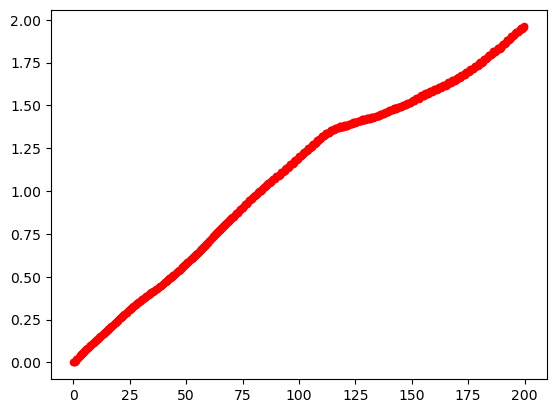

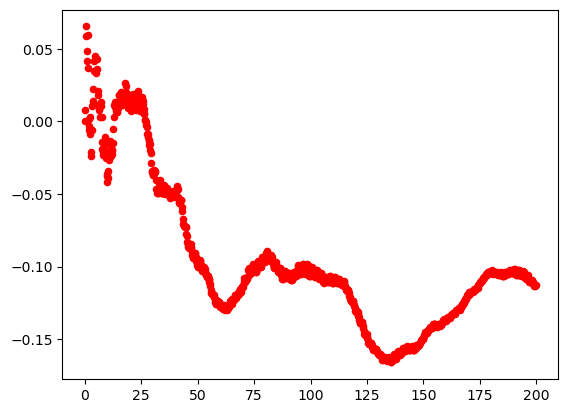

 opened file  ./msd-Original/coor_gfp/coor_2ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


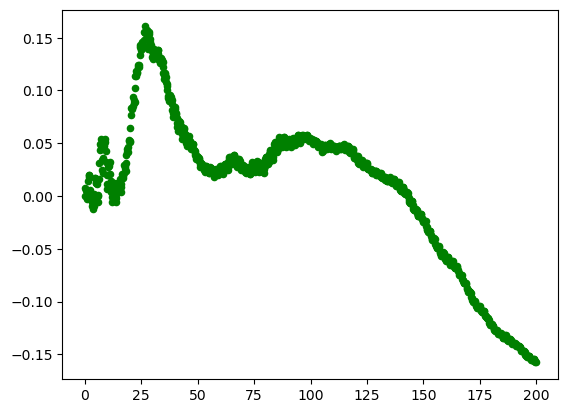

 opened file  ./msd-Original/coor_gfp/coor_3ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


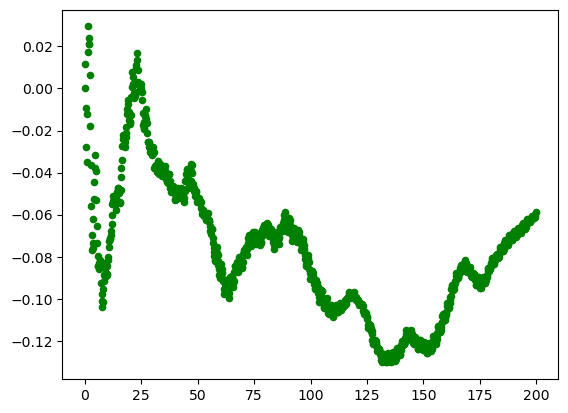

 opened file  ./msd-Original/coor_gfp/coor_4ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


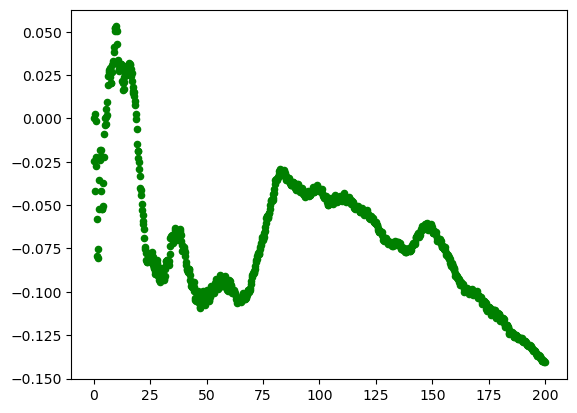

 opened file  ./msd-Original/coor_gfp/coor_5ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


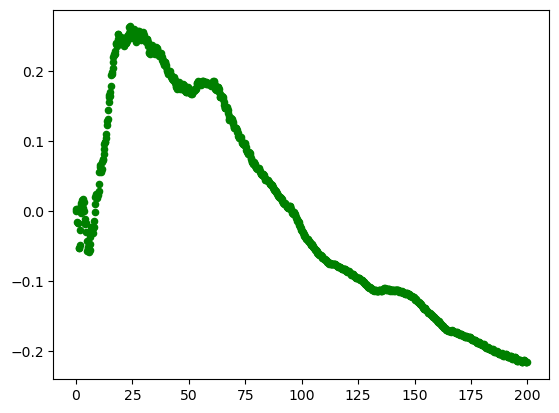

 opened file  ./msd-Original/coor_gfp/coor_6ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


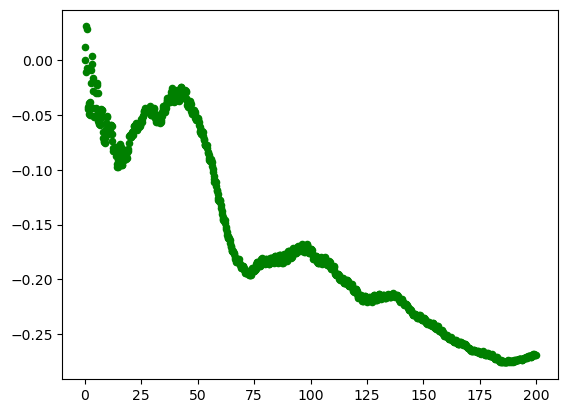

 opened file  ./msd-Original/coor_gfp/coor_7ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


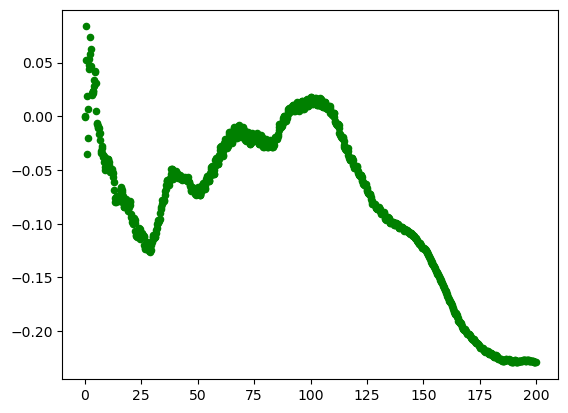

 opened file  ./msd-Original/coor_gfp/coor_8ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


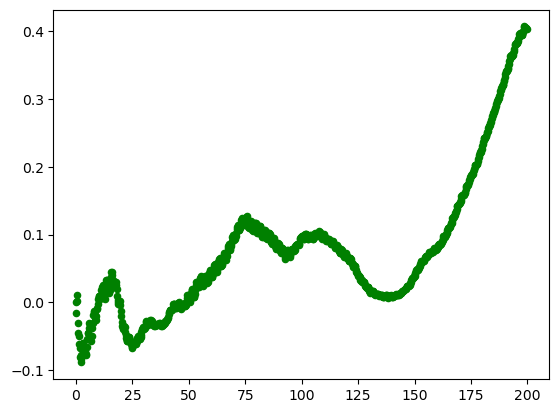

 opened file  ./msd-Original/coor_gfp/coor_9ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


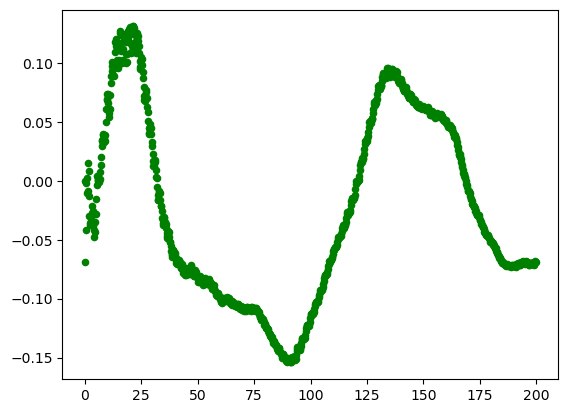

 opened file  ./msd-Original/coor_gfp/coor_10ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


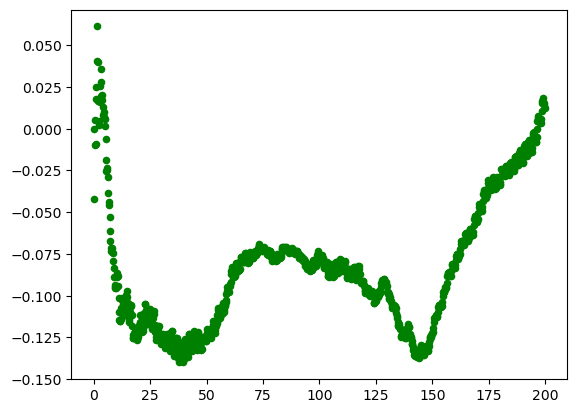

 opened file  ./msd-Original/coor_gfp/coor_11ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


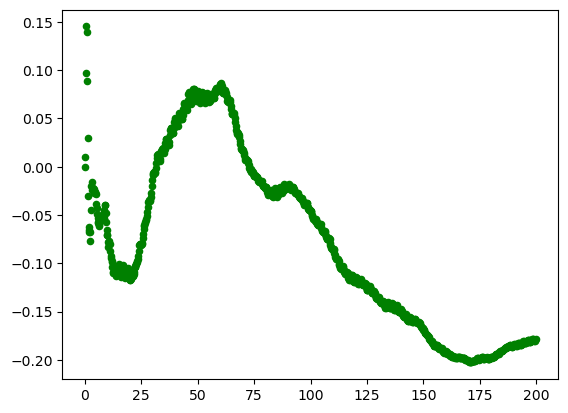

 opened file  ./msd-Original/coor_gfp/coor_12ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


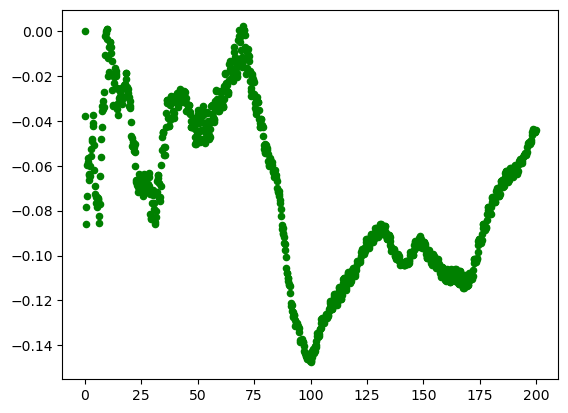

 opened file  ./msd-Original/coor_gfp/coor_13ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


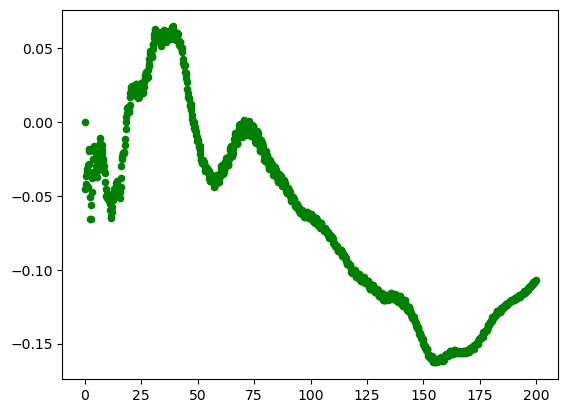

 opened file  ./msd-Original/coor_gfp/coor_14ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


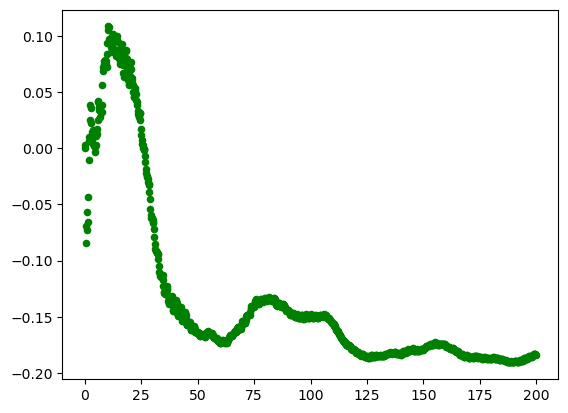

 opened file  ./msd-Original/coor_gfp/coor_15ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


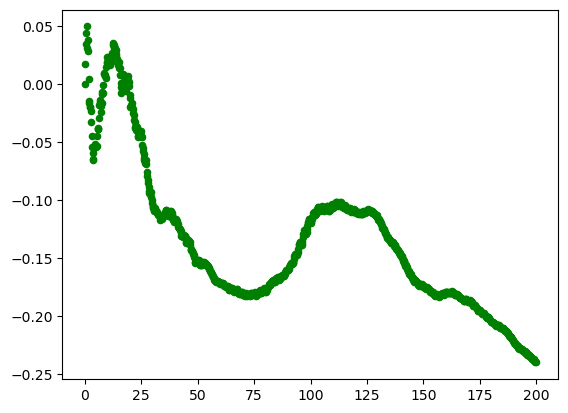

 opened file  ./msd-Original/coor_gfp/coor_16ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


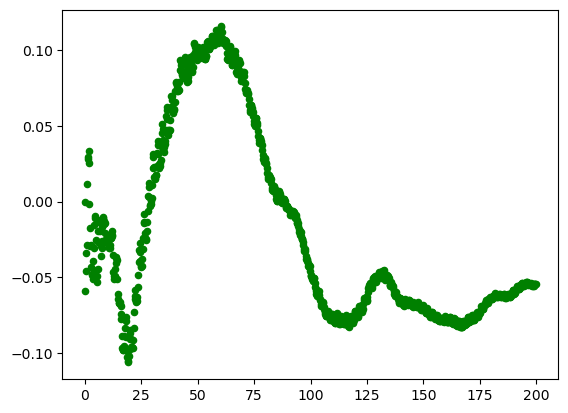

 opened file  ./msd-Original/coor_gfp/coor_17ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


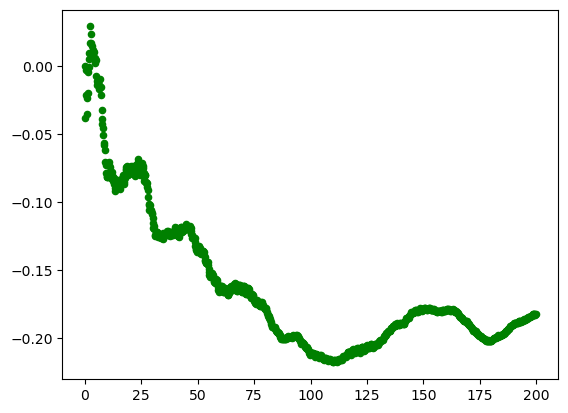

 opened file  ./msd-Original/coor_gfp/coor_18ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


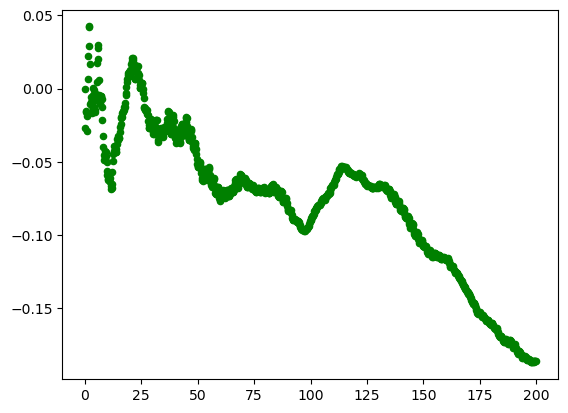

 opened file  ./msd-Original/coor_gfp/coor_19ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


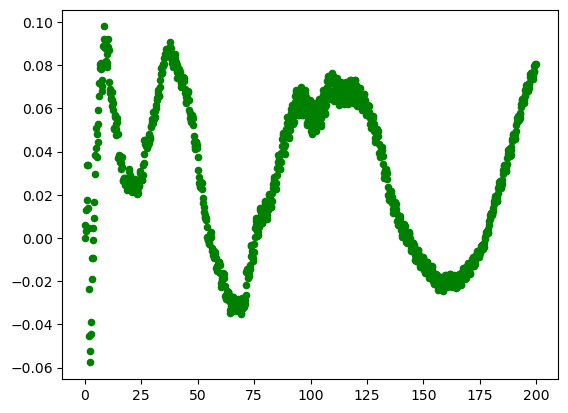

 opened file  ./msd-Original/coor_gfp/coor_20ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


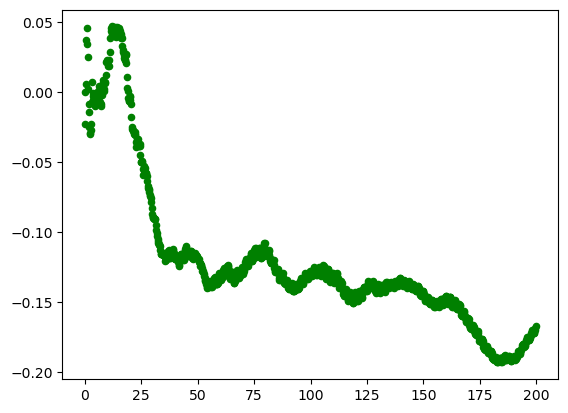

 number of trajectories  20


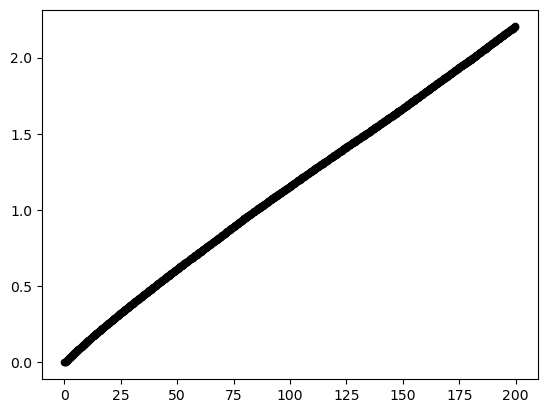

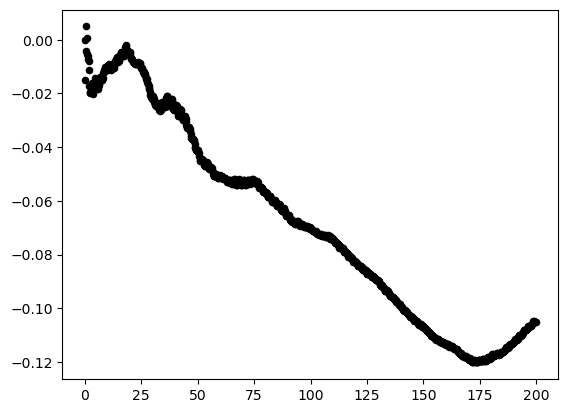

In [229]:
nstart=1
ps=1000
file=readfile(nstart,ps)
print(' opened file ',file)
traj=np.loadtxt(file)
ns=len(traj)

print('number of lines ns = ',ns)
print('    beginning of file ')

print(traj[1])

# parameters for MSD calculations
# length is the number of steps in MSD
# steps is the number of averagings
# skip is the number of steps skipped in averaging

timestep=0.2
length=1000
steps=ns-length
skip=10

print('   length of MSD        ',length)
print('   saving time          ',timestep)
print('   number of averagings ',steps)
print('   skip                 ',skip)

# MSD calculates the array of displacements from the position specified by j

def msd(array,j,length):
    c1=np.zeros((length,3))
    i=0
    while i< length:
            c1[i]=np.array([[i*timestep,np.dot(array[j+i]-array[j],array[j+i]-array[j]),np.dot(array[j+i]-array[j],array[j+i]-array[j])**2]])
            i+=1
    return c1  

# Repeated calculations of the MSD with the step=skip and average over the 
#  steps/skip steps


def average(array,length,steps,skip):
    c2=np.zeros((length,3))
    j=0
    num=0
    while j < steps:
        c2+=msd(array,j,length)
        j+=skip
        num+=1
    print(' number of averagings ',num)
    return c2/num



r2=np.zeros((length,3))
r2=average(traj,length,steps,skip)


plt.scatter(r2[:,0],r2[:,1],s=20,c='r') 
plt.show()

alpha=np.zeros((length,2))
i=1
while i < length:
    alpha[i]=np.array([r2[i,0],3*r2[i,2]/5/r2[i,1]**2-1])
    i+=1

plt.scatter(alpha[:,0],alpha[:,1],s=20,c='r') 
plt.show()


r2av=r2
alphaav=alpha
i=nstart+1
nav=1
while i < 21:
    file=readfile(i,ps)
    print(' opened file ',file)
    traj=np.loadtxt(file)
    ns=len(traj)
    print('number of lines ns = ',ns)
    r2=average(traj,length,steps,skip)
    r2av+=r2
    nav+=1
    alpha=np.zeros((length,2))
    j=1
    while j < length:
        alpha[j]=np.array([r2[j,0],3*r2[j,2]/5/r2[j,1]**2-1])
        j+=1
        
    alphaav+=alpha
    plt.scatter(alpha[:,0],alpha[:,1],s=20,c='green') 
    plt.show()
    i+=1
    
print(' number of trajectories ',nav)    
r2av=r2av/nav
alphaav=alphaav/nav

datafile='r2GFP.dat'
cfile=os.path.join(path, datafile)
np.savetxt(cfile,r2av) 

datafile='alphaGFP.dat'
cfile=os.path.join(path, datafile)
np.savetxt(cfile,alphaav) 

outfile='r2GFP.pdf'
plotfile=os.path.join(path, outfile) 
plt.scatter(r2av[:,0],r2av[:,1],s=20,c='black') 
plt.savefig(plotfile,dpi=150,format='pdf') 
plt.show()

outfile='alphaGFP.pdf'
plotfile=os.path.join(path, outfile) 
plt.scatter(alphaav[:,0],alphaav[:,1],s=20,c='black') 
plt.savefig(plotfile,dpi=150,format='pdf') 
plt.show()

In [254]:
r2

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.00000000e-01, 8.93538210e-04, 1.26596650e-06],
       [4.00000000e-01, 2.96787164e-03, 1.48733097e-05],
       ...,
       [1.99400000e+02, 4.57938679e+00, 2.59796211e+01],
       [1.99600000e+02, 4.58331505e+00, 2.60379222e+01],
       [1.99800000e+02, 4.58199649e+00, 2.60489576e+01]])

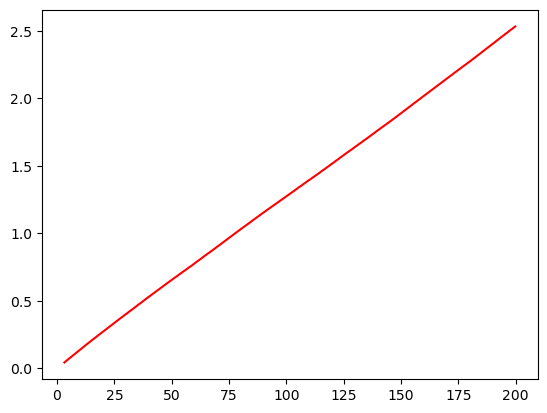

In [255]:
plt.plot(r2av[16:,0],r2av[16:,1],'r')

outfile='r2GFP.pdf'
plotfile=os.path.join(path, outfile) 
plt.scatter(r2av[:,0],r2av[:,1],s=20,c='blue') 
plt.savefig(plotfile,dpi=150,format='pdf')
plt.show()

D:: 0.0017761394680220572


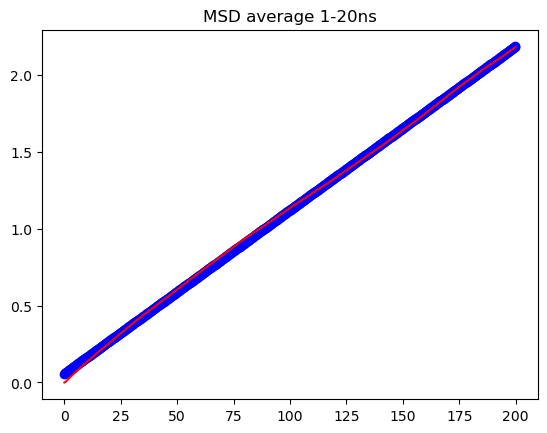

In [54]:
#############################################################
from scipy.stats import linregress
linear_model = linregress(r2av[:,0],r2av[:,1])
slope = linear_model.slope
error = linear_model.stderr
# dim_fac is 3 as we computed a 3D msd with 'xyz'
D = slope * 1/(2*3)
print("D::",D)
plt.title('MSD average 1-20ns')
plt.plot(r2av[:,0],linF(linear_model.intercept,slope,r2av[:,0]),'ob')
plt.plot(r2av[:,0],r2av[:,1],'r')
plt.show()
################################################
#ns= np.arange(1,10000,4)/1000

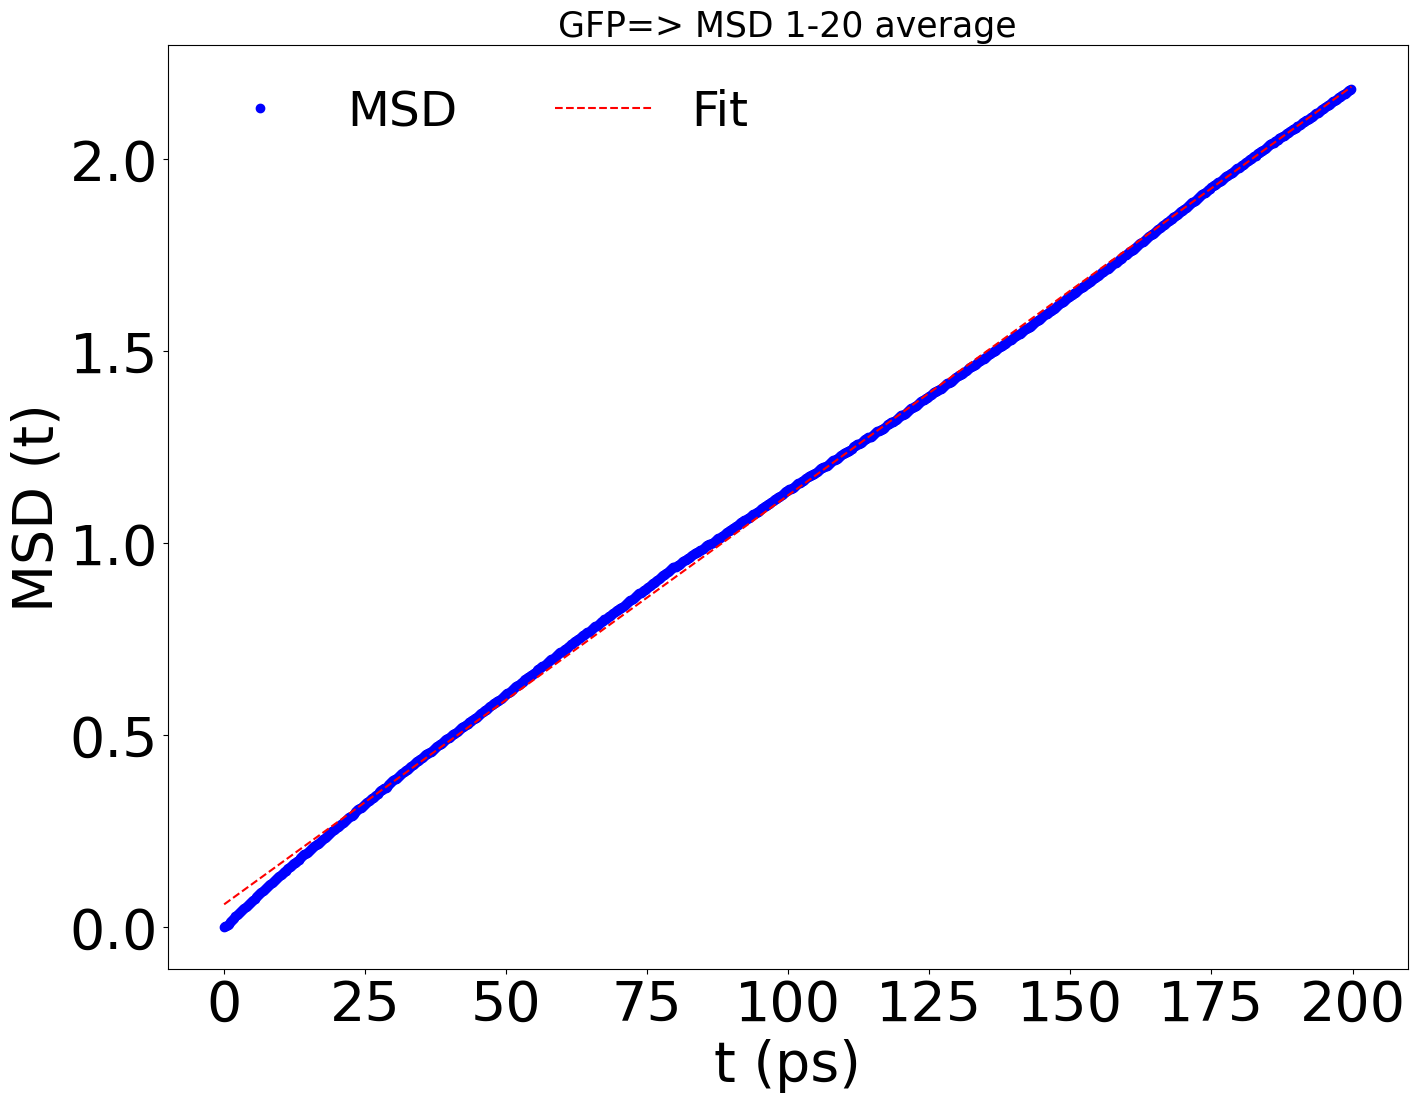

In [57]:
plt.figure(figsize=(16,12))
plt.plot(r2av[:,0],r2av[:,1],'ob',label='MSD')
plt.plot(r2av[:,0],linF(linear_model.intercept,slope,r2av[:,0]),'--r',label='Fit')
#########################################################################
plt.xlabel("t (ps)",fontsize=40)
plt.ylabel(r"MSD (t)",fontsize=40)
plt.title("GFP=> MSD 1-20 average",fontsize=25)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
#plt.title('MSD 1-20 average',fontsize=30)
plt.legend(loc=0,fontsize=35,ncol=2, frameon=False)
plt.savefig("/Users/smostaj1/Documents/GFP/Latex-file/plot/MSD_GFP1-20.pdf", dpi=1000 )
plt.savefig("/Users/smostaj1/Documents/GFP/Latex-file/plot/MSD_GFP1-20.eps", dpi=1000 ,format='eps') 

 opened file  ./msd-Original/coor_gfp/coor_1ns_1000ps.dat
number of lines ns =  5000
    beginning of file 
[-8.293625  6.398821 -3.04575 ]
   length of MSD         1000
   saving time           0.2
   number of averagings  4000
   skip                  10
 number of averagings  400


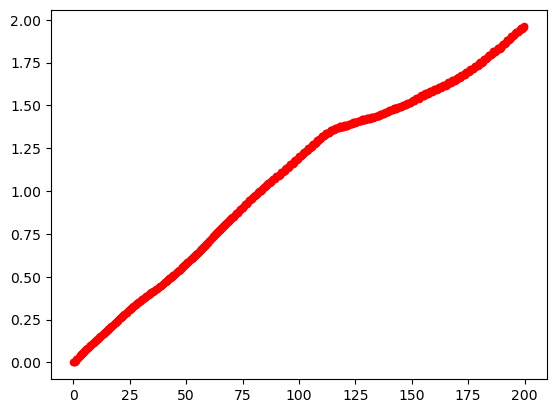

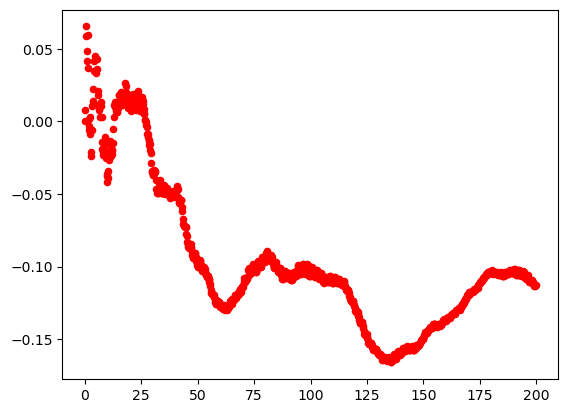

 opened file  ./msd-Original/coor_gfp/coor_2ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


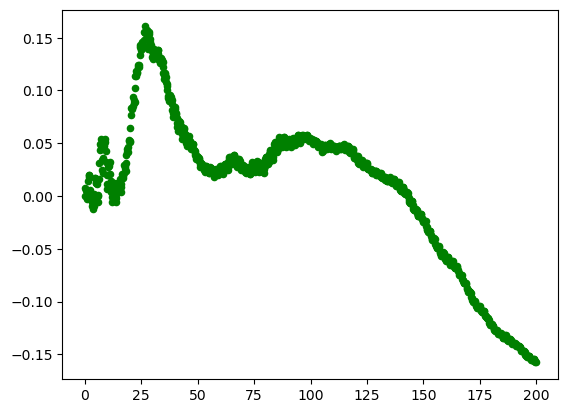

 opened file  ./msd-Original/coor_gfp/coor_3ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


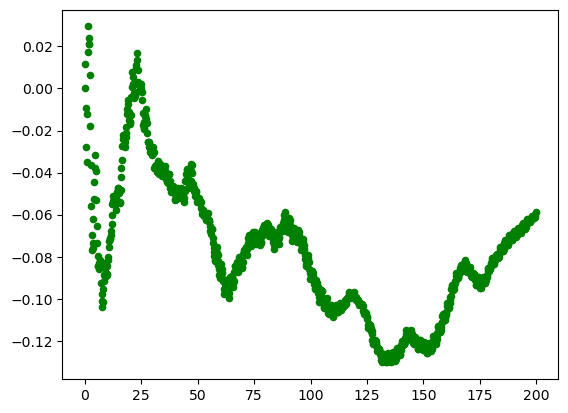

 opened file  ./msd-Original/coor_gfp/coor_4ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


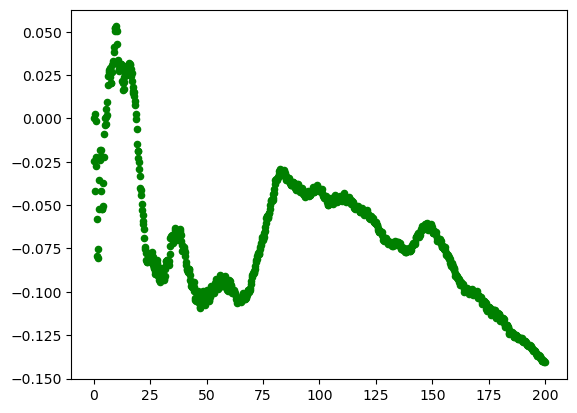

 number of trajectories  4


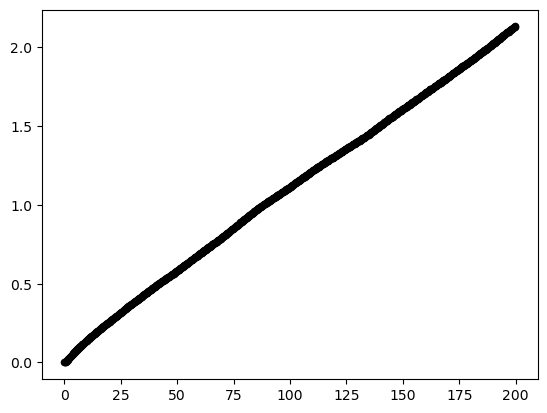

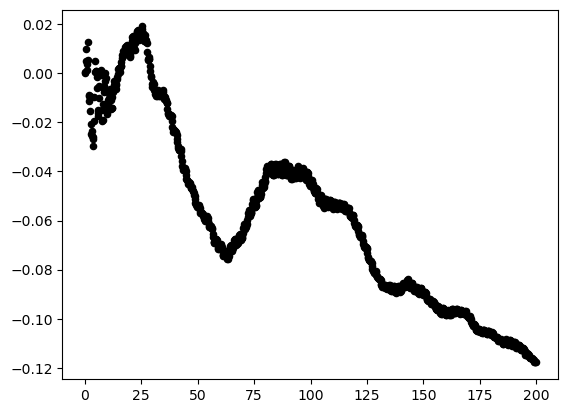

In [36]:
nstart=1
nend=5
ps=1000
file=readfile(nstart,ps)
print(' opened file ',file)
traj=np.loadtxt(file)
ns=len(traj)

print('number of lines ns = ',ns)
print('    beginning of file ')

print(traj[1])

# parameters for MSD calculations
# length is the number of steps in MSD
# steps is the number of averagings
# skip is the number of steps skipped in averaging

timestep=0.2
length=1000
steps=ns-length
skip=10

print('   length of MSD        ',length)
print('   saving time          ',timestep)
print('   number of averagings ',steps)
print('   skip                 ',skip)

# MSD calculates the array of displacements from the position specified by j

def msd(array,j,length):
    c1=np.zeros((length,3))
    i=0
    while i< length:
            c1[i]=np.array([[i*timestep,np.dot(array[j+i]-array[j],array[j+i]-array[j]),np.dot(array[j+i]-array[j],array[j+i]-array[j])**2]])
            i+=1
    return c1  

# Repeated calculations of the MSD with the step=skip and average over the 
#  steps/skip steps


def average(array,length,steps,skip):
    c2=np.zeros((length,3))
    j=0
    num=0
    while j < steps:
        c2+=msd(array,j,length)
        j+=skip
        num+=1
    print(' number of averagings ',num)
    return c2/num



r2=np.zeros((length,3))
r2=average(traj,length,steps,skip)


plt.scatter(r2[:,0],r2[:,1],s=20,c='r') 
plt.show()

alpha=np.zeros((length,2))
i=1
while i < length:
    alpha[i]=np.array([r2[i,0],3*r2[i,2]/5/r2[i,1]**2-1])
    i+=1

plt.scatter(alpha[:,0],alpha[:,1],s=20,c='r') 
plt.show()


r2av=r2
alphaav=alpha
i=nstart+1
nav=1
while i < nend:
    file=readfile(i,ps)
    print(' opened file ',file)
    traj=np.loadtxt(file)
    ns=len(traj)
    print('number of lines ns = ',ns)
    r2=average(traj,length,steps,skip)
    r2av+=r2
    nav+=1
    alpha=np.zeros((length,2))
    j=1
    while j < length:
        alpha[j]=np.array([r2[j,0],3*r2[j,2]/5/r2[j,1]**2-1])
        j+=1
        
    alphaav+=alpha
    plt.scatter(alpha[:,0],alpha[:,1],s=20,c='green') 
    plt.show()
    i+=1
    
print(' number of trajectories ',nav)    
r2av=r2av/nav
alphaav=alphaav/nav

datafile='r2GFP.dat'
cfile=os.path.join(path, datafile)
np.savetxt(cfile,r2av) 

datafile='alphaGFP.dat'
cfile=os.path.join(path, datafile)
np.savetxt(cfile,alphaav) 

outfile='r2GFP.pdf'
plotfile=os.path.join(path, outfile) 
plt.scatter(r2av[:,0],r2av[:,1],s=20,c='black') 
plt.savefig(plotfile,dpi=150,format='pdf') 
plt.show()

outfile='alphaGFP.pdf'
plotfile=os.path.join(path, outfile) 
plt.scatter(alphaav[:,0],alphaav[:,1],s=20,c='black') 
plt.savefig(plotfile,dpi=150,format='pdf') 
plt.show()


############################################
#############################################################
from scipy.stats import linregress
linear_model = linregress(r2av[:,0],r2av[:,1])
slope = linear_model.slope
error = linear_model.stderr
# dim_fac is 3 as we computed a 3D msd with 'xyz'
D = slope * 1/(2*3)
print("D::",D)
#plt.title('MSD average 1-20ns')
plt.plot(r2av[:,0],linF(linear_model.intercept,slope,r2av[:,0]),'ob')
plt.plot(r2av[:,0],r2av[:,1],'r')
plt.show()
################################################
plt.figure(figsize=(16,12))
plt.plot(r2av[:,0],r2av[:,1],'ob',label='MSD')
plt.plot(r2av[:,0],linF(linear_model.intercept,slope,r2av[:,0]),'--r',label='Fit')
#########################################################################
plt.xlabel("t (ps)",fontsize=40)
plt.ylabel(r"MSD (t)",fontsize=40)
plt.title("GFP=> MSD 1-4 average",fontsize=25)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
#plt.title('MSD 1-20 average',fontsize=30)
plt.legend(loc=0,fontsize=35,ncol=2, frameon=False)
plt.savefig("./MSD_GFP1-4.pdf", dpi=1000 )

D:: 0.0017283464972702052


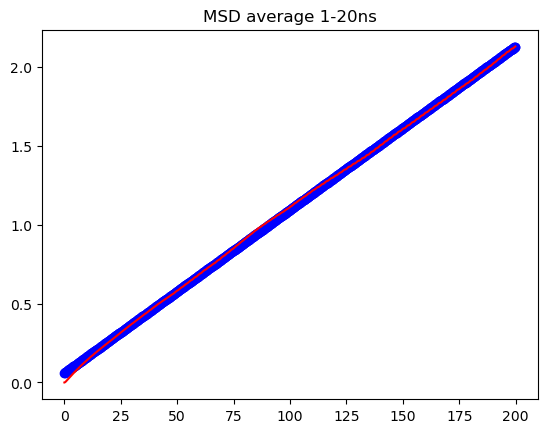

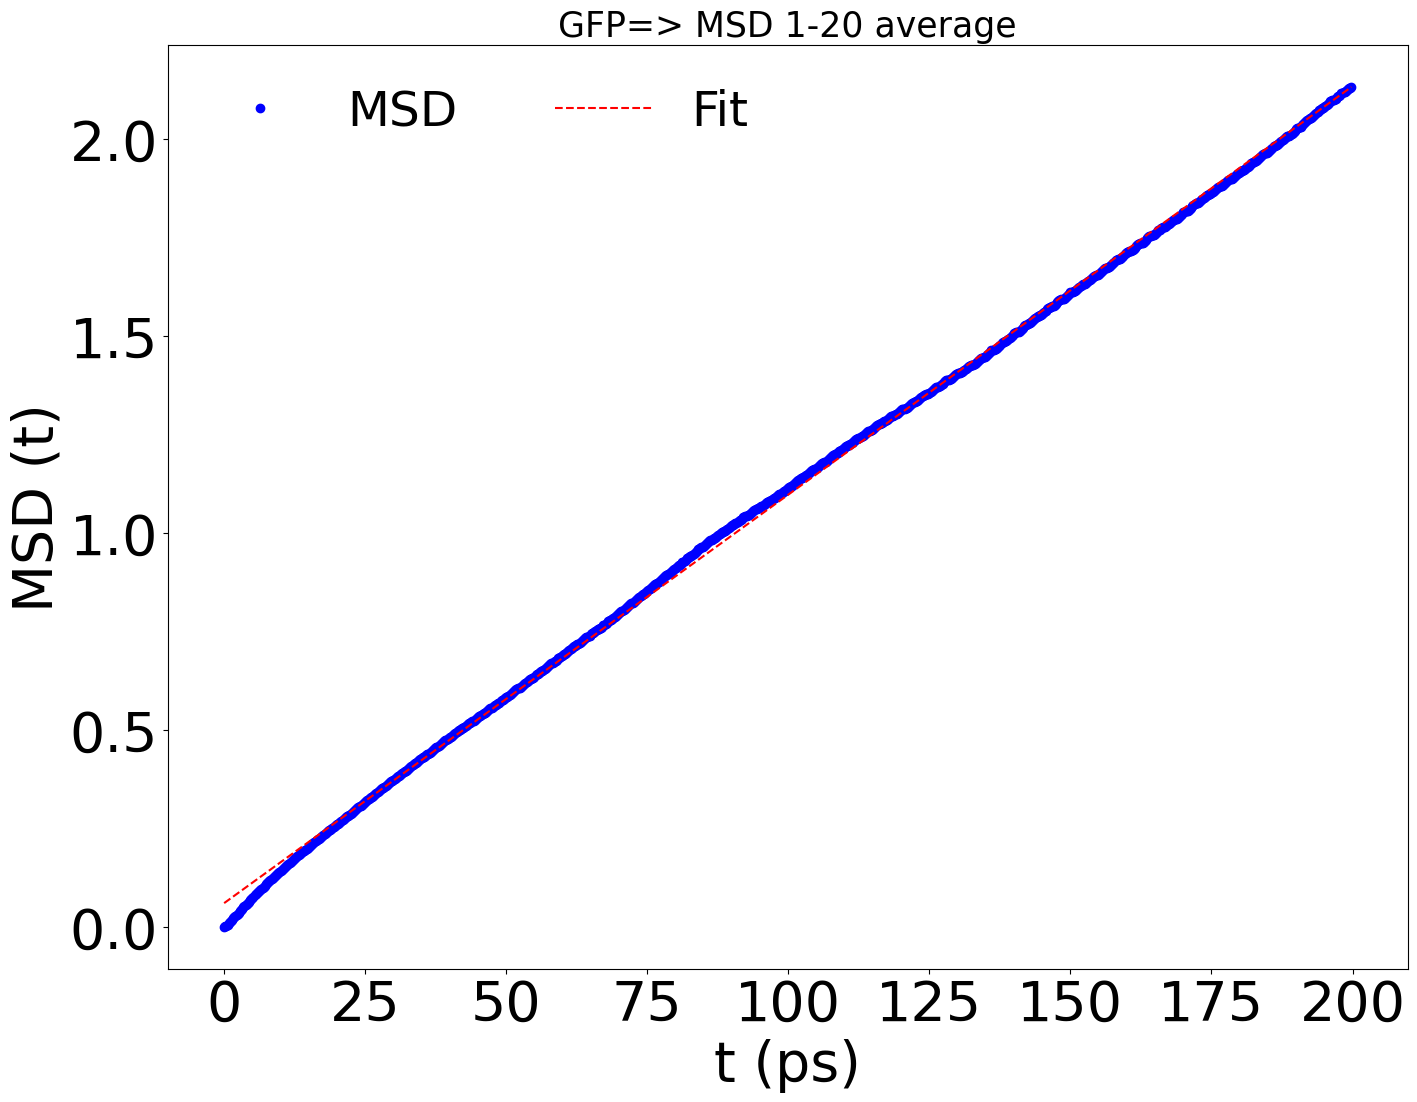

 opened file  ./msd-Original/coor_gfp/coor_5ns_1000ps.dat
number of lines ns =  5000
    beginning of file 
[-10.582356  11.354155   0.931683]
   length of MSD         1000
   saving time           0.2
   number of averagings  4000
   skip                  10
 number of averagings  400


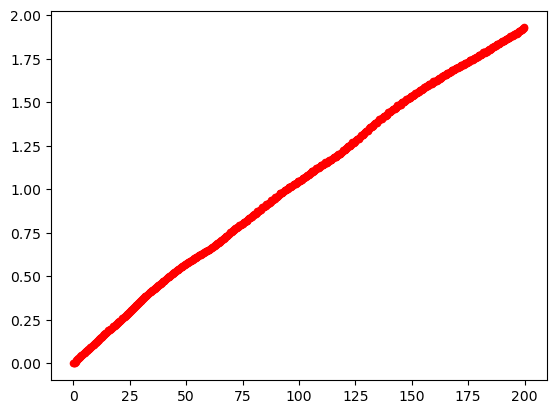

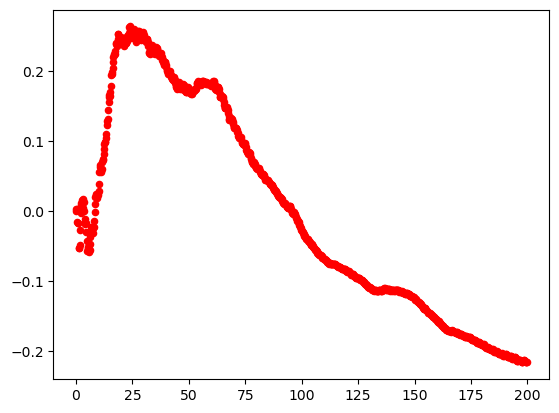

 opened file  ./msd-Original/coor_gfp/coor_6ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


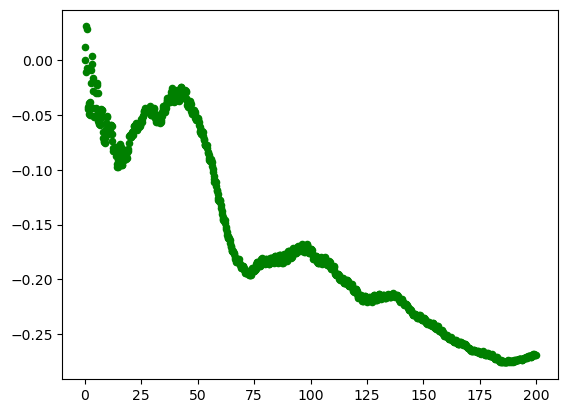

 opened file  ./msd-Original/coor_gfp/coor_7ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


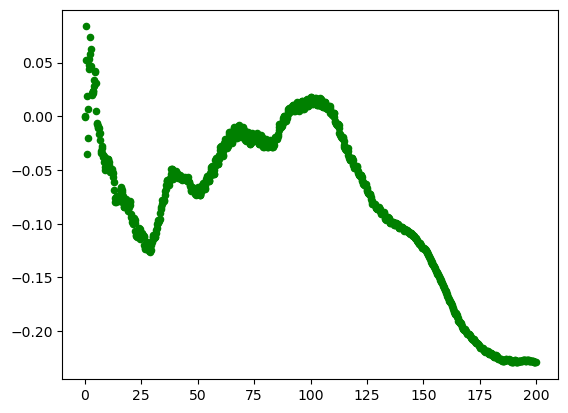

 opened file  ./msd-Original/coor_gfp/coor_8ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


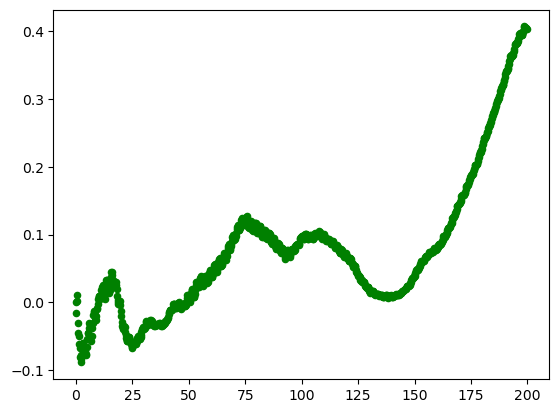

 number of trajectories  4


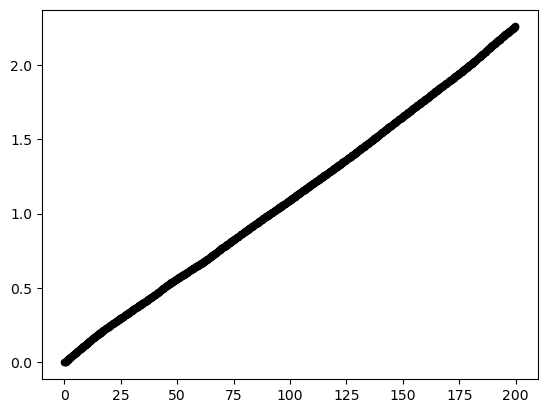

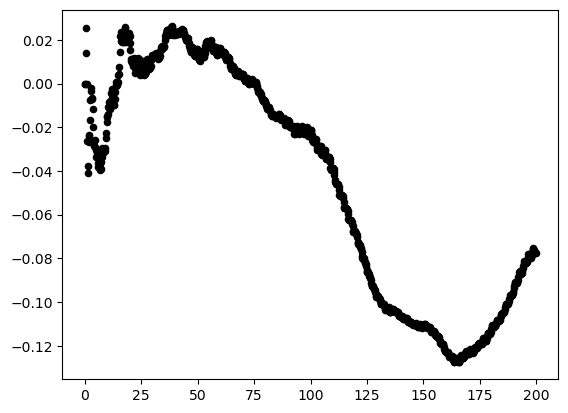

D:: 0.0018399354798016682


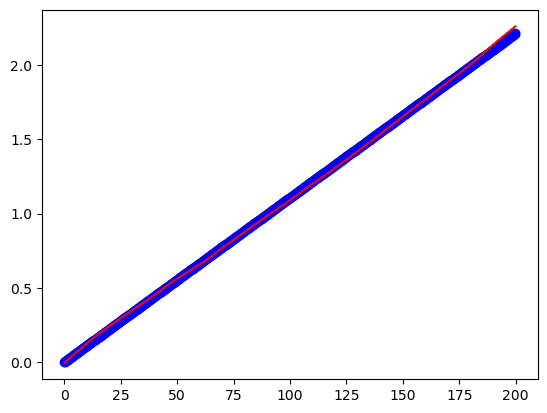

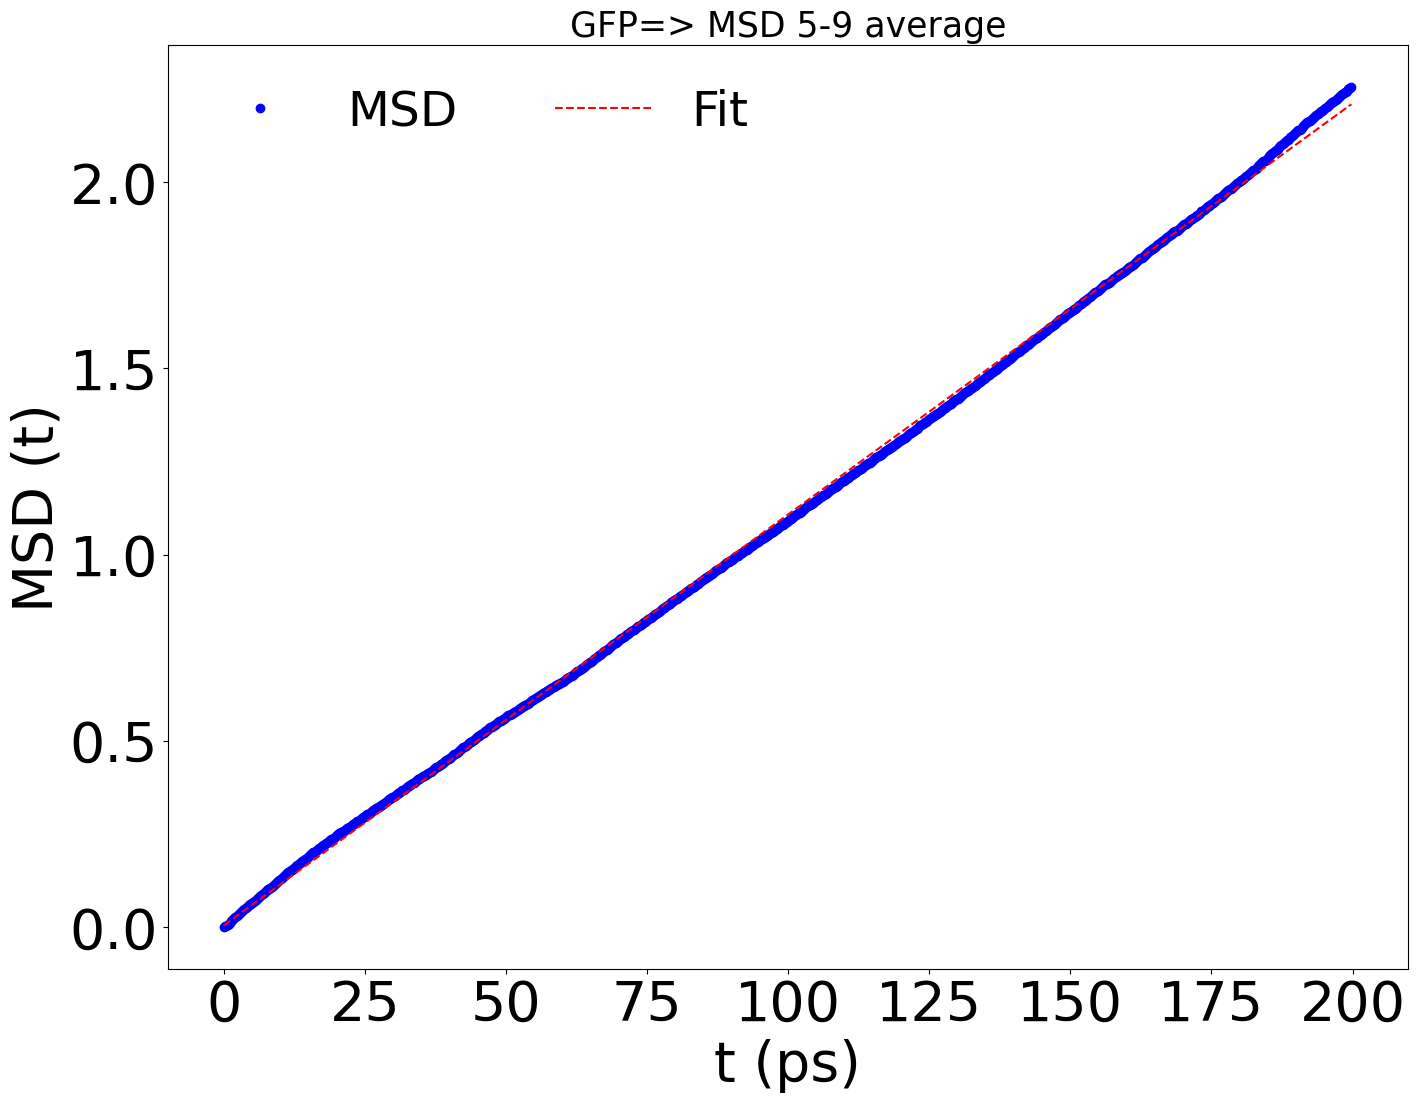

In [38]:
nstart=5
nend=9
ps=1000
file=readfile(nstart,ps)
print(' opened file ',file)
traj=np.loadtxt(file)
ns=len(traj)

print('number of lines ns = ',ns)
print('    beginning of file ')

print(traj[1])

# parameters for MSD calculations
# length is the number of steps in MSD
# steps is the number of averagings
# skip is the number of steps skipped in averaging

timestep=0.2
length=1000
steps=ns-length
skip=10

print('   length of MSD        ',length)
print('   saving time          ',timestep)
print('   number of averagings ',steps)
print('   skip                 ',skip)

# MSD calculates the array of displacements from the position specified by j

def msd(array,j,length):
    c1=np.zeros((length,3))
    i=0
    while i< length:
            c1[i]=np.array([[i*timestep,np.dot(array[j+i]-array[j],array[j+i]-array[j]),np.dot(array[j+i]-array[j],array[j+i]-array[j])**2]])
            i+=1
    return c1  

# Repeated calculations of the MSD with the step=skip and average over the 
#  steps/skip steps


def average(array,length,steps,skip):
    c2=np.zeros((length,3))
    j=0
    num=0
    while j < steps:
        c2+=msd(array,j,length)
        j+=skip
        num+=1
    print(' number of averagings ',num)
    return c2/num



r2=np.zeros((length,3))
r2=average(traj,length,steps,skip)


plt.scatter(r2[:,0],r2[:,1],s=20,c='r') 
plt.show()

alpha=np.zeros((length,2))
i=1
while i < length:
    alpha[i]=np.array([r2[i,0],3*r2[i,2]/5/r2[i,1]**2-1])
    i+=1

plt.scatter(alpha[:,0],alpha[:,1],s=20,c='r') 
plt.show()


r2av=r2
alphaav=alpha
i=nstart+1
nav=1
while i < nend:
    file=readfile(i,ps)
    print(' opened file ',file)
    traj=np.loadtxt(file)
    ns=len(traj)
    print('number of lines ns = ',ns)
    r2=average(traj,length,steps,skip)
    r2av+=r2
    nav+=1
    alpha=np.zeros((length,2))
    j=1
    while j < length:
        alpha[j]=np.array([r2[j,0],3*r2[j,2]/5/r2[j,1]**2-1])
        j+=1
        
    alphaav+=alpha
    plt.scatter(alpha[:,0],alpha[:,1],s=20,c='green') 
    plt.show()
    i+=1
    
print(' number of trajectories ',nav)    
r2av=r2av/nav
alphaav=alphaav/nav

datafile='r2GFP.dat'
cfile=os.path.join(path, datafile)
np.savetxt(cfile,r2av) 

datafile='alphaGFP.dat'
cfile=os.path.join(path, datafile)
np.savetxt(cfile,alphaav) 

outfile='r2GFP.pdf'
plotfile=os.path.join(path, outfile) 
plt.scatter(r2av[:,0],r2av[:,1],s=20,c='black') 
plt.savefig(plotfile,dpi=150,format='pdf') 
plt.show()

outfile='alphaGFP.pdf'
plotfile=os.path.join(path, outfile) 
plt.scatter(alphaav[:,0],alphaav[:,1],s=20,c='black') 
plt.savefig(plotfile,dpi=150,format='pdf') 
plt.show()


############################################
#############################################################
from scipy.stats import linregress
linear_model = linregress(r2av[:,0],r2av[:,1])
slope = linear_model.slope
error = linear_model.stderr
# dim_fac is 3 as we computed a 3D msd with 'xyz'
D = slope * 1/(2*3)
print("D::",D)
#plt.title('MSD average 1-20ns')
plt.plot(r2av[:,0],linF(linear_model.intercept,slope,r2av[:,0]),'ob')
plt.plot(r2av[:,0],r2av[:,1],'r')
plt.show()
################################################
plt.figure(figsize=(16,12))
plt.plot(r2av[:,0],r2av[:,1],'ob',label='MSD')
plt.plot(r2av[:,0],linF(linear_model.intercept,slope,r2av[:,0]),'--r',label='Fit')
#########################################################################
plt.xlabel("t (ps)",fontsize=40)
plt.ylabel(r"MSD (t)",fontsize=40)
plt.title("GFP=> MSD 5-9 average",fontsize=25)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
#plt.title('MSD 1-20 average',fontsize=30)
plt.legend(loc=0,fontsize=35,ncol=2, frameon=False)
plt.savefig("./MSD_GFP5-9.pdf", dpi=1000 )

 opened file  ./msd-Original/coor_gfp/coor_9ns_1000ps.dat
number of lines ns =  5000
    beginning of file 
[-11.009821  13.575967   4.633674]
   length of MSD         1000
   saving time           0.2
   number of averagings  4000
   skip                  10
 number of averagings  400


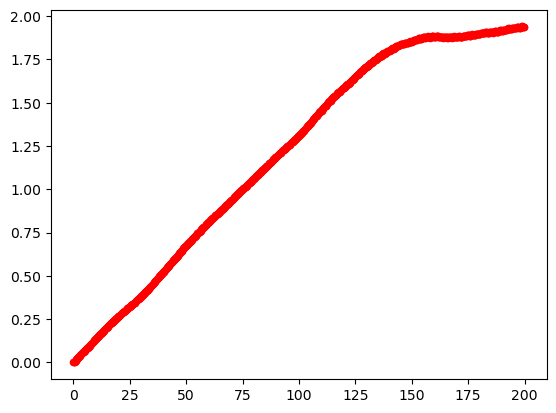

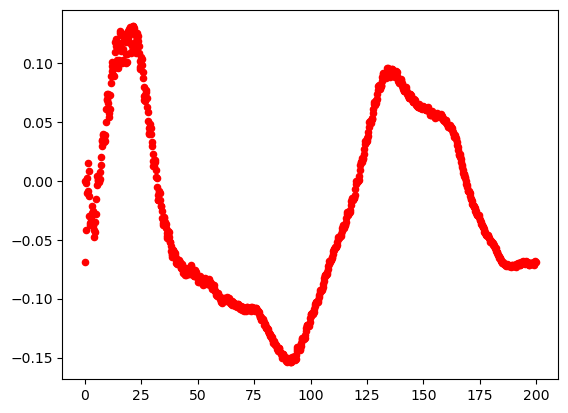

 opened file  ./msd-Original/coor_gfp/coor_10ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


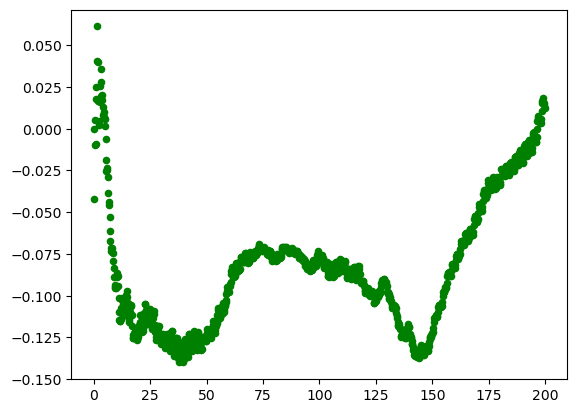

 opened file  ./msd-Original/coor_gfp/coor_11ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


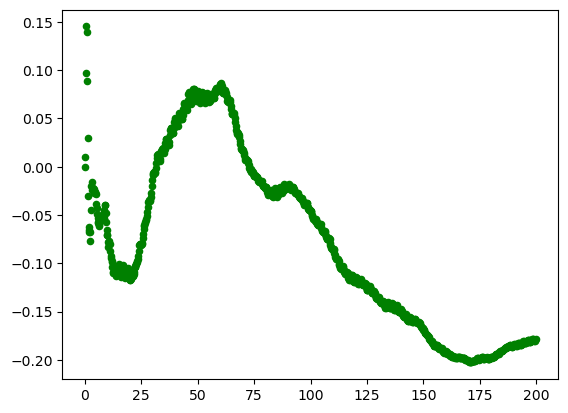

 opened file  ./msd-Original/coor_gfp/coor_12ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


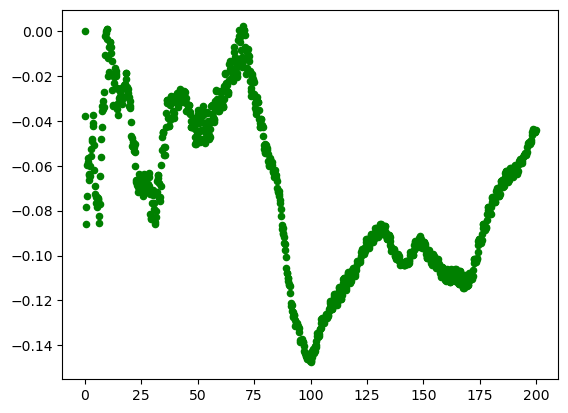

 number of trajectories  4


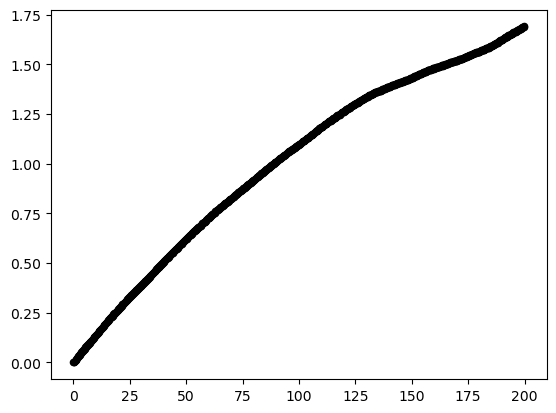

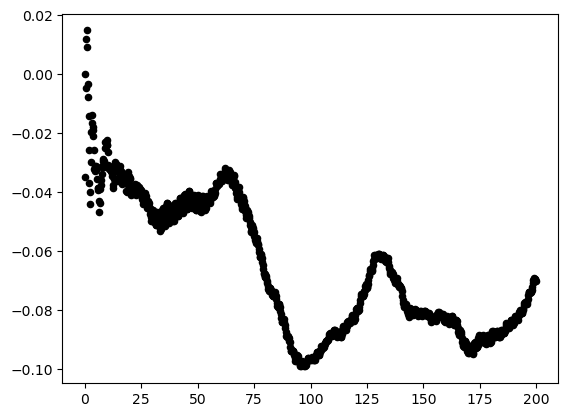

D:: 0.0013705631446690734


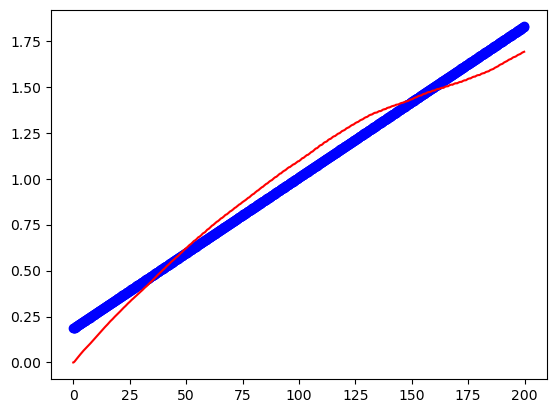

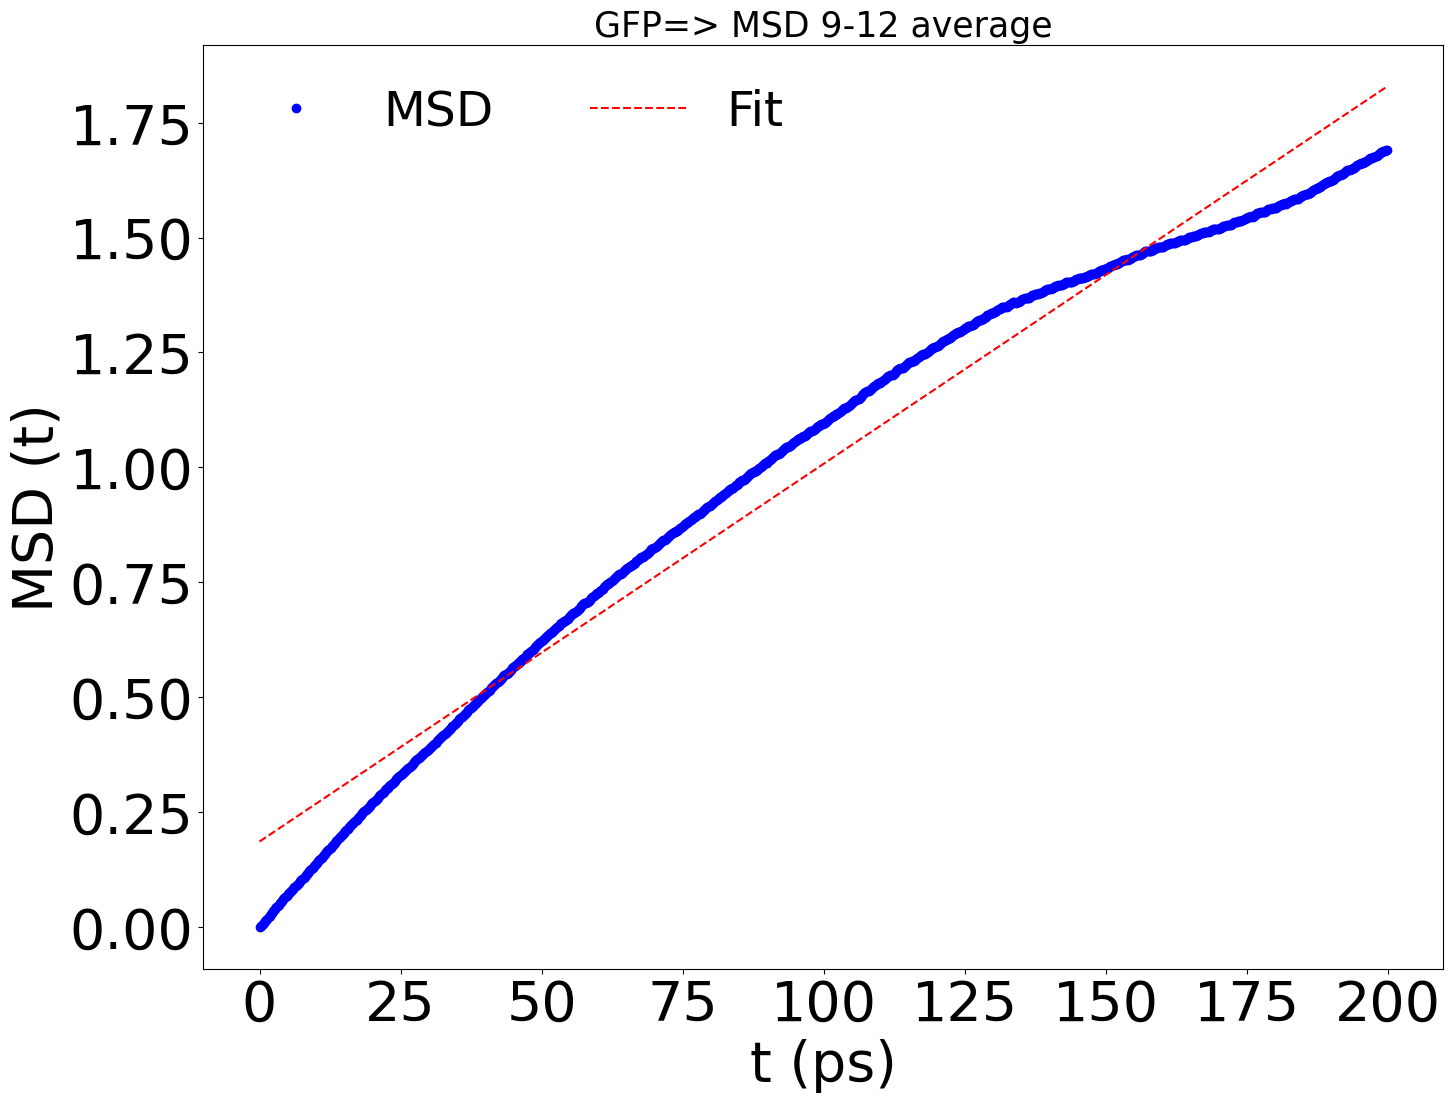

In [39]:
nstart=9
nend=13
ps=1000
file=readfile(nstart,ps)
print(' opened file ',file)
traj=np.loadtxt(file)
ns=len(traj)

print('number of lines ns = ',ns)
print('    beginning of file ')

print(traj[1])

# parameters for MSD calculations
# length is the number of steps in MSD
# steps is the number of averagings
# skip is the number of steps skipped in averaging

timestep=0.2
length=1000
steps=ns-length
skip=10

print('   length of MSD        ',length)
print('   saving time          ',timestep)
print('   number of averagings ',steps)
print('   skip                 ',skip)

# MSD calculates the array of displacements from the position specified by j

def msd(array,j,length):
    c1=np.zeros((length,3))
    i=0
    while i< length:
            c1[i]=np.array([[i*timestep,np.dot(array[j+i]-array[j],array[j+i]-array[j]),np.dot(array[j+i]-array[j],array[j+i]-array[j])**2]])
            i+=1
    return c1  

# Repeated calculations of the MSD with the step=skip and average over the 
#  steps/skip steps


def average(array,length,steps,skip):
    c2=np.zeros((length,3))
    j=0
    num=0
    while j < steps:
        c2+=msd(array,j,length)
        j+=skip
        num+=1
    print(' number of averagings ',num)
    return c2/num



r2=np.zeros((length,3))
r2=average(traj,length,steps,skip)


plt.scatter(r2[:,0],r2[:,1],s=20,c='r') 
plt.show()

alpha=np.zeros((length,2))
i=1
while i < length:
    alpha[i]=np.array([r2[i,0],3*r2[i,2]/5/r2[i,1]**2-1])
    i+=1

plt.scatter(alpha[:,0],alpha[:,1],s=20,c='r') 
plt.show()


r2av=r2
alphaav=alpha
i=nstart+1
nav=1
while i < nend:
    file=readfile(i,ps)
    print(' opened file ',file)
    traj=np.loadtxt(file)
    ns=len(traj)
    print('number of lines ns = ',ns)
    r2=average(traj,length,steps,skip)
    r2av+=r2
    nav+=1
    alpha=np.zeros((length,2))
    j=1
    while j < length:
        alpha[j]=np.array([r2[j,0],3*r2[j,2]/5/r2[j,1]**2-1])
        j+=1
        
    alphaav+=alpha
    plt.scatter(alpha[:,0],alpha[:,1],s=20,c='green') 
    plt.show()
    i+=1
    
print(' number of trajectories ',nav)    
r2av=r2av/nav
alphaav=alphaav/nav

datafile='r2GFP.dat'
cfile=os.path.join(path, datafile)
np.savetxt(cfile,r2av) 

datafile='alphaGFP.dat'
cfile=os.path.join(path, datafile)
np.savetxt(cfile,alphaav) 

outfile='r2GFP.pdf'
plotfile=os.path.join(path, outfile) 
plt.scatter(r2av[:,0],r2av[:,1],s=20,c='black') 
plt.savefig(plotfile,dpi=150,format='pdf') 
plt.show()

outfile='alphaGFP.pdf'
plotfile=os.path.join(path, outfile) 
plt.scatter(alphaav[:,0],alphaav[:,1],s=20,c='black') 
plt.savefig(plotfile,dpi=150,format='pdf') 
plt.show()


############################################
#############################################################
from scipy.stats import linregress
linear_model = linregress(r2av[:,0],r2av[:,1])
slope = linear_model.slope
error = linear_model.stderr
# dim_fac is 3 as we computed a 3D msd with 'xyz'
D = slope * 1/(2*3)
print("D::",D)
#plt.title('MSD average 1-20ns')
plt.plot(r2av[:,0],linF(linear_model.intercept,slope,r2av[:,0]),'ob')
plt.plot(r2av[:,0],r2av[:,1],'r')
plt.show()
################################################
plt.figure(figsize=(16,12))
plt.plot(r2av[:,0],r2av[:,1],'ob',label='MSD')
plt.plot(r2av[:,0],linF(linear_model.intercept,slope,r2av[:,0]),'--r',label='Fit')
#########################################################################
plt.xlabel("t (ps)",fontsize=40)
plt.ylabel(r"MSD (t)",fontsize=40)
plt.title("GFP=> MSD 9-12 average",fontsize=25)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
#plt.title('MSD 1-20 average',fontsize=30)
plt.legend(loc=0,fontsize=35,ncol=2, frameon=False)
plt.savefig("./MSD_GFP9-12.pdf", dpi=1000 )

 opened file  ./msd-Original/coor_gfp/coor_13ns_1000ps.dat
number of lines ns =  5000
    beginning of file 
[-11.438971  13.089811   1.141765]
   length of MSD         1000
   saving time           0.2
   number of averagings  4000
   skip                  10
 number of averagings  400


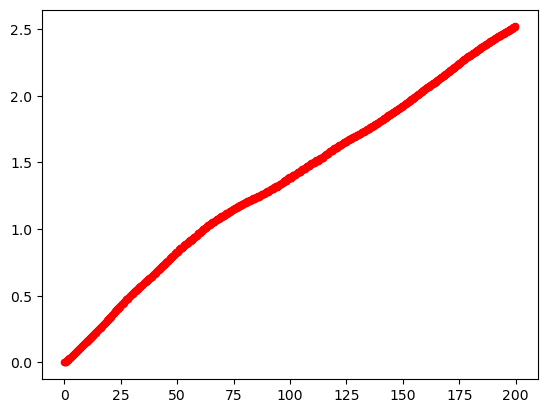

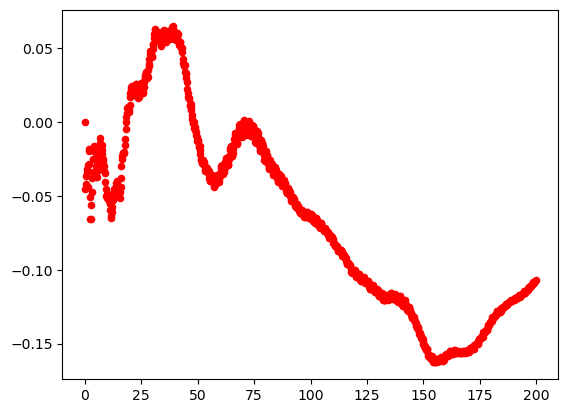

 opened file  ./msd-Original/coor_gfp/coor_14ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


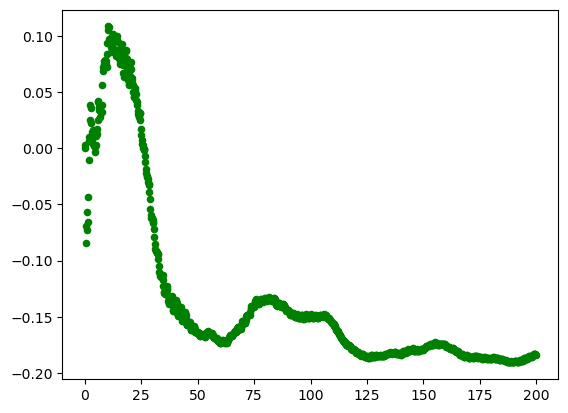

 opened file  ./msd-Original/coor_gfp/coor_15ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


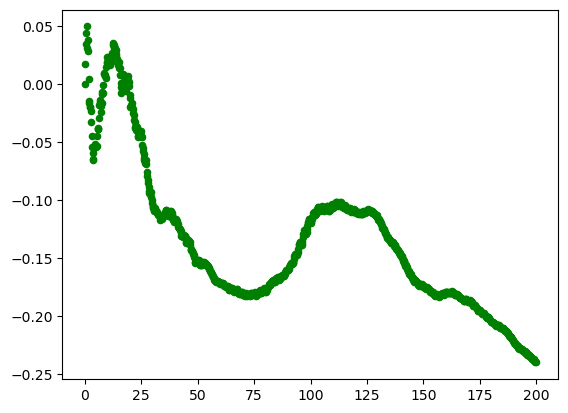

 opened file  ./msd-Original/coor_gfp/coor_16ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


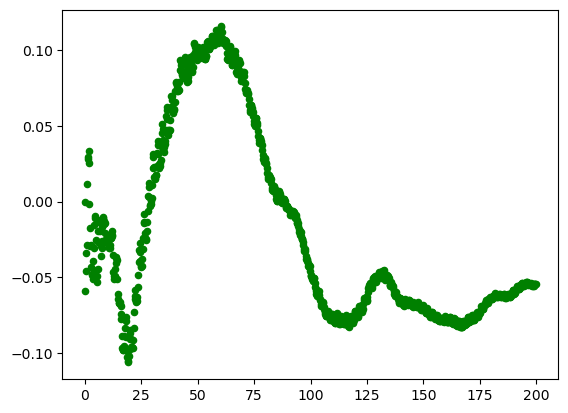

 number of trajectories  4


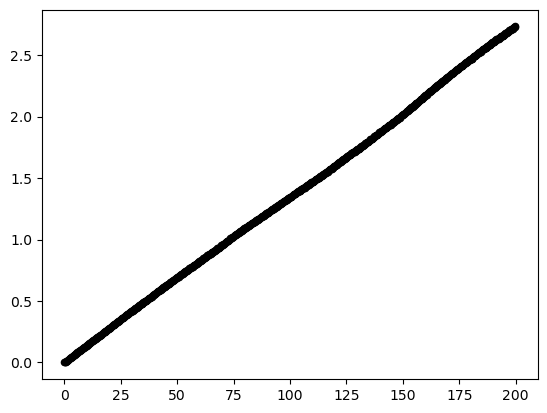

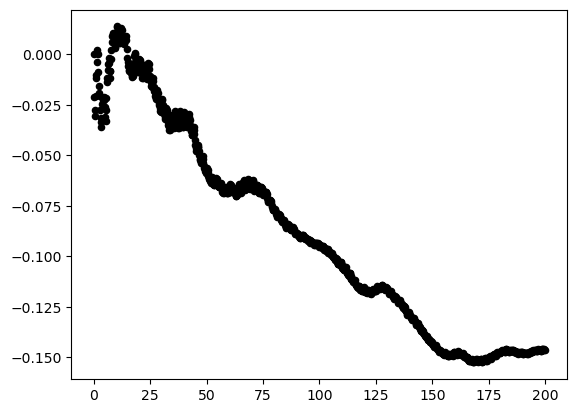

D:: 0.002259365608335373


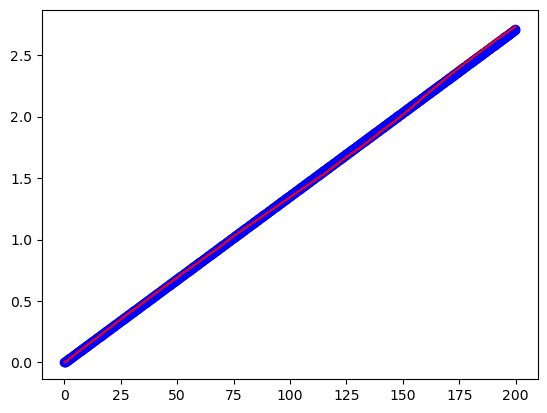

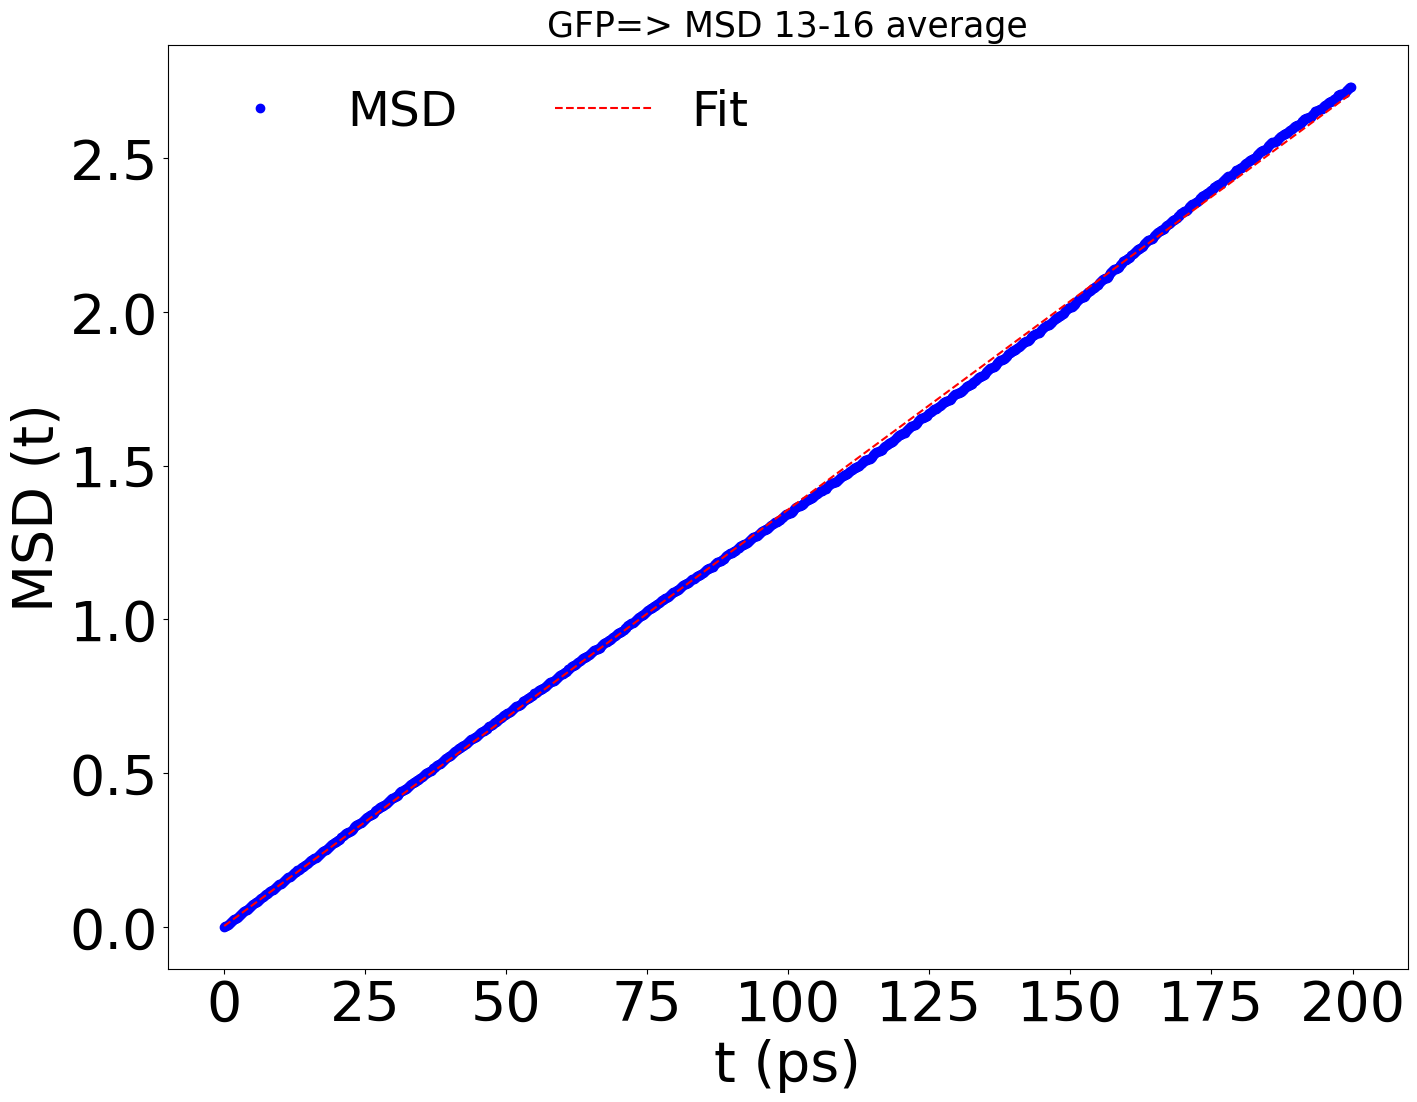

In [40]:
nstart=13
nend=17
ps=1000
file=readfile(nstart,ps)
print(' opened file ',file)
traj=np.loadtxt(file)
ns=len(traj)

print('number of lines ns = ',ns)
print('    beginning of file ')

print(traj[1])

# parameters for MSD calculations
# length is the number of steps in MSD
# steps is the number of averagings
# skip is the number of steps skipped in averaging

timestep=0.2
length=1000
steps=ns-length
skip=10

print('   length of MSD        ',length)
print('   saving time          ',timestep)
print('   number of averagings ',steps)
print('   skip                 ',skip)

# MSD calculates the array of displacements from the position specified by j

def msd(array,j,length):
    c1=np.zeros((length,3))
    i=0
    while i< length:
            c1[i]=np.array([[i*timestep,np.dot(array[j+i]-array[j],array[j+i]-array[j]),np.dot(array[j+i]-array[j],array[j+i]-array[j])**2]])
            i+=1
    return c1  

# Repeated calculations of the MSD with the step=skip and average over the 
#  steps/skip steps


def average(array,length,steps,skip):
    c2=np.zeros((length,3))
    j=0
    num=0
    while j < steps:
        c2+=msd(array,j,length)
        j+=skip
        num+=1
    print(' number of averagings ',num)
    return c2/num



r2=np.zeros((length,3))
r2=average(traj,length,steps,skip)


plt.scatter(r2[:,0],r2[:,1],s=20,c='r') 
plt.show()

alpha=np.zeros((length,2))
i=1
while i < length:
    alpha[i]=np.array([r2[i,0],3*r2[i,2]/5/r2[i,1]**2-1])
    i+=1

plt.scatter(alpha[:,0],alpha[:,1],s=20,c='r') 
plt.show()


r2av=r2
alphaav=alpha
i=nstart+1
nav=1
while i < nend:
    file=readfile(i,ps)
    print(' opened file ',file)
    traj=np.loadtxt(file)
    ns=len(traj)
    print('number of lines ns = ',ns)
    r2=average(traj,length,steps,skip)
    r2av+=r2
    nav+=1
    alpha=np.zeros((length,2))
    j=1
    while j < length:
        alpha[j]=np.array([r2[j,0],3*r2[j,2]/5/r2[j,1]**2-1])
        j+=1
        
    alphaav+=alpha
    plt.scatter(alpha[:,0],alpha[:,1],s=20,c='green') 
    plt.show()
    i+=1
    
print(' number of trajectories ',nav)    
r2av=r2av/nav
alphaav=alphaav/nav

datafile='r2GFP.dat'
cfile=os.path.join(path, datafile)
np.savetxt(cfile,r2av) 

datafile='alphaGFP.dat'
cfile=os.path.join(path, datafile)
np.savetxt(cfile,alphaav) 

outfile='r2GFP.pdf'
plotfile=os.path.join(path, outfile) 
plt.scatter(r2av[:,0],r2av[:,1],s=20,c='black') 
plt.savefig(plotfile,dpi=150,format='pdf') 
plt.show()

outfile='alphaGFP.pdf'
plotfile=os.path.join(path, outfile) 
plt.scatter(alphaav[:,0],alphaav[:,1],s=20,c='black') 
plt.savefig(plotfile,dpi=150,format='pdf') 
plt.show()


############################################
#############################################################
from scipy.stats import linregress
linear_model = linregress(r2av[:,0],r2av[:,1])
slope = linear_model.slope
error = linear_model.stderr
# dim_fac is 3 as we computed a 3D msd with 'xyz'
D = slope * 1/(2*3)
print("D::",D)
#plt.title('MSD average 1-20ns')
plt.plot(r2av[:,0],linF(linear_model.intercept,slope,r2av[:,0]),'ob')
plt.plot(r2av[:,0],r2av[:,1],'r')
plt.show()
################################################
plt.figure(figsize=(16,12))
plt.plot(r2av[:,0],r2av[:,1],'ob',label='MSD')
plt.plot(r2av[:,0],linF(linear_model.intercept,slope,r2av[:,0]),'--r',label='Fit')
#########################################################################
plt.xlabel("t (ps)",fontsize=40)
plt.ylabel(r"MSD (t)",fontsize=40)
plt.title("GFP=> MSD 13-16 average",fontsize=25)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
#plt.title('MSD 1-20 average',fontsize=30)
plt.legend(loc=0,fontsize=35,ncol=2, frameon=False)
plt.savefig("./MSD_GFP13-16.pdf", dpi=1000 )

 opened file  ./msd-Original/coor_gfp/coor_16ns_1000ps.dat
number of lines ns =  5000
    beginning of file 
[-8.402753 17.399502 -1.413758]
   length of MSD         1000
   saving time           0.2
   number of averagings  4000
   skip                  10
 number of averagings  400


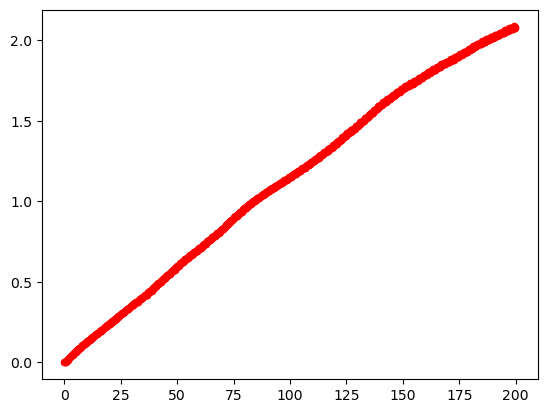

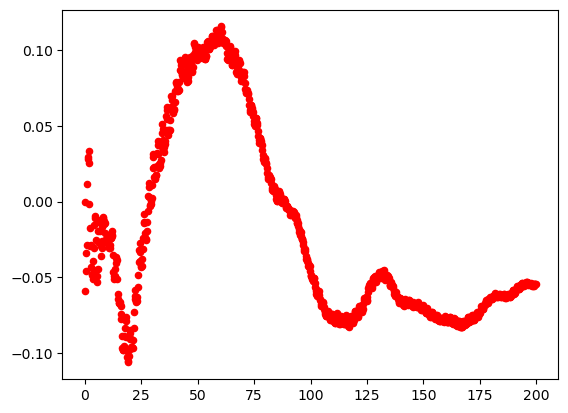

 opened file  ./msd-Original/coor_gfp/coor_17ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


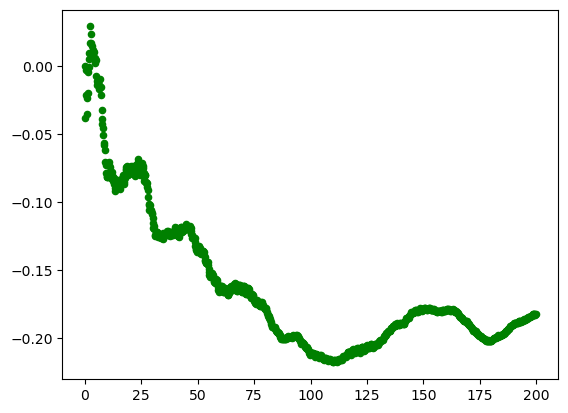

 opened file  ./msd-Original/coor_gfp/coor_18ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


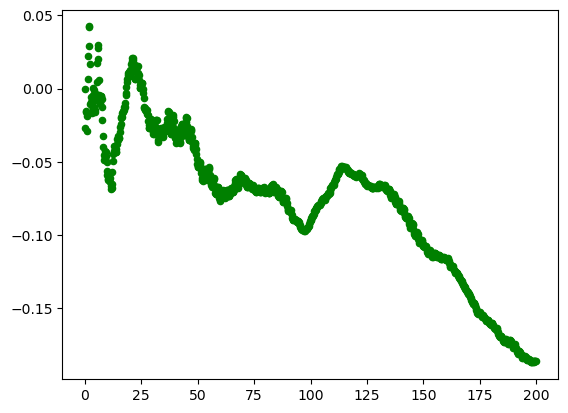

 opened file  ./msd-Original/coor_gfp/coor_19ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


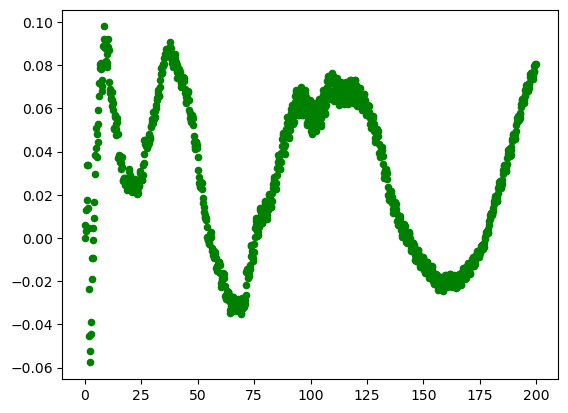

 opened file  ./msd-Original/coor_gfp/coor_20ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


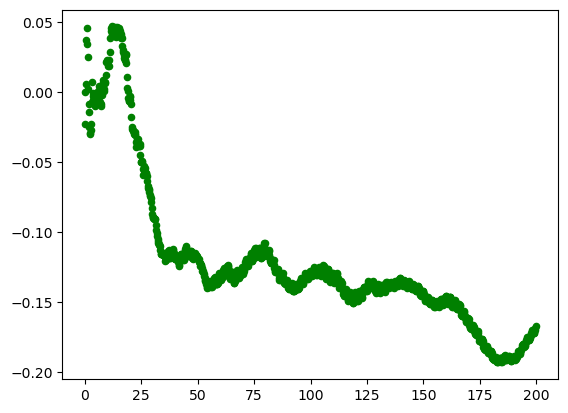

 number of trajectories  5


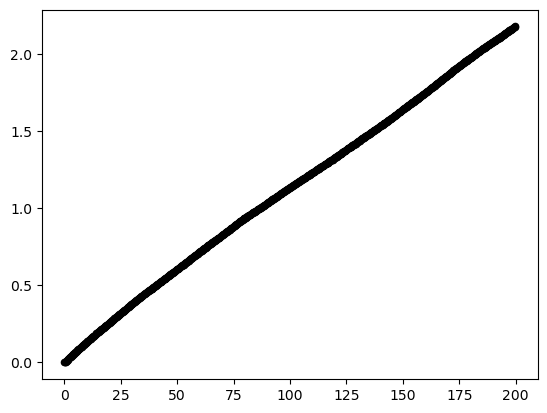

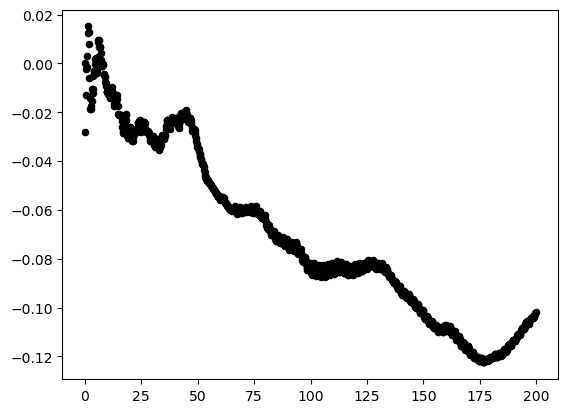

D:: 0.0017761394680220572


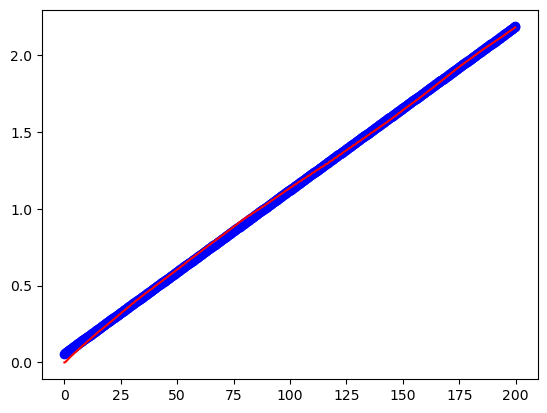

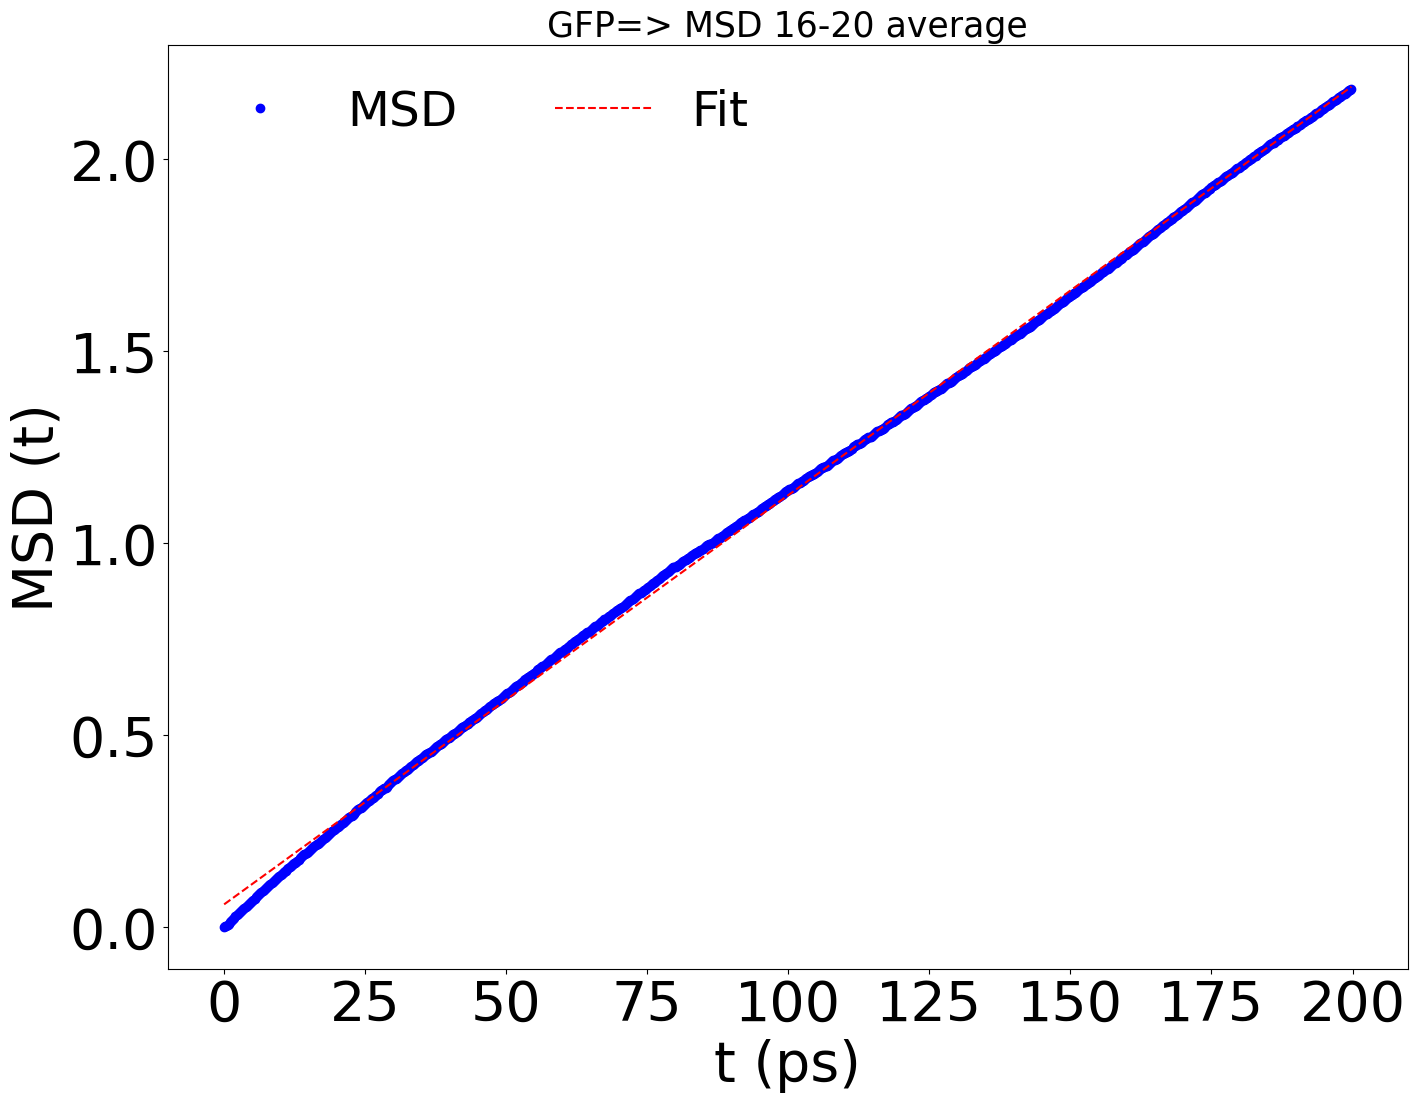

In [41]:
nstart=16
nend=21
ps=1000
file=readfile(nstart,ps)
print(' opened file ',file)
traj=np.loadtxt(file)
ns=len(traj)

print('number of lines ns = ',ns)
print('    beginning of file ')

print(traj[1])

# parameters for MSD calculations
# length is the number of steps in MSD
# steps is the number of averagings
# skip is the number of steps skipped in averaging

timestep=0.2
length=1000
steps=ns-length
skip=10

print('   length of MSD        ',length)
print('   saving time          ',timestep)
print('   number of averagings ',steps)
print('   skip                 ',skip)

# MSD calculates the array of displacements from the position specified by j

def msd(array,j,length):
    c1=np.zeros((length,3))
    i=0
    while i< length:
            c1[i]=np.array([[i*timestep,np.dot(array[j+i]-array[j],array[j+i]-array[j]),np.dot(array[j+i]-array[j],array[j+i]-array[j])**2]])
            i+=1
    return c1  

# Repeated calculations of the MSD with the step=skip and average over the 
#  steps/skip steps


def average(array,length,steps,skip):
    c2=np.zeros((length,3))
    j=0
    num=0
    while j < steps:
        c2+=msd(array,j,length)
        j+=skip
        num+=1
    print(' number of averagings ',num)
    return c2/num



r2=np.zeros((length,3))
r2=average(traj,length,steps,skip)


plt.scatter(r2[:,0],r2[:,1],s=20,c='r') 
plt.show()

alpha=np.zeros((length,2))
i=1
while i < length:
    alpha[i]=np.array([r2[i,0],3*r2[i,2]/5/r2[i,1]**2-1])
    i+=1

plt.scatter(alpha[:,0],alpha[:,1],s=20,c='r') 
plt.show()


r2av=r2
alphaav=alpha
i=nstart+1
nav=1
while i < nend:
    file=readfile(i,ps)
    print(' opened file ',file)
    traj=np.loadtxt(file)
    ns=len(traj)
    print('number of lines ns = ',ns)
    r2=average(traj,length,steps,skip)
    r2av+=r2
    nav+=1
    alpha=np.zeros((length,2))
    j=1
    while j < length:
        alpha[j]=np.array([r2[j,0],3*r2[j,2]/5/r2[j,1]**2-1])
        j+=1
        
    alphaav+=alpha
    plt.scatter(alpha[:,0],alpha[:,1],s=20,c='green') 
    plt.show()
    i+=1
    
print(' number of trajectories ',nav)    
r2av=r2av/nav
alphaav=alphaav/nav

datafile='r2GFP.dat'
cfile=os.path.join(path, datafile)
np.savetxt(cfile,r2av) 

datafile='alphaGFP.dat'
cfile=os.path.join(path, datafile)
np.savetxt(cfile,alphaav) 

outfile='r2GFP.pdf'
plotfile=os.path.join(path, outfile) 
plt.scatter(r2av[:,0],r2av[:,1],s=20,c='black') 
plt.savefig(plotfile,dpi=150,format='pdf') 
plt.show()

outfile='alphaGFP.pdf'
plotfile=os.path.join(path, outfile) 
plt.scatter(alphaav[:,0],alphaav[:,1],s=20,c='black') 
plt.savefig(plotfile,dpi=150,format='pdf') 
plt.show()


############################################
#############################################################
from scipy.stats import linregress
linear_model = linregress(r2av[:,0],r2av[:,1])
slope = linear_model.slope
error = linear_model.stderr
# dim_fac is 3 as we computed a 3D msd with 'xyz'
D = slope * 1/(2*3)
print("D::",D)
#plt.title('MSD average 1-20ns')
plt.plot(r2av[:,0],linF(linear_model.intercept,slope,r2av[:,0]),'ob')
plt.plot(r2av[:,0],r2av[:,1],'r')
plt.show()
################################################
plt.figure(figsize=(16,12))
plt.plot(r2av[:,0],r2av[:,1],'ob',label='MSD')
plt.plot(r2av[:,0],linF(linear_model.intercept,slope,r2av[:,0]),'--r',label='Fit')
#########################################################################
plt.xlabel("t (ps)",fontsize=40)
plt.ylabel(r"MSD (t)",fontsize=40)
plt.title("GFP=> MSD 16-20 average",fontsize=25)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
#plt.title('MSD 1-20 average',fontsize=30)
plt.legend(loc=0,fontsize=35,ncol=2, frameon=False)
plt.savefig("./MSD_GFP16-20.pdf", dpi=1000 )

In [45]:
MSD_4ns=np.array([0.001728,0.001839,0.001370,0.002259,0.001776])

In [49]:
MSD_4nsAve=np.average(MSD_4ns)
print(MSD_4nsAve)

0.0017943999999999998


In [48]:
print(np.min(MSD_4ns))
print(np.max(MSD_4ns))

0.00137
0.002259


# The Results Starts From Here

# GFP q=6

In [249]:
path=os.path.dirname('./msd-Original/')

 opened file  ./msd-Original/coor_gfp/coor_1ns_1000ps.dat
number of lines ns =  5000
    beginning of file 
[-8.293625  6.398821 -3.04575 ]
   length of MSD         1000
   saving time           0.2
   number of averagings  4000
   skip                  10
 number of averagings  400


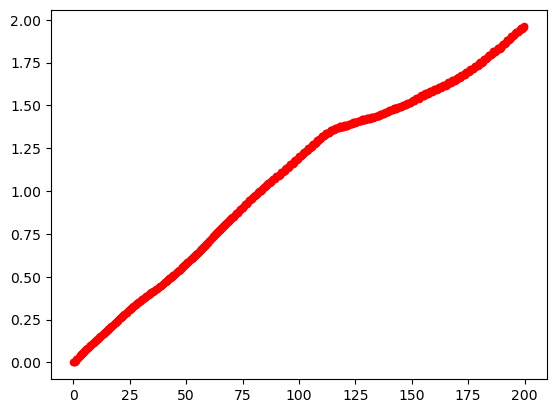

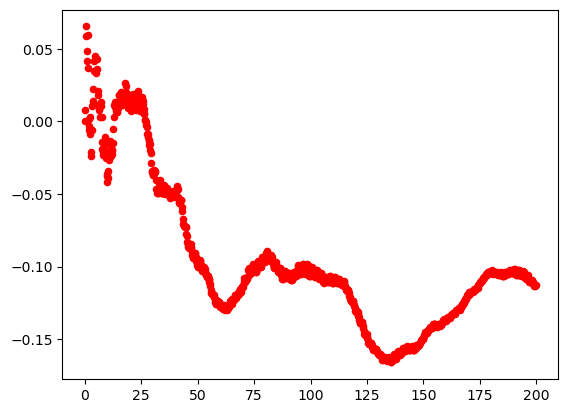

 opened file  ./msd-Original/coor_gfp/coor_2ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


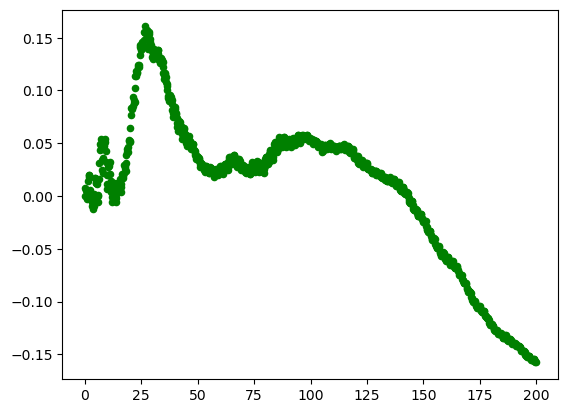

 opened file  ./msd-Original/coor_gfp/coor_3ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


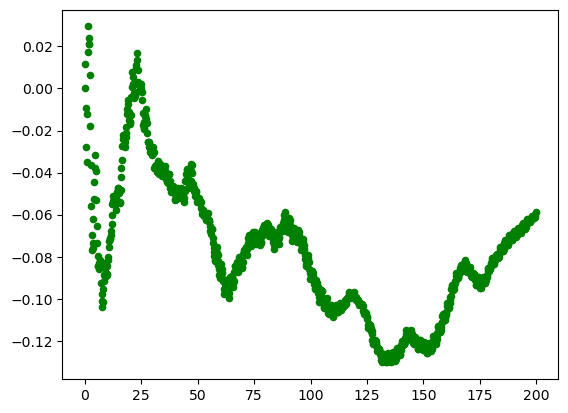

 opened file  ./msd-Original/coor_gfp/coor_4ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


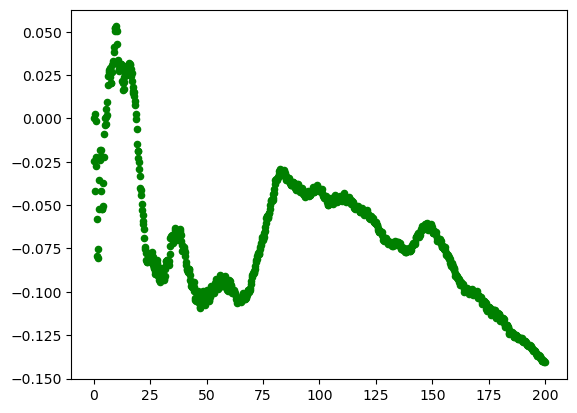

 opened file  ./msd-Original/coor_gfp/coor_5ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


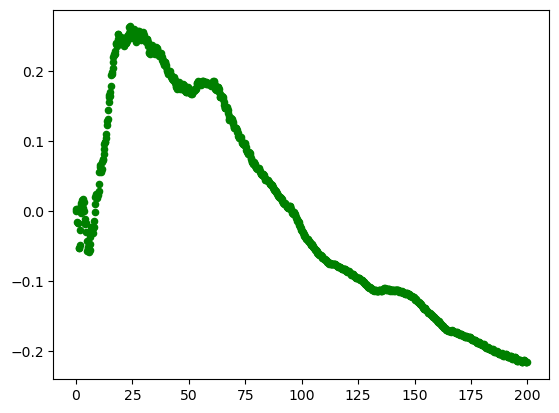

 opened file  ./msd-Original/coor_gfp/coor_6ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


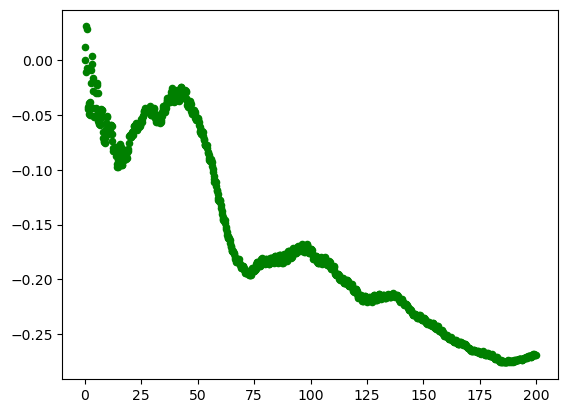

 opened file  ./msd-Original/coor_gfp/coor_7ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


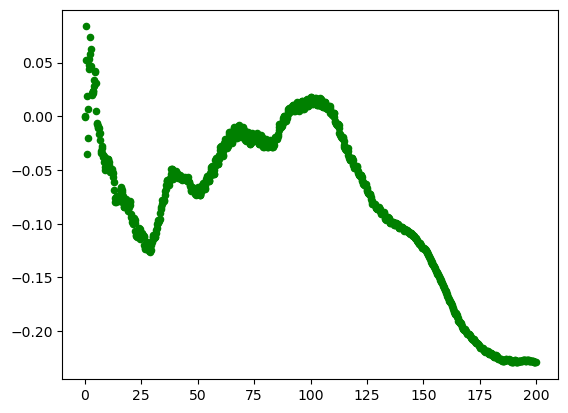

 opened file  ./msd-Original/coor_gfp/coor_8ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


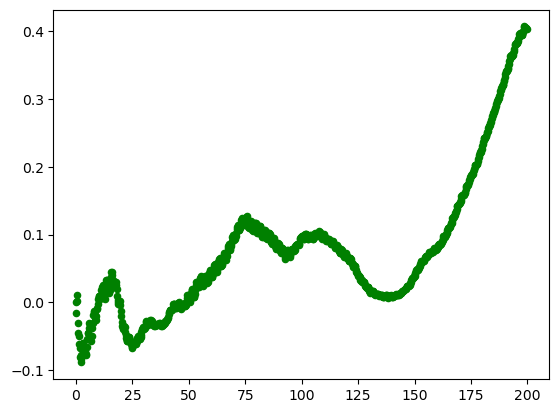

 opened file  ./msd-Original/coor_gfp/coor_9ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


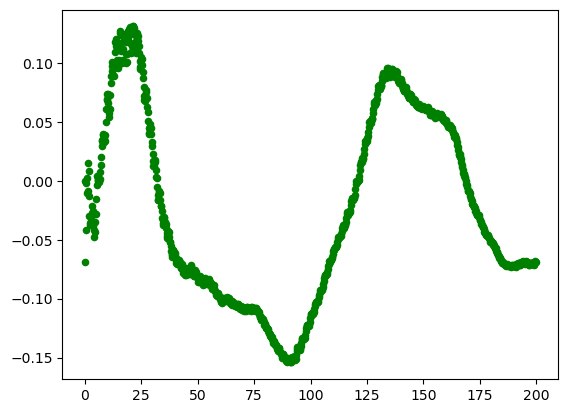

 opened file  ./msd-Original/coor_gfp/coor_10ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


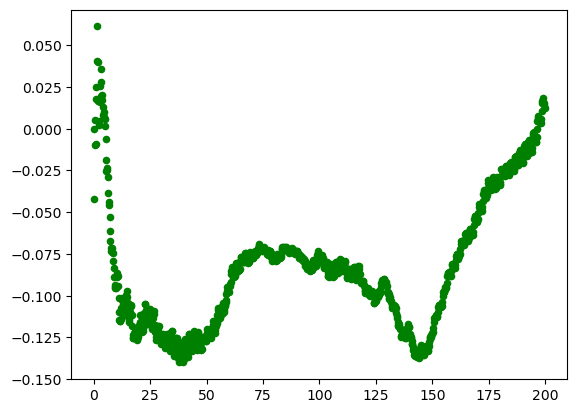

 opened file  ./msd-Original/coor_gfp/coor_11ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


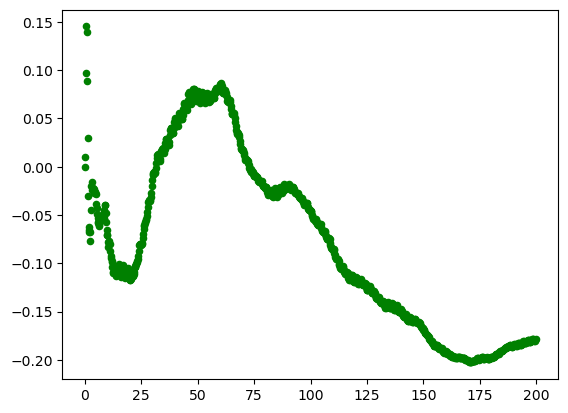

 opened file  ./msd-Original/coor_gfp/coor_12ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


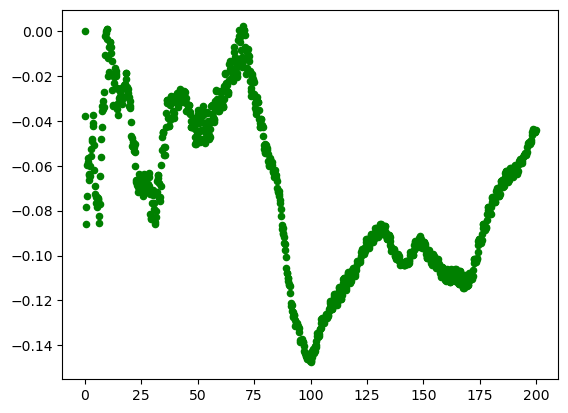

 opened file  ./msd-Original/coor_gfp/coor_13ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


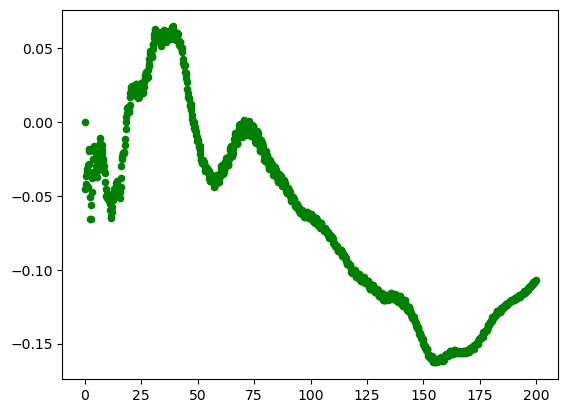

 opened file  ./msd-Original/coor_gfp/coor_14ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


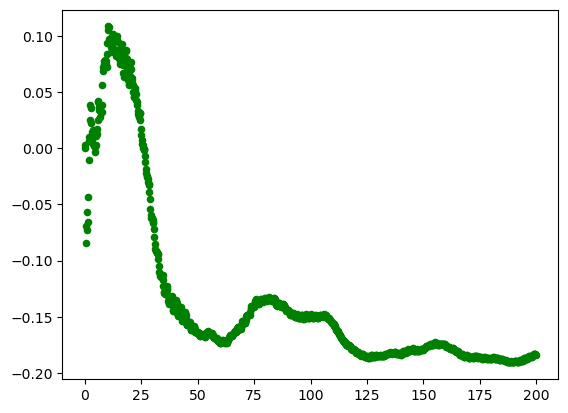

 opened file  ./msd-Original/coor_gfp/coor_15ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


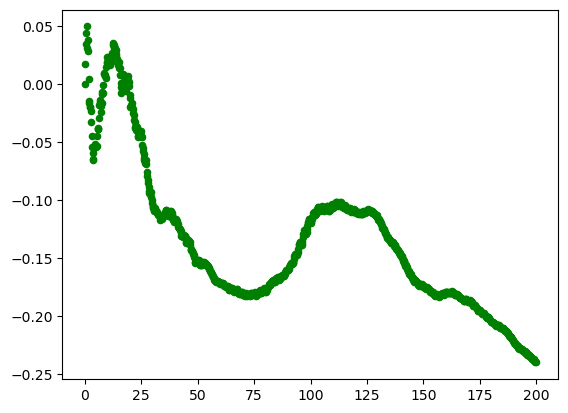

 opened file  ./msd-Original/coor_gfp/coor_16ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


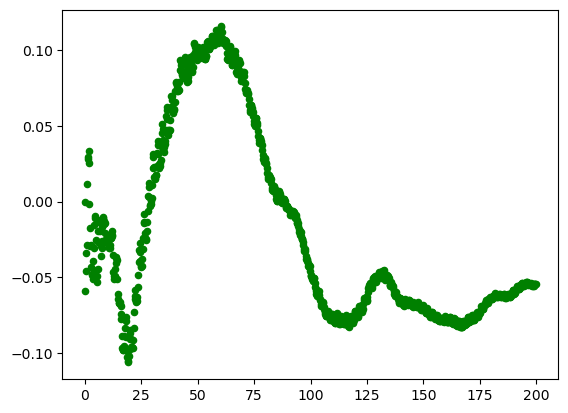

 opened file  ./msd-Original/coor_gfp/coor_17ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


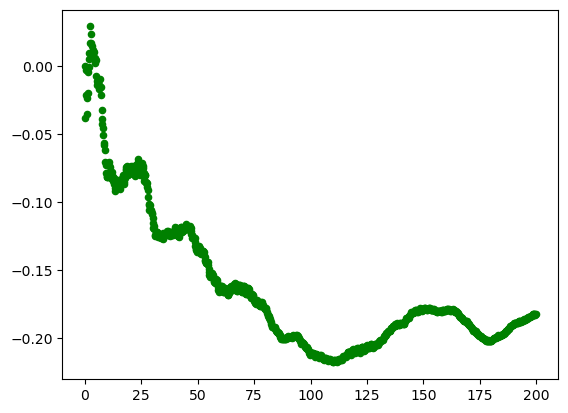

 opened file  ./msd-Original/coor_gfp/coor_18ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


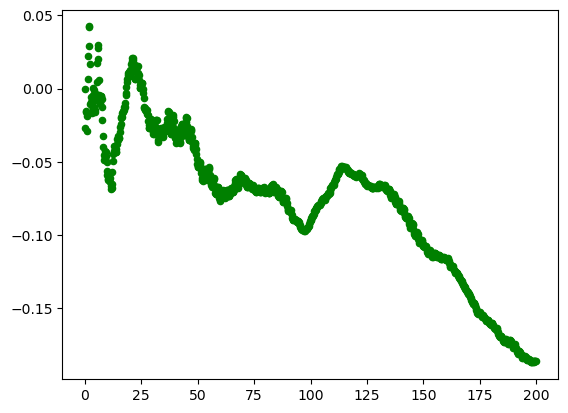

 opened file  ./msd-Original/coor_gfp/coor_19ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


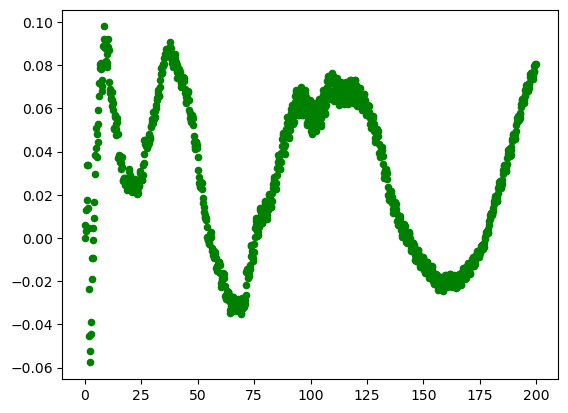

 opened file  ./msd-Original/coor_gfp/coor_20ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


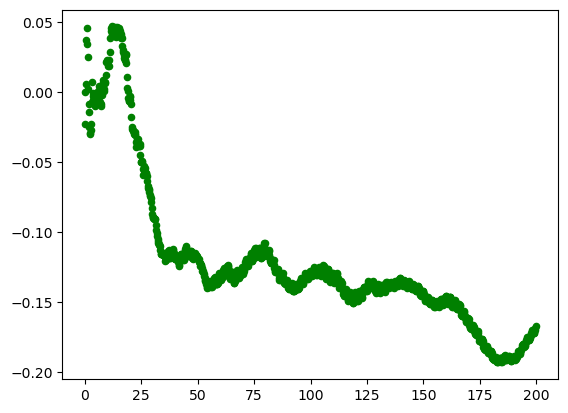

 opened file  ./msd-Original/coor_gfp/coor_21ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


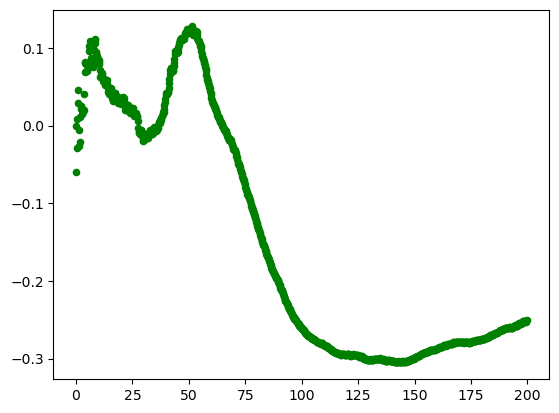

 opened file  ./msd-Original/coor_gfp/coor_22ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


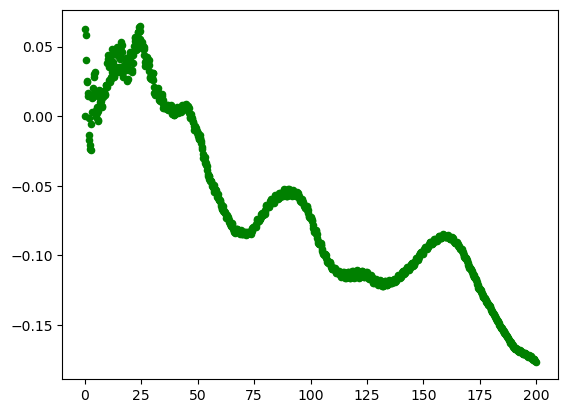

 opened file  ./msd-Original/coor_gfp/coor_23ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


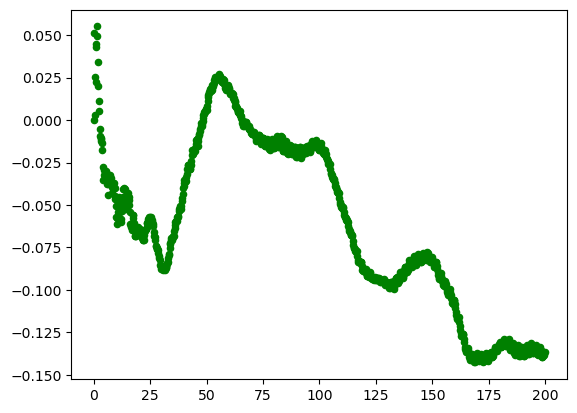

 opened file  ./msd-Original/coor_gfp/coor_24ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


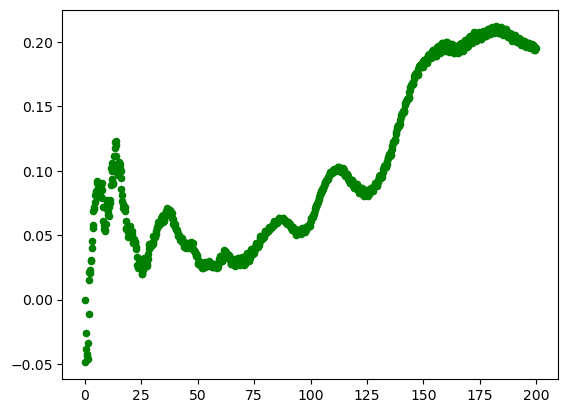

 opened file  ./msd-Original/coor_gfp/coor_25ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


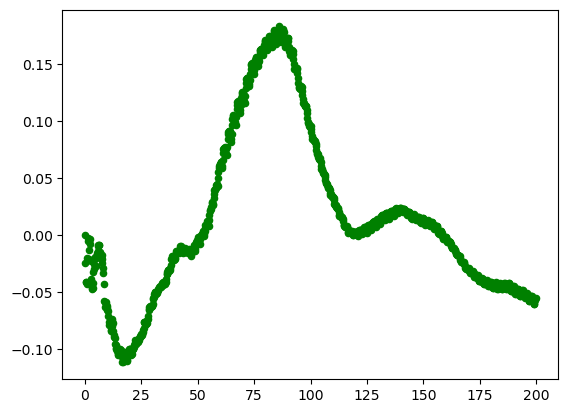

 opened file  ./msd-Original/coor_gfp/coor_26ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


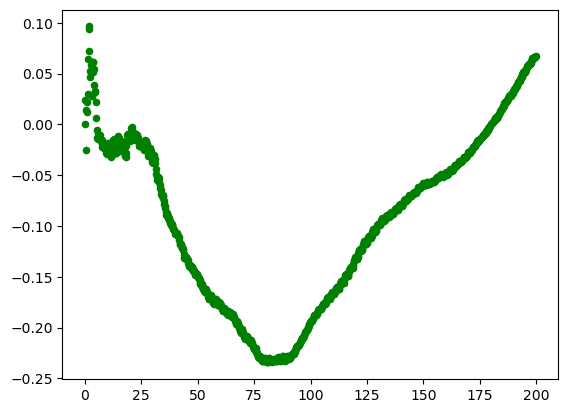

 opened file  ./msd-Original/coor_gfp/coor_27ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


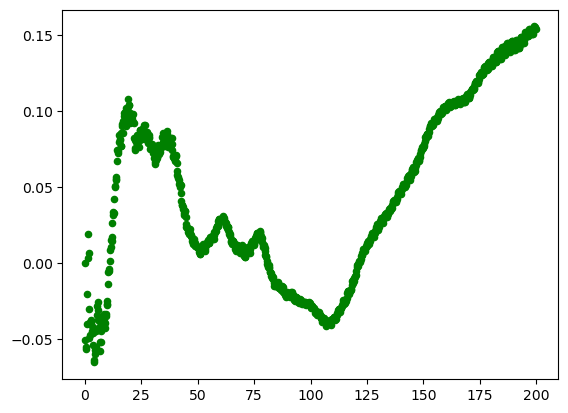

 opened file  ./msd-Original/coor_gfp/coor_28ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


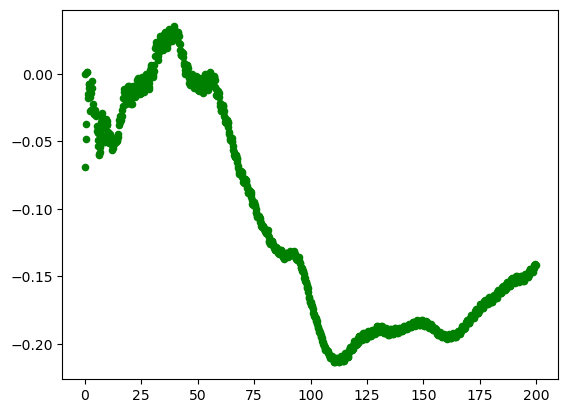

 opened file  ./msd-Original/coor_gfp/coor_29ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


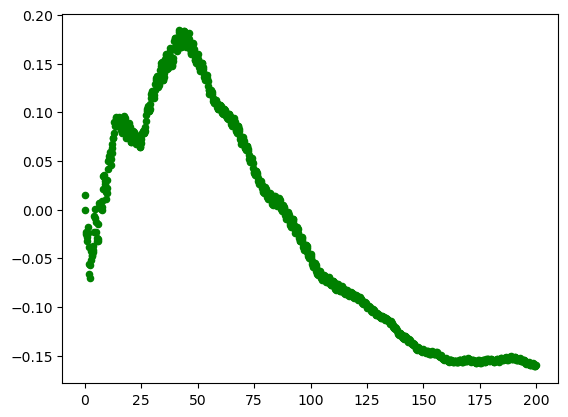

 opened file  ./msd-Original/coor_gfp/coor_30ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


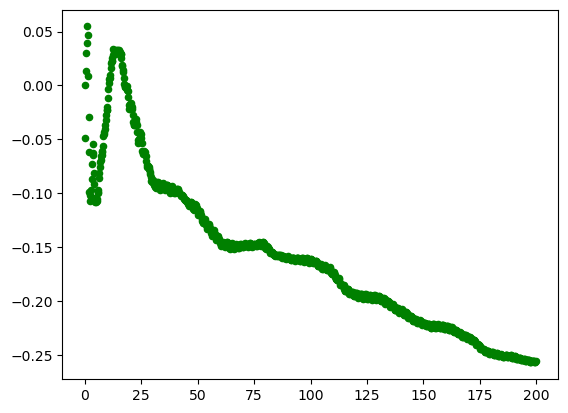

 number of trajectories  30


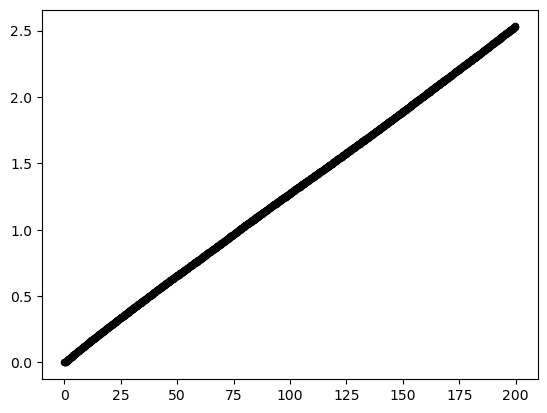

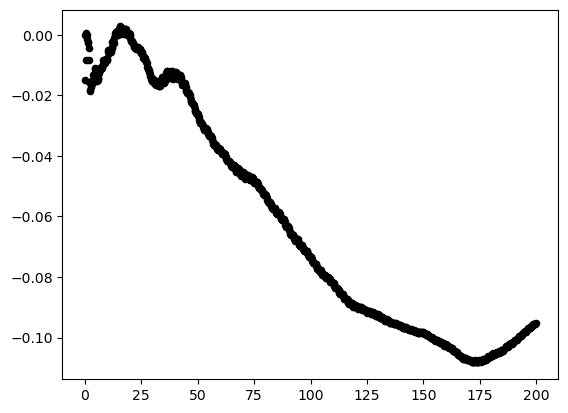

In [250]:
nstart=1
nsend=30
ps=1000
file=readfile(nstart,ps)
print(' opened file ',file)
traj=np.loadtxt(file)
ns=len(traj)

print('number of lines ns = ',ns)
print('    beginning of file ')

print(traj[1])

# parameters for MSD calculations
# length is the number of steps in MSD
# steps is the number of averagings
# skip is the number of steps skipped in averaging

timestep=0.2
length=1000
steps=ns-length
skip=10

print('   length of MSD        ',length)
print('   saving time          ',timestep)
print('   number of averagings ',steps)
print('   skip                 ',skip)

# MSD calculates the array of displacements from the position specified by j

def msd(array,j,length):
    c1=np.zeros((length,3))
    i=0
    while i< length:
            c1[i]=np.array([[i*timestep,np.dot(array[j+i]-array[j],array[j+i]-array[j]),np.dot(array[j+i]-array[j],array[j+i]-array[j])**2]])
            i+=1
    return c1  

# Repeated calculations of the MSD with the step=skip and average over the 
#  steps/skip steps


def average(array,length,steps,skip):
    c2=np.zeros((length,3))
    j=0
    num=0
    while j < steps:
        c2+=msd(array,j,length)
        j+=skip
        num+=1
    print(' number of averagings ',num)
    return c2/num



r2=np.zeros((length,3))
r2=average(traj,length,steps,skip)


plt.scatter(r2[:,0],r2[:,1],s=20,c='r') 
plt.show()

alpha=np.zeros((length,2))
i=1
while i < length:
    alpha[i]=np.array([r2[i,0],3*r2[i,2]/5/r2[i,1]**2-1])
    i+=1

plt.scatter(alpha[:,0],alpha[:,1],s=20,c='r') 
plt.show()


r2av=r2
alphaav=alpha
i=nstart+1
nav=1
while i <= nsend:
    file=readfile(i,ps)
    print(' opened file ',file)
    traj=np.loadtxt(file)
    ns=len(traj)
    print('number of lines ns = ',ns)
    r2=average(traj,length,steps,skip)
    r2av+=r2
    nav+=1
    alpha=np.zeros((length,2))
    j=1
    while j < length:
        alpha[j]=np.array([r2[j,0],3*r2[j,2]/5/r2[j,1]**2-1])
        j+=1
        
    alphaav+=alpha
    plt.scatter(alpha[:,0],alpha[:,1],s=20,c='green') 
    plt.show()
    i+=1
    
print(' number of trajectories ',nav)    
r2av=r2av/nav
alphaav=alphaav/nav

datafile='r2GFPqm6.dat'
cfile=os.path.join(path, datafile)
np.savetxt(cfile,r2av) 

datafile='alphaGFPqm6.dat'
cfile=os.path.join(path, datafile)
np.savetxt(cfile,alphaav) 

outfile='r2GFPqm6.pdf'
plotfile=os.path.join(path, outfile) 
plt.scatter(r2av[:,0],r2av[:,1],s=20,c='black') 
plt.savefig(plotfile,dpi=150,format='pdf') 
plt.show()

outfile='alphaGFPqm6.pdf'
plotfile=os.path.join(path, outfile) 
plt.scatter(alphaav[:,0],alphaav[:,1],s=20,c='black') 
plt.savefig(plotfile,dpi=150,format='pdf') 
plt.show()

D:: 0.0020830902806308633


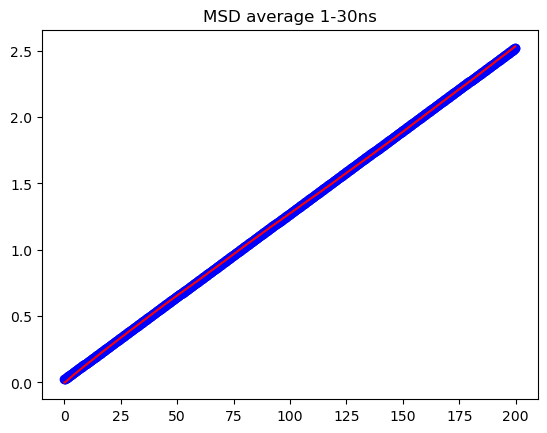

In [251]:
#############################################################
from scipy.stats import linregress
linear_model = linregress(r2av[:,0],r2av[:,1])
slope = linear_model.slope
error = linear_model.stderr
# dim_fac is 3 as we computed a 3D msd with 'xyz'
D = slope * 1/(2*3)
print("D::",D)
plt.title('MSD average 1-30ns')
plt.plot(r2av[:,0],linF(linear_model.intercept,slope,r2av[:,0]),'ob')
plt.plot(r2av[:,0],r2av[:,1],'r')
plt.show()
################################################
#ns= np.arange(1,10000,4)/1000

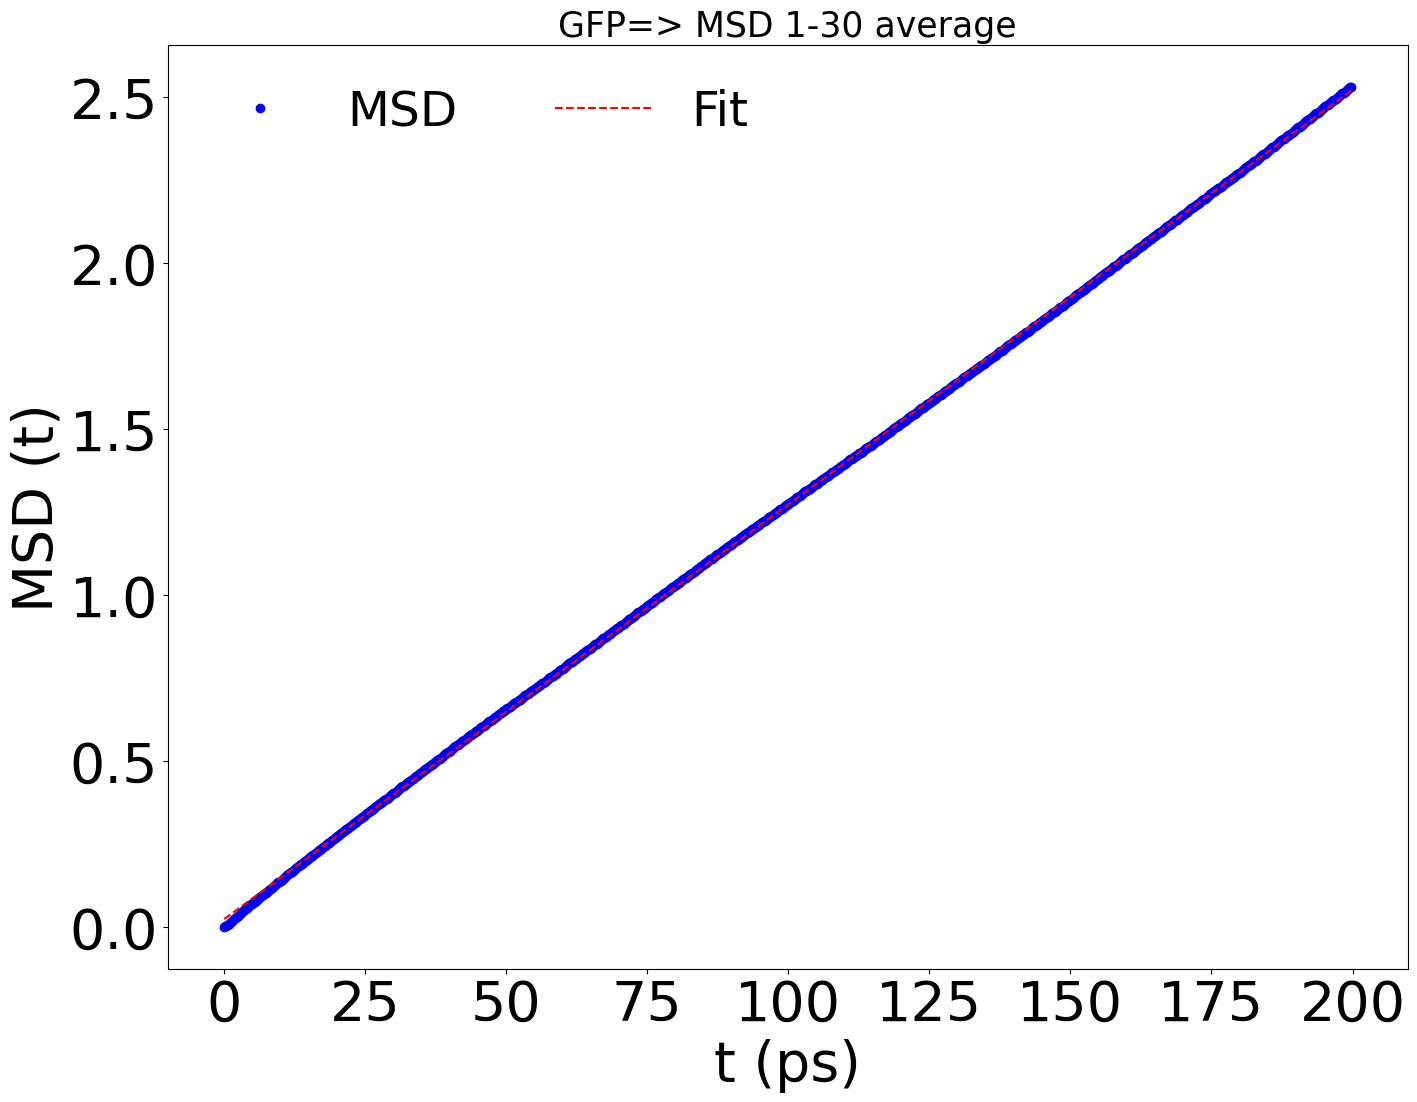

In [253]:
plt.figure(figsize=(16,12))
plt.plot(r2av[:,0],r2av[:,1],'ob',label='MSD')
plt.plot(r2av[:,0],linF(linear_model.intercept,slope,r2av[:,0]),'--r',label='Fit')
#########################################################################
plt.xlabel("t (ps)",fontsize=40)
plt.ylabel(r"MSD (t)",fontsize=40)
plt.title("GFP=> MSD 1-30 average",fontsize=25)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
#plt.title('MSD 1-20 average',fontsize=30)
plt.legend(loc=0,fontsize=35,ncol=2, frameon=False)
plt.savefig("/Users/smostaj1/Documents/GFP/Latex-setare/plot/MSD_GFP1-30qm6.pdf", dpi=1000 )
plt.savefig("/Users/smostaj1/Documents/GFP/Latex-setare/plot/MSD_GFP1-30qm6.eps", dpi=1000 ,format='eps') 

# GFP q=-29

In [9]:
path=os.path.dirname('./msd-negative/')

 opened file  ./msd-negative/coor_gfp/coor_1ns_1000ps.dat
number of lines ns =  5000
    beginning of file 
[-4.256319 -6.900228  7.274319]
   length of MSD         1000
   saving time           0.2
   number of averagings  4000
   skip                  10
 number of averagings  400


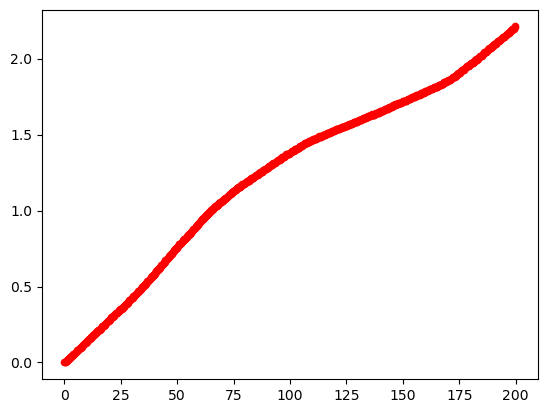

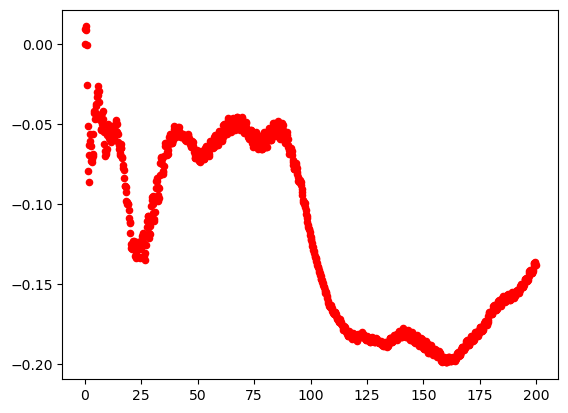

 opened file  ./msd-negative/coor_gfp/coor_2ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


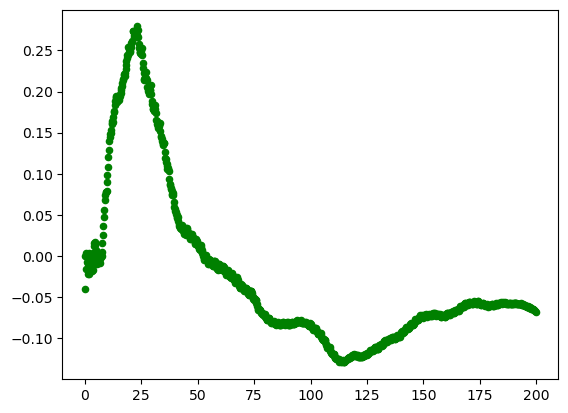

 opened file  ./msd-negative/coor_gfp/coor_3ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


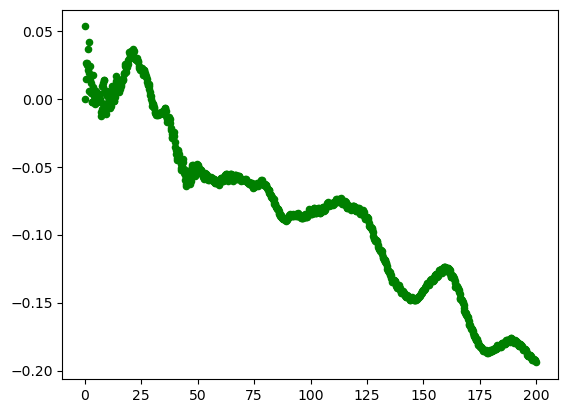

 opened file  ./msd-negative/coor_gfp/coor_4ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


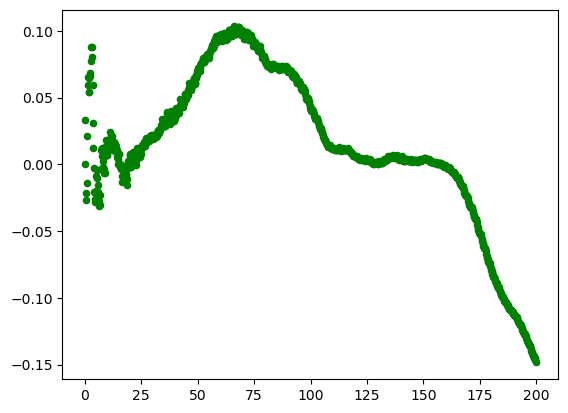

 opened file  ./msd-negative/coor_gfp/coor_5ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


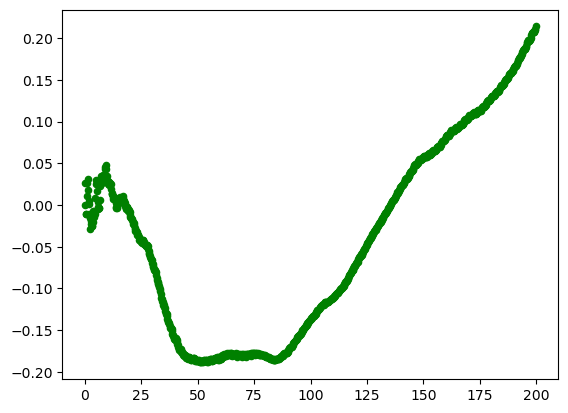

 opened file  ./msd-negative/coor_gfp/coor_6ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


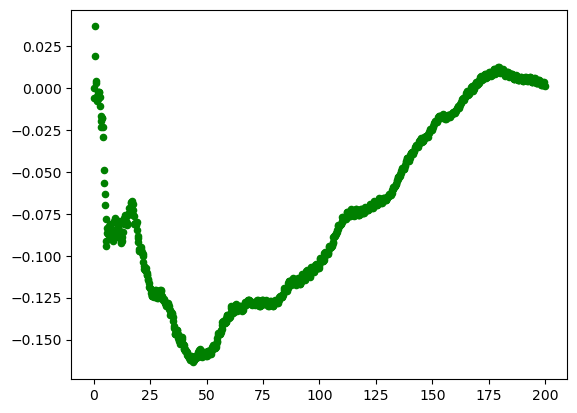

 opened file  ./msd-negative/coor_gfp/coor_7ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


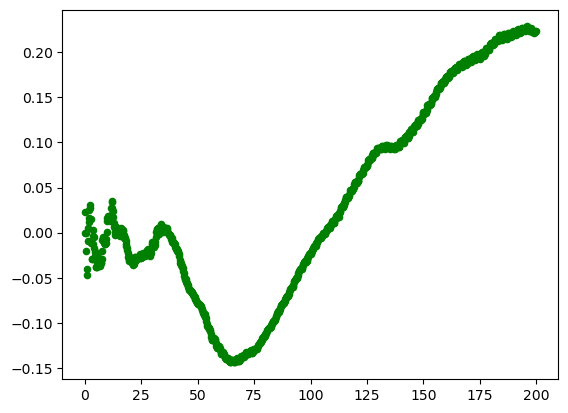

 opened file  ./msd-negative/coor_gfp/coor_8ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


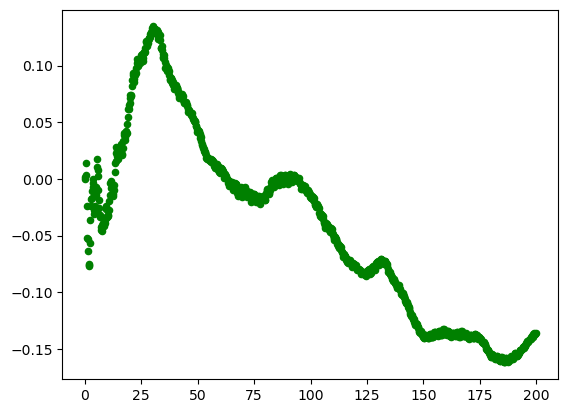

 opened file  ./msd-negative/coor_gfp/coor_9ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


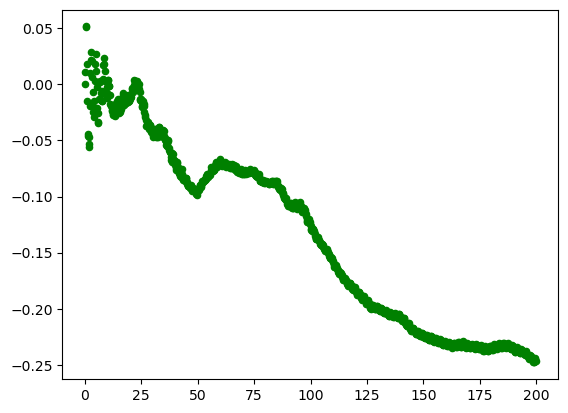

 opened file  ./msd-negative/coor_gfp/coor_10ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


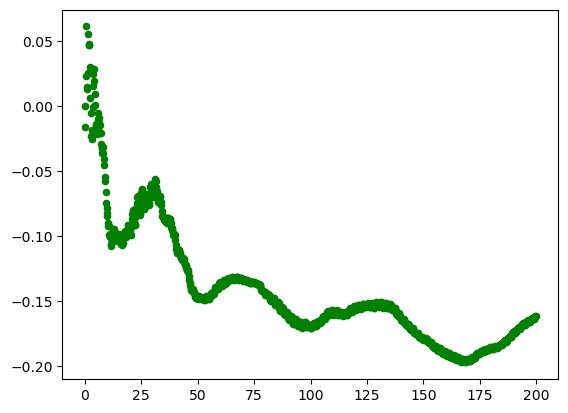

 opened file  ./msd-negative/coor_gfp/coor_11ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


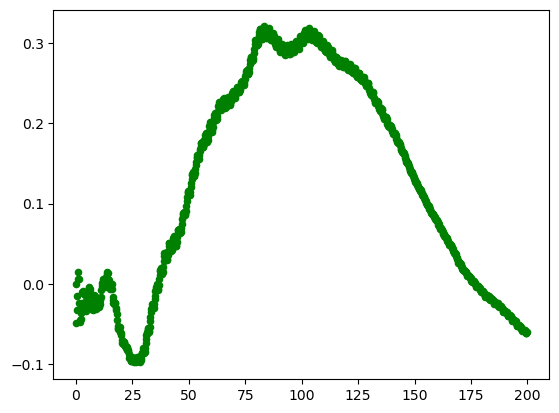

 opened file  ./msd-negative/coor_gfp/coor_12ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


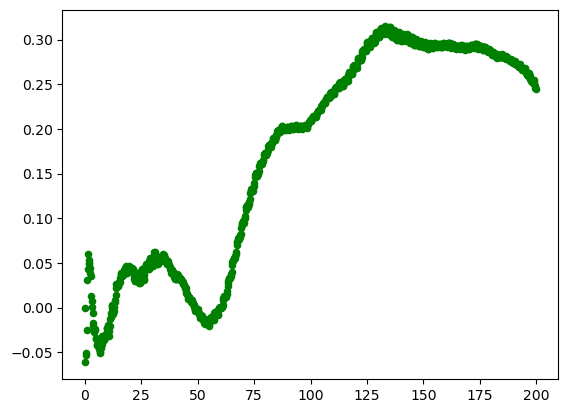

 opened file  ./msd-negative/coor_gfp/coor_13ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


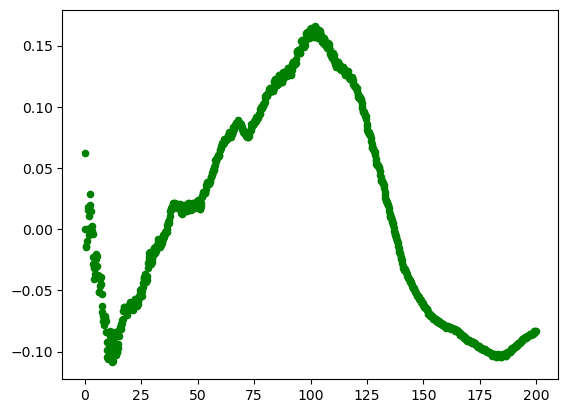

 opened file  ./msd-negative/coor_gfp/coor_14ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


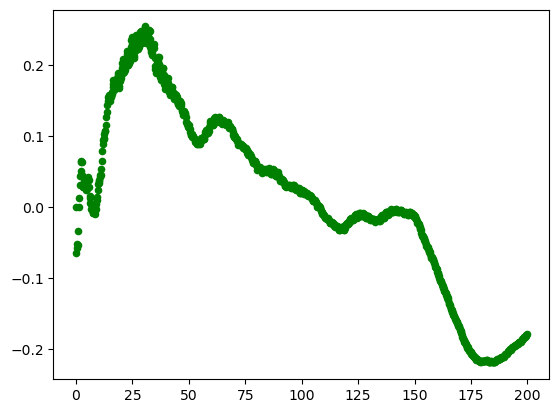

 opened file  ./msd-negative/coor_gfp/coor_15ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


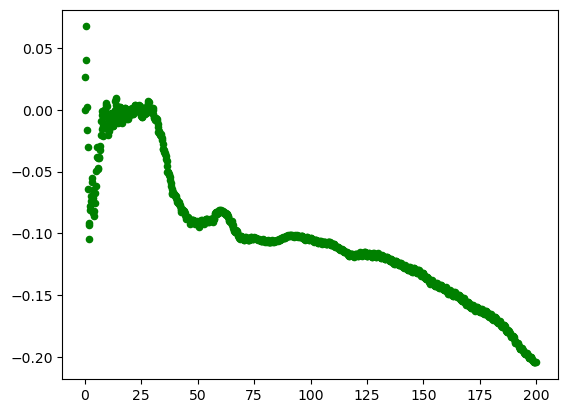

 opened file  ./msd-negative/coor_gfp/coor_16ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


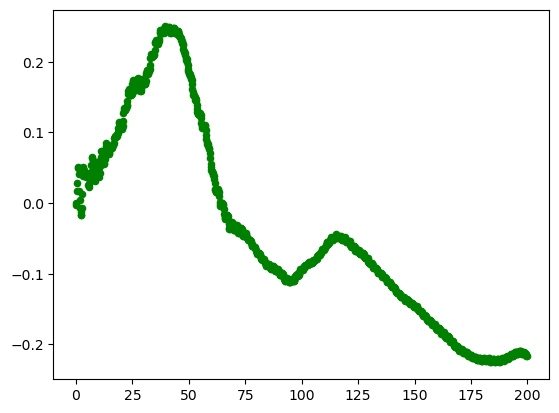

 opened file  ./msd-negative/coor_gfp/coor_17ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


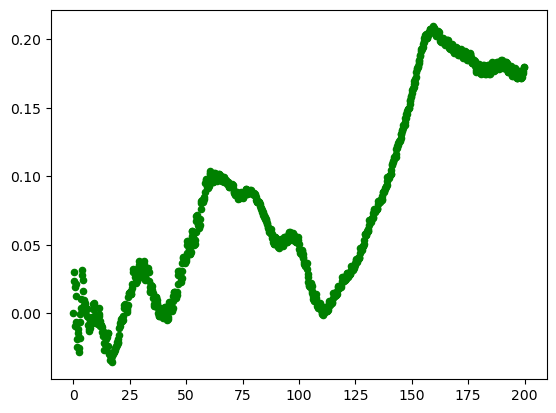

 opened file  ./msd-negative/coor_gfp/coor_18ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


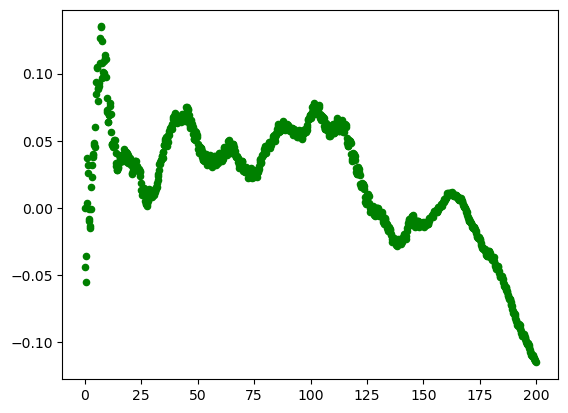

 opened file  ./msd-negative/coor_gfp/coor_19ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


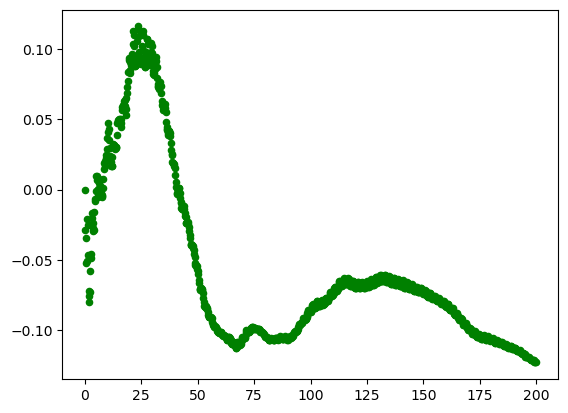

 opened file  ./msd-negative/coor_gfp/coor_20ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


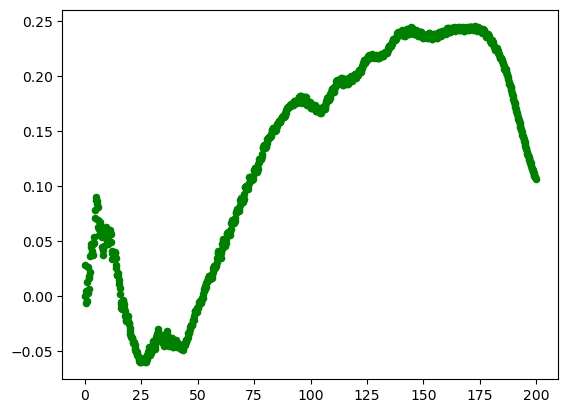

 opened file  ./msd-negative/coor_gfp/coor_21ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


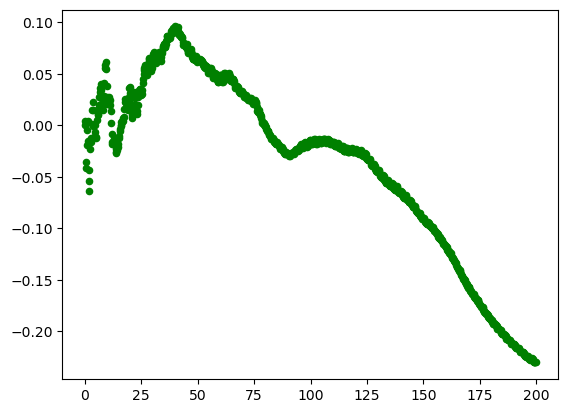

 opened file  ./msd-negative/coor_gfp/coor_22ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


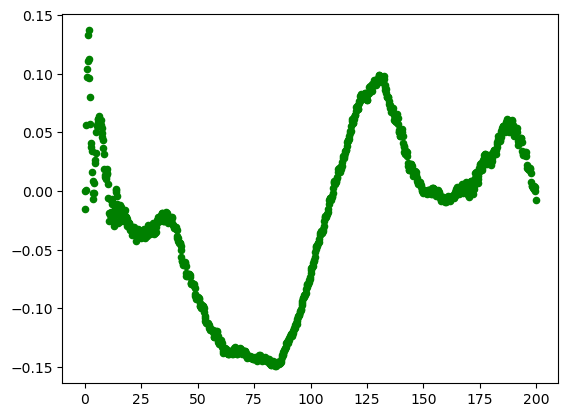

 opened file  ./msd-negative/coor_gfp/coor_23ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


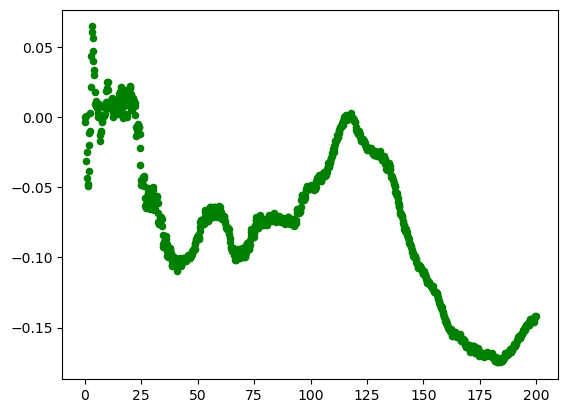

 opened file  ./msd-negative/coor_gfp/coor_24ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


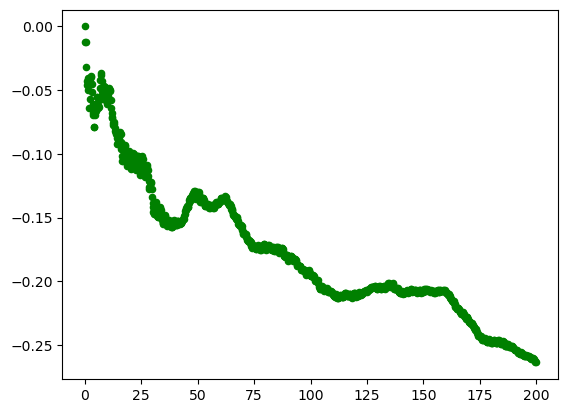

 opened file  ./msd-negative/coor_gfp/coor_25ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


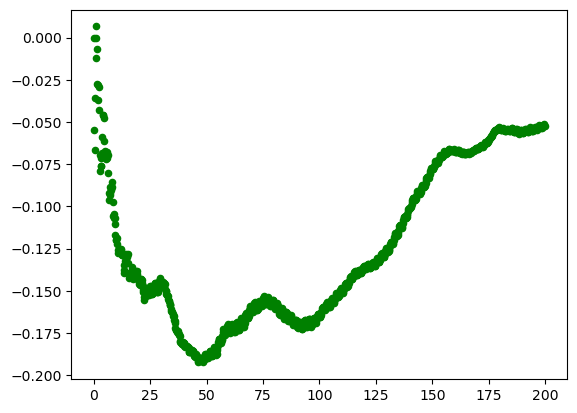

 opened file  ./msd-negative/coor_gfp/coor_26ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


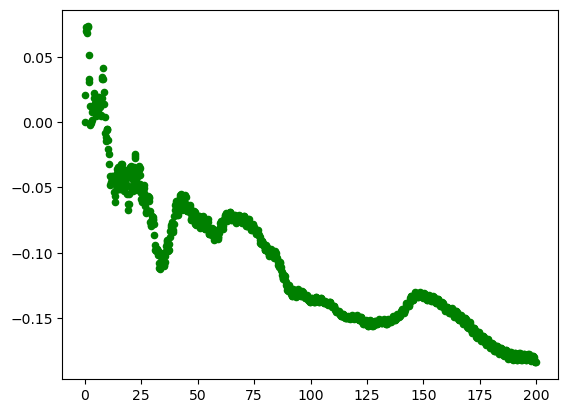

 opened file  ./msd-negative/coor_gfp/coor_27ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


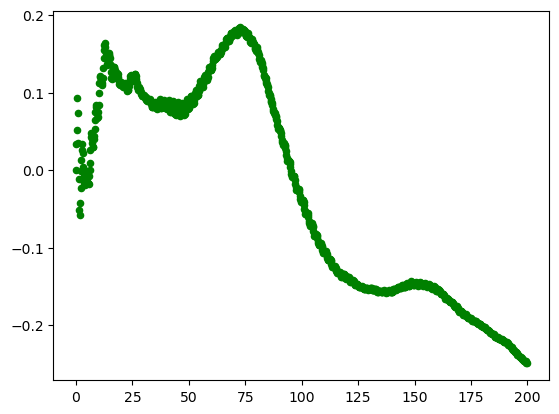

 opened file  ./msd-negative/coor_gfp/coor_28ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


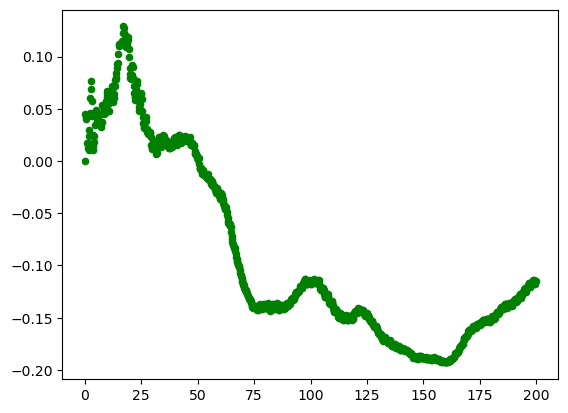

 opened file  ./msd-negative/coor_gfp/coor_29ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


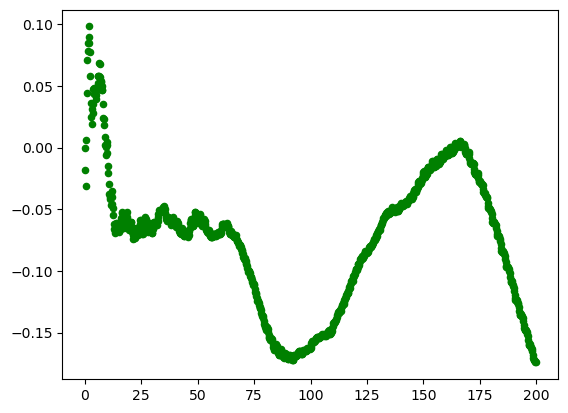

 opened file  ./msd-negative/coor_gfp/coor_30ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


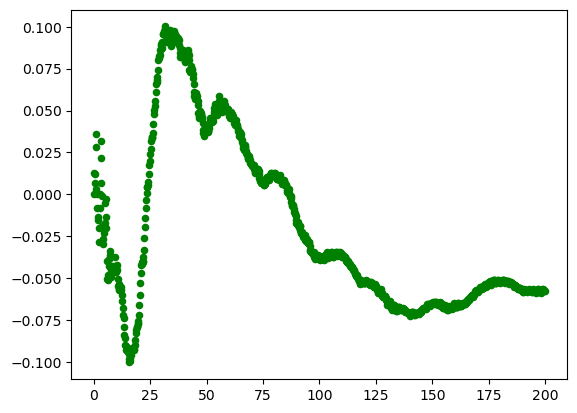

 number of trajectories  30


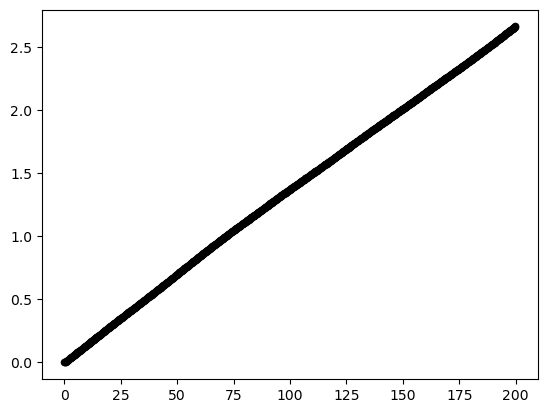

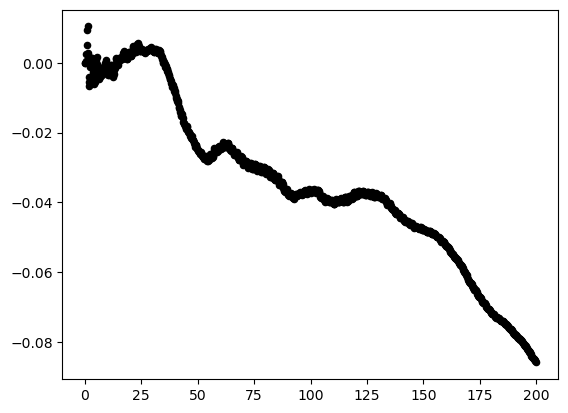

In [10]:
nstart=1
nsend=30
ps=1000
file=readfile(nstart,ps)
print(' opened file ',file)
traj=np.loadtxt(file)
ns=len(traj)

print('number of lines ns = ',ns)
print('    beginning of file ')

print(traj[1])

# parameters for MSD calculations
# length is the number of steps in MSD
# steps is the number of averagings
# skip is the number of steps skipped in averaging

timestep=0.2
length=1000
steps=ns-length
skip=10

print('   length of MSD        ',length)
print('   saving time          ',timestep)
print('   number of averagings ',steps)
print('   skip                 ',skip)

# MSD calculates the array of displacements from the position specified by j

def msd(array,j,length):
    c1=np.zeros((length,3))
    i=0
    while i< length:
            c1[i]=np.array([[i*timestep,np.dot(array[j+i]-array[j],array[j+i]-array[j]),np.dot(array[j+i]-array[j],array[j+i]-array[j])**2]])
            i+=1
    return c1  

# Repeated calculations of the MSD with the step=skip and average over the 
#  steps/skip steps


def average(array,length,steps,skip):
    c2=np.zeros((length,3))
    j=0
    num=0
    while j < steps:
        c2+=msd(array,j,length)
        j+=skip
        num+=1
    print(' number of averagings ',num)
    return c2/num



r2=np.zeros((length,3))
r2=average(traj,length,steps,skip)


plt.scatter(r2[:,0],r2[:,1],s=20,c='r') 
plt.show()

alpha=np.zeros((length,2))
i=1
while i < length:
    alpha[i]=np.array([r2[i,0],3*r2[i,2]/5/r2[i,1]**2-1])
    i+=1

plt.scatter(alpha[:,0],alpha[:,1],s=20,c='r') 
plt.show()


r2av=r2
alphaav=alpha
i=nstart+1
nav=1
while i <= nsend:
    file=readfile(i,ps)
    print(' opened file ',file)
    traj=np.loadtxt(file)
    ns=len(traj)
    print('number of lines ns = ',ns)
    r2=average(traj,length,steps,skip)
    r2av+=r2
    nav+=1
    alpha=np.zeros((length,2))
    j=1
    while j < length:
        alpha[j]=np.array([r2[j,0],3*r2[j,2]/5/r2[j,1]**2-1])
        j+=1
        
    alphaav+=alpha
    plt.scatter(alpha[:,0],alpha[:,1],s=20,c='green') 
    plt.show()
    i+=1
    
print(' number of trajectories ',nav)    
r2av=r2av/nav
alphaav=alphaav/nav

datafile='r2GFPqm29.dat'
cfile=os.path.join(path, datafile)
np.savetxt(cfile,r2av) 

datafile='alphaGFPqm29.dat'
cfile=os.path.join(path, datafile)
np.savetxt(cfile,alphaav) 

outfile='r2GFPqm29.pdf'
plotfile=os.path.join(path, outfile) 
plt.scatter(r2av[:,0],r2av[:,1],s=20,c='black') 
plt.savefig(plotfile,dpi=150,format='pdf') 
plt.show()

outfile='alphaGFPqm29.pdf'
plotfile=os.path.join(path, outfile) 
plt.scatter(alphaav[:,0],alphaav[:,1],s=20,c='black') 
plt.savefig(plotfile,dpi=150,format='pdf') 
plt.show()

D:: 0.002200810599435739


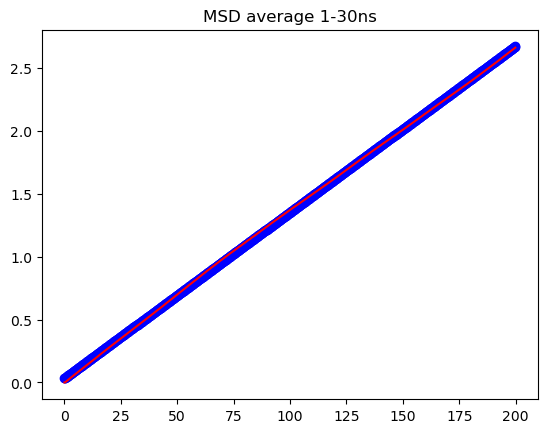

In [11]:
#############################################################
from scipy.stats import linregress
linear_model = linregress(r2av[:,0],r2av[:,1])
slope = linear_model.slope
error = linear_model.stderr
# dim_fac is 3 as we computed a 3D msd with 'xyz'
D = slope * 1/(2*3)
print("D::",D)
plt.title('MSD average 1-30ns')
plt.plot(r2av[:,0],linF(linear_model.intercept,slope,r2av[:,0]),'ob')
plt.plot(r2av[:,0],r2av[:,1],'r')
plt.show()
################################################
#ns= np.arange(1,10000,4)/1000

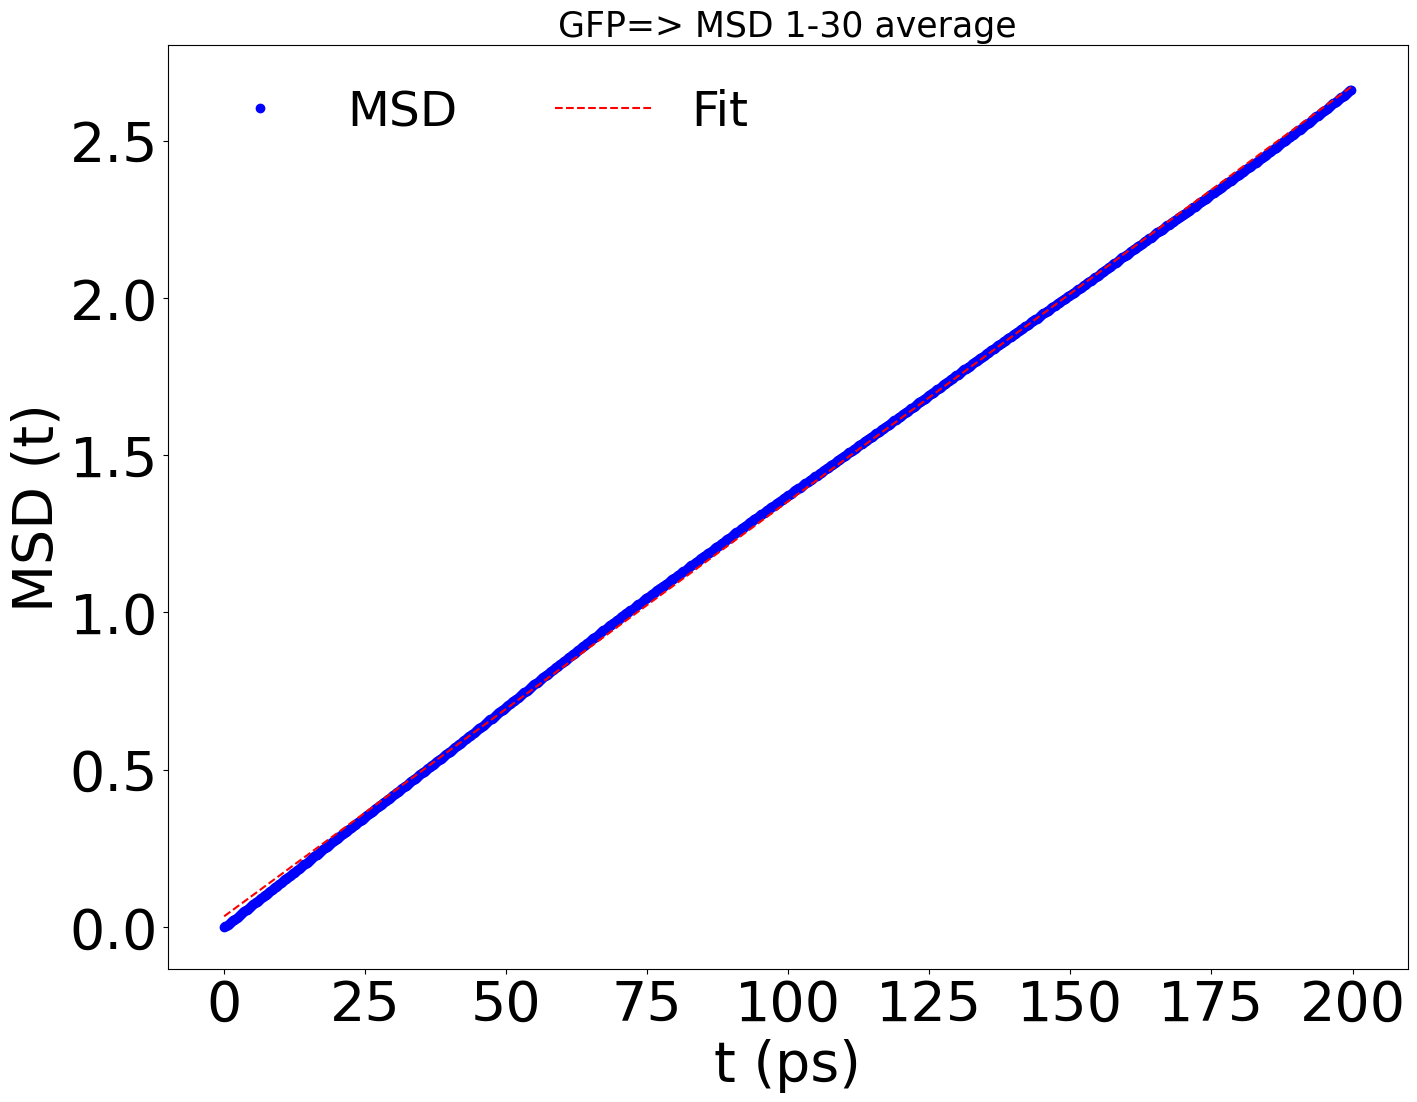

In [13]:
plt.figure(figsize=(16,12))
plt.plot(r2av[:,0],r2av[:,1],'ob',label='MSD')
plt.plot(r2av[:,0],linF(linear_model.intercept,slope,r2av[:,0]),'--r',label='Fit')
#########################################################################
plt.xlabel("t (ps)",fontsize=40)
plt.ylabel(r"MSD (t)",fontsize=40)
plt.title("GFP=> MSD 1-30 average",fontsize=25)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
#plt.title('MSD 1-20 average',fontsize=30)
plt.legend(loc=0,fontsize=35,ncol=2, frameon=False)
plt.savefig("/Users/smostaj1/Documents/GFP/Latex-file/plot/MSD_GFP1-30qm29.pdf", dpi=1000 )
plt.savefig("/Users/smostaj1/Documents/GFP/Latex-file/plot/MSD_GFP1-30qm29.eps", dpi=1000 ,format='eps') 

# GFP q=35

In [14]:
path=os.path.dirname('./msd-positive/')

 opened file  ./msd-positive/coor_gfp/coor_1ns_1000ps.dat
number of lines ns =  5000
    beginning of file 
[13.303651 -0.711529 -0.381889]
   length of MSD         1000
   saving time           0.2
   number of averagings  4000
   skip                  10
 number of averagings  400


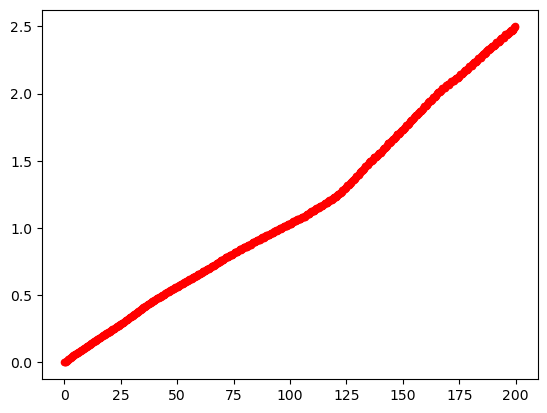

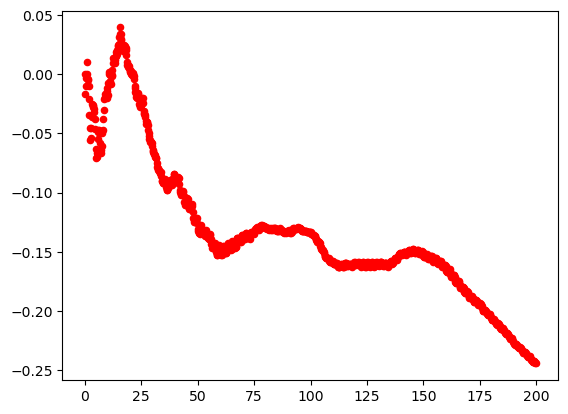

 opened file  ./msd-positive/coor_gfp/coor_2ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


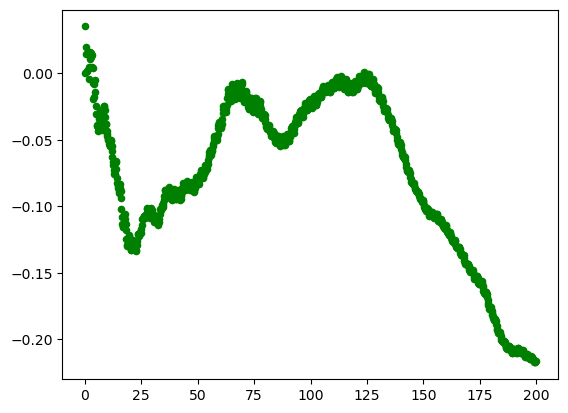

 opened file  ./msd-positive/coor_gfp/coor_3ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


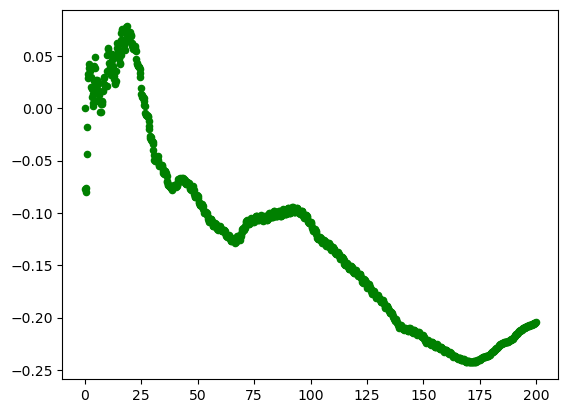

 opened file  ./msd-positive/coor_gfp/coor_4ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


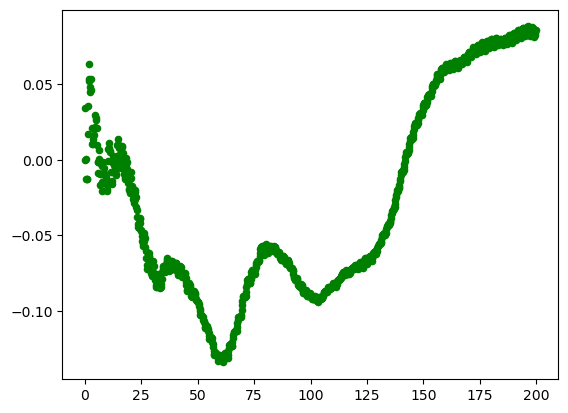

 opened file  ./msd-positive/coor_gfp/coor_5ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


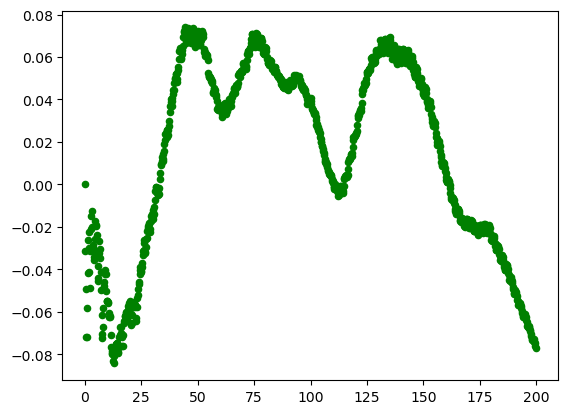

 opened file  ./msd-positive/coor_gfp/coor_6ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


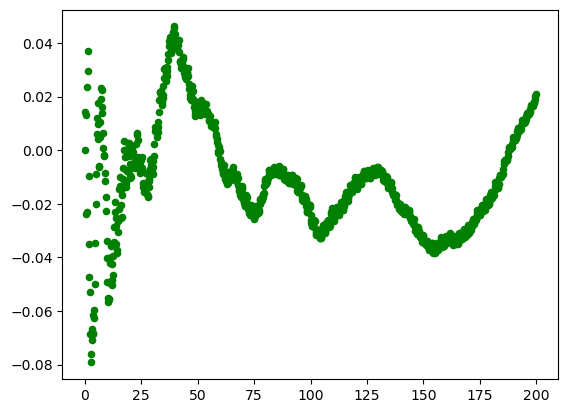

 opened file  ./msd-positive/coor_gfp/coor_7ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


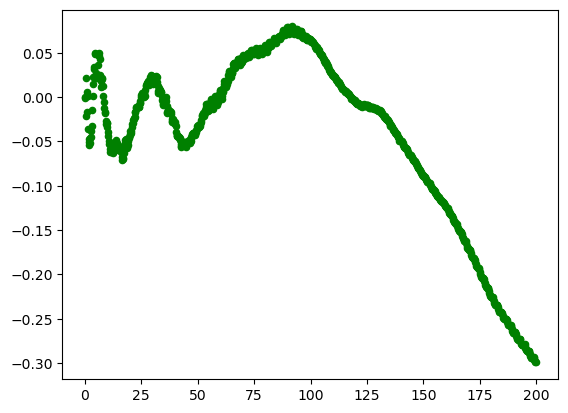

 opened file  ./msd-positive/coor_gfp/coor_8ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


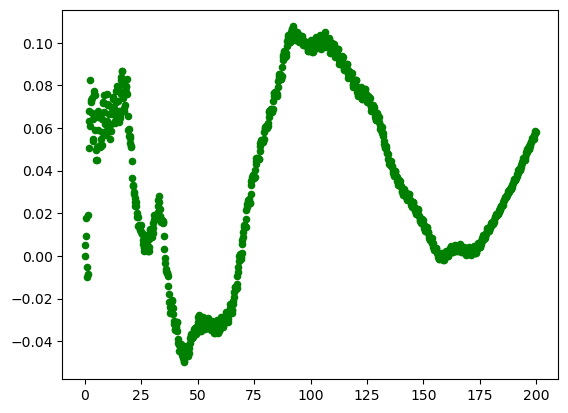

 opened file  ./msd-positive/coor_gfp/coor_9ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


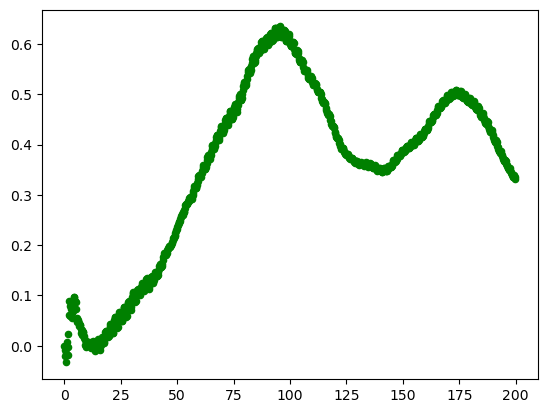

 opened file  ./msd-positive/coor_gfp/coor_10ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


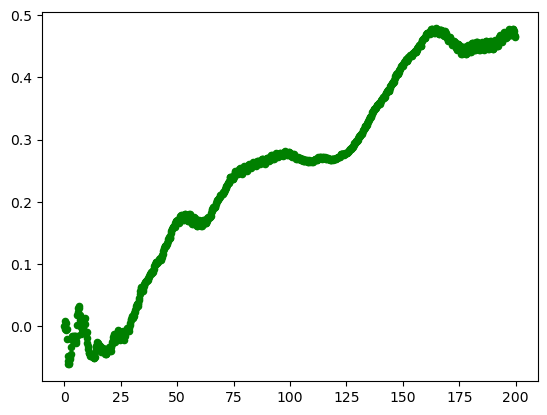

 opened file  ./msd-positive/coor_gfp/coor_11ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


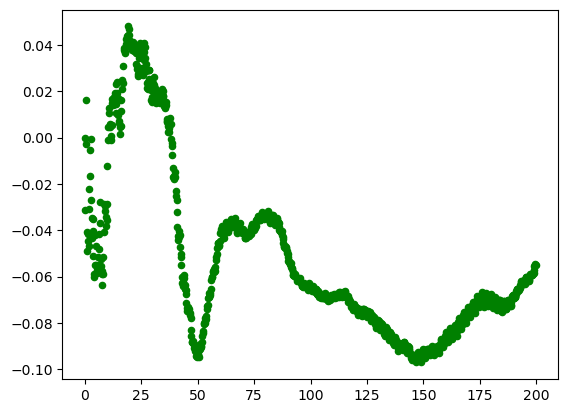

 opened file  ./msd-positive/coor_gfp/coor_12ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


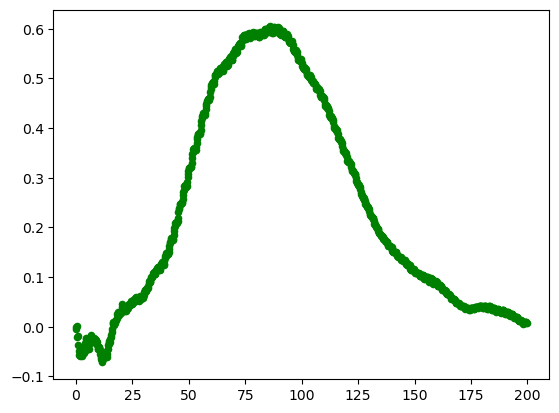

 opened file  ./msd-positive/coor_gfp/coor_13ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


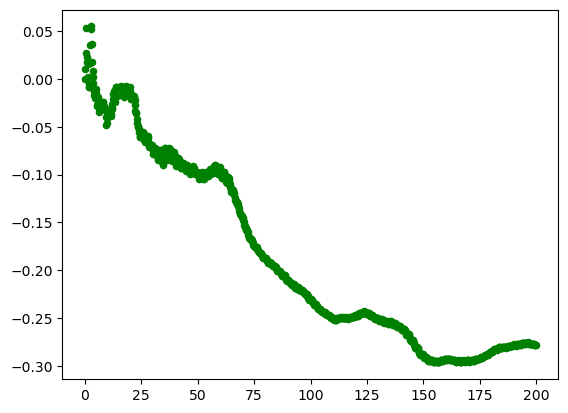

 opened file  ./msd-positive/coor_gfp/coor_14ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


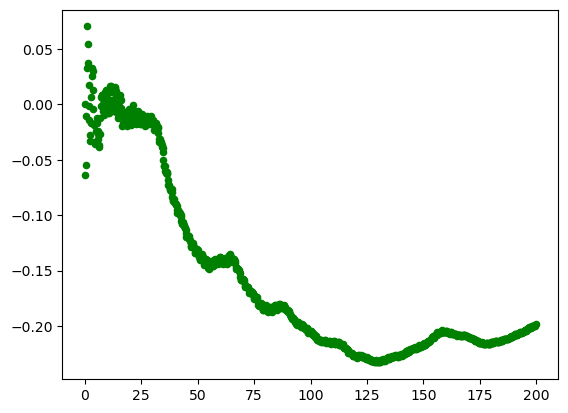

 opened file  ./msd-positive/coor_gfp/coor_15ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


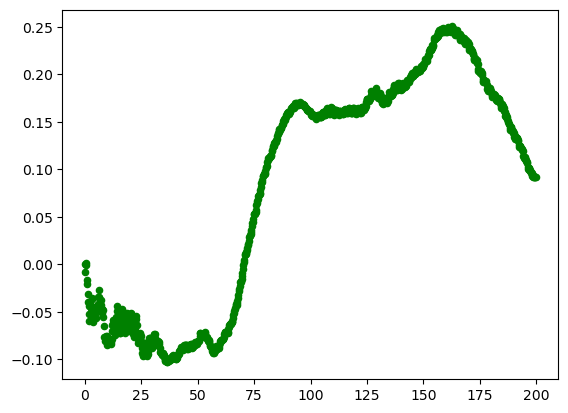

 opened file  ./msd-positive/coor_gfp/coor_16ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


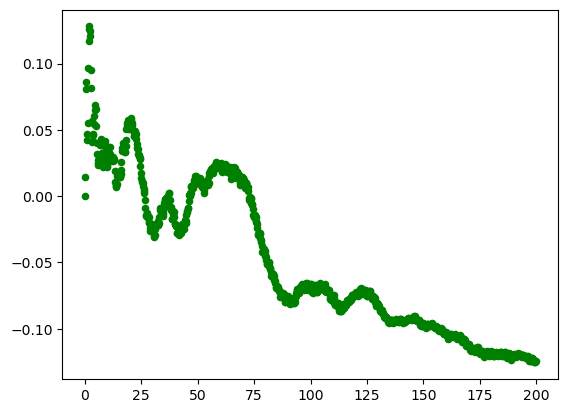

 opened file  ./msd-positive/coor_gfp/coor_17ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


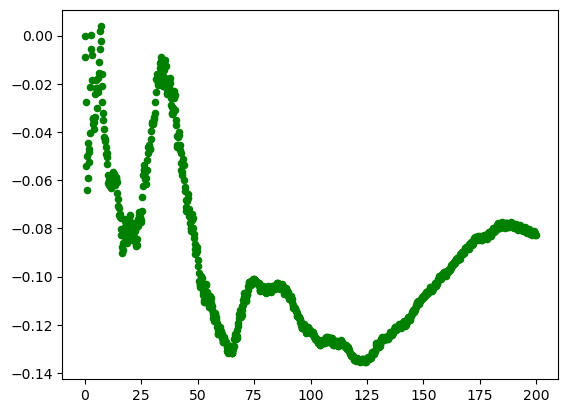

 opened file  ./msd-positive/coor_gfp/coor_18ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


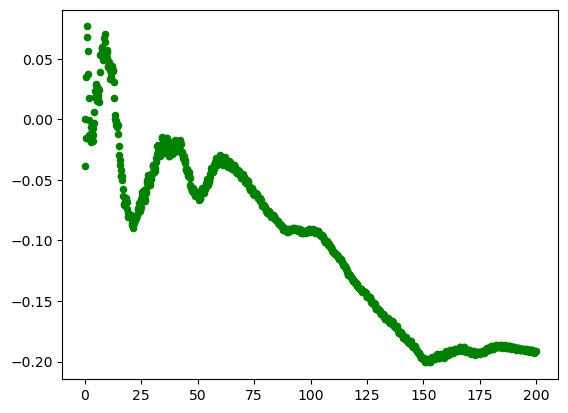

 opened file  ./msd-positive/coor_gfp/coor_19ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


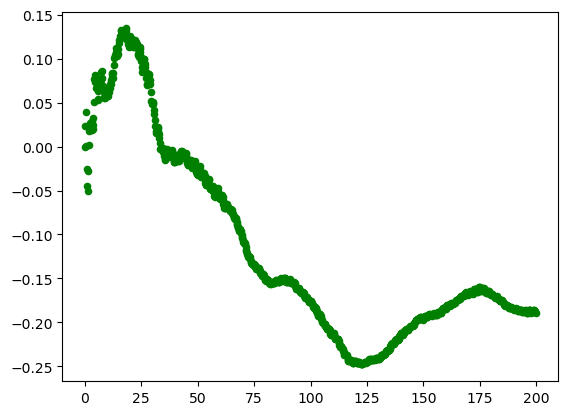

 opened file  ./msd-positive/coor_gfp/coor_20ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


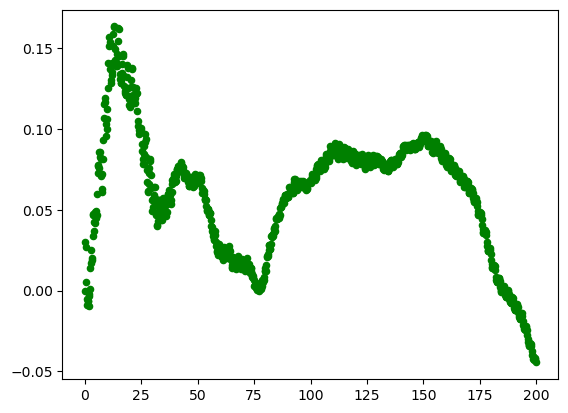

 opened file  ./msd-positive/coor_gfp/coor_21ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


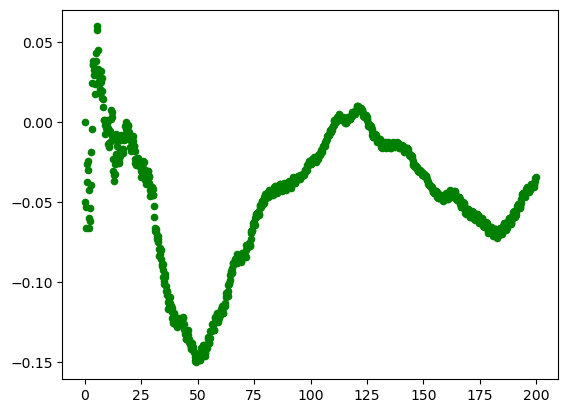

 opened file  ./msd-positive/coor_gfp/coor_22ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


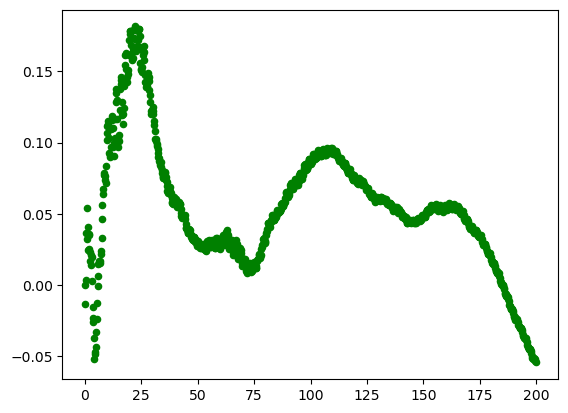

 opened file  ./msd-positive/coor_gfp/coor_23ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


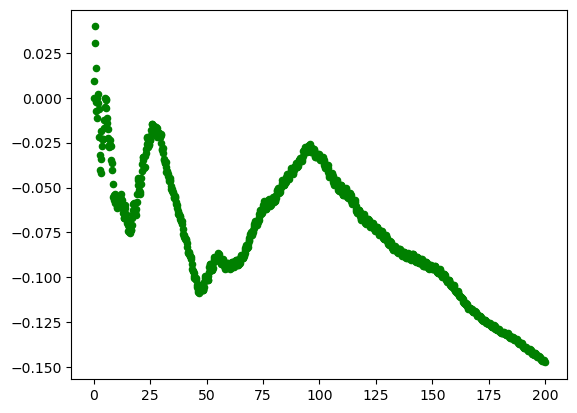

 opened file  ./msd-positive/coor_gfp/coor_24ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


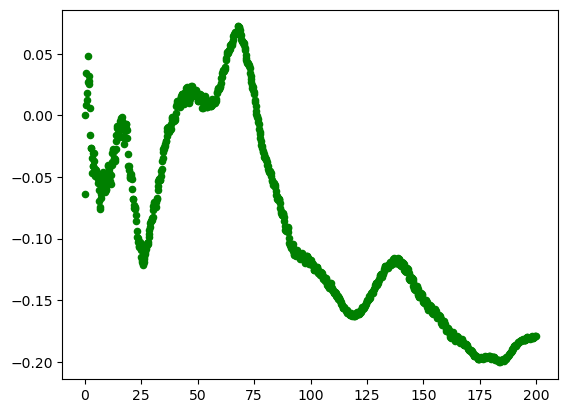

 opened file  ./msd-positive/coor_gfp/coor_25ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


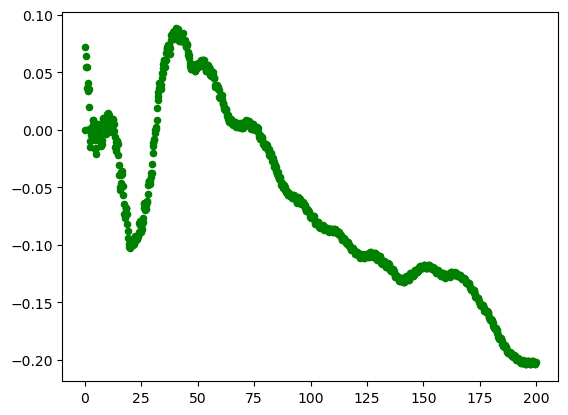

 opened file  ./msd-positive/coor_gfp/coor_26ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


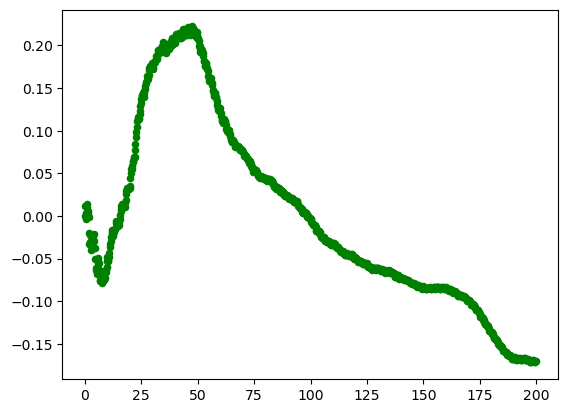

 opened file  ./msd-positive/coor_gfp/coor_27ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


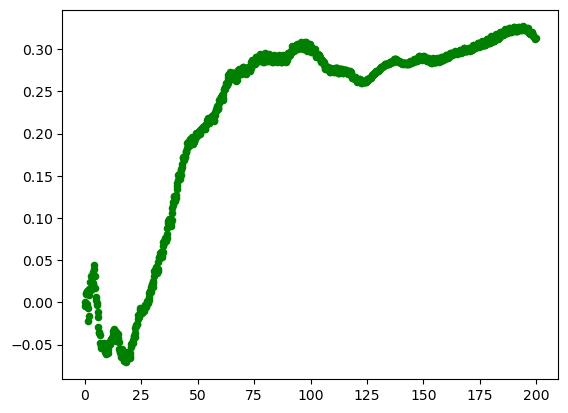

 opened file  ./msd-positive/coor_gfp/coor_28ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


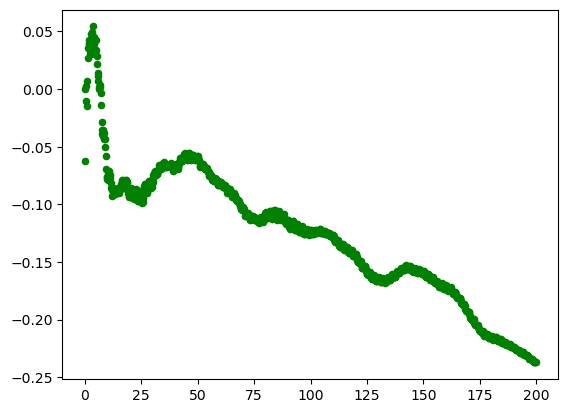

 opened file  ./msd-positive/coor_gfp/coor_29ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


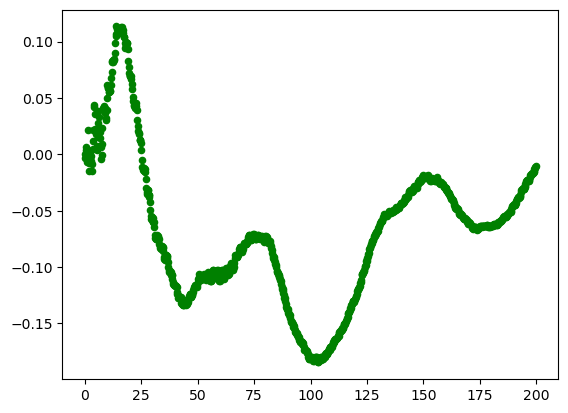

 opened file  ./msd-positive/coor_gfp/coor_30ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


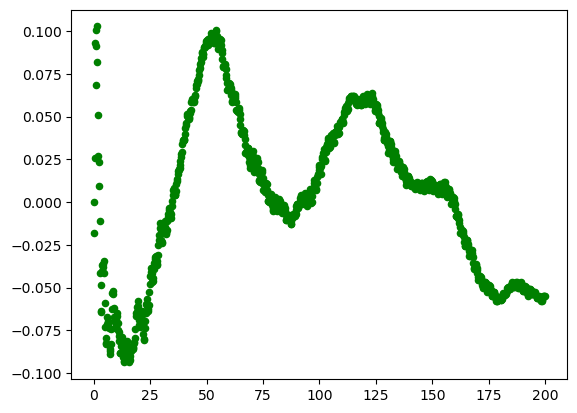

 number of trajectories  30


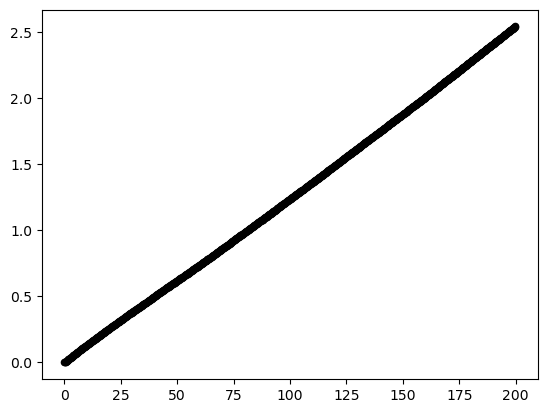

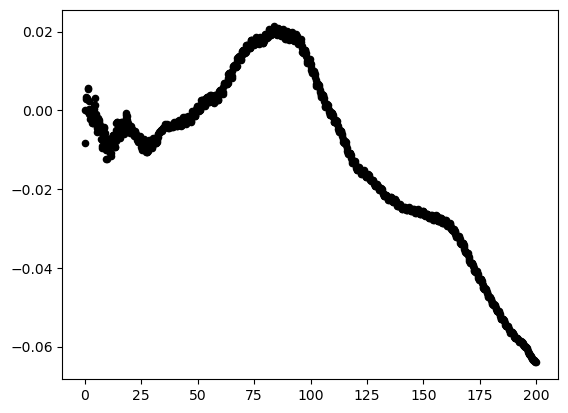

In [15]:
nstart=1
nsend=30
ps=1000
file=readfile(nstart,ps)
print(' opened file ',file)
traj=np.loadtxt(file)
ns=len(traj)

print('number of lines ns = ',ns)
print('    beginning of file ')

print(traj[1])

# parameters for MSD calculations
# length is the number of steps in MSD
# steps is the number of averagings
# skip is the number of steps skipped in averaging

timestep=0.2
length=1000
steps=ns-length
skip=10

print('   length of MSD        ',length)
print('   saving time          ',timestep)
print('   number of averagings ',steps)
print('   skip                 ',skip)

# MSD calculates the array of displacements from the position specified by j

def msd(array,j,length):
    c1=np.zeros((length,3))
    i=0
    while i< length:
            c1[i]=np.array([[i*timestep,np.dot(array[j+i]-array[j],array[j+i]-array[j]),np.dot(array[j+i]-array[j],array[j+i]-array[j])**2]])
            i+=1
    return c1  

# Repeated calculations of the MSD with the step=skip and average over the 
#  steps/skip steps


def average(array,length,steps,skip):
    c2=np.zeros((length,3))
    j=0
    num=0
    while j < steps:
        c2+=msd(array,j,length)
        j+=skip
        num+=1
    print(' number of averagings ',num)
    return c2/num



r2=np.zeros((length,3))
r2=average(traj,length,steps,skip)


plt.scatter(r2[:,0],r2[:,1],s=20,c='r') 
plt.show()

alpha=np.zeros((length,2))
i=1
while i < length:
    alpha[i]=np.array([r2[i,0],3*r2[i,2]/5/r2[i,1]**2-1])
    i+=1

plt.scatter(alpha[:,0],alpha[:,1],s=20,c='r') 
plt.show()


r2av=r2
alphaav=alpha
i=nstart+1
nav=1
while i <= nsend:
    file=readfile(i,ps)
    print(' opened file ',file)
    traj=np.loadtxt(file)
    ns=len(traj)
    print('number of lines ns = ',ns)
    r2=average(traj,length,steps,skip)
    r2av+=r2
    nav+=1
    alpha=np.zeros((length,2))
    j=1
    while j < length:
        alpha[j]=np.array([r2[j,0],3*r2[j,2]/5/r2[j,1]**2-1])
        j+=1
        
    alphaav+=alpha
    plt.scatter(alpha[:,0],alpha[:,1],s=20,c='green') 
    plt.show()
    i+=1
    
print(' number of trajectories ',nav)    
r2av=r2av/nav
alphaav=alphaav/nav

datafile='r2GFPqp35.dat'
cfile=os.path.join(path, datafile)
np.savetxt(cfile,r2av) 

datafile='alphaGFPqp35.dat'
cfile=os.path.join(path, datafile)
np.savetxt(cfile,alphaav) 

outfile='r2GFPqp35.pdf'
plotfile=os.path.join(path, outfile) 
plt.scatter(r2av[:,0],r2av[:,1],s=20,c='black') 
plt.savefig(plotfile,dpi=150,format='pdf') 
plt.show()

outfile='alphaGFPqp35.pdf'
plotfile=os.path.join(path, outfile) 
plt.scatter(alphaav[:,0],alphaav[:,1],s=20,c='black') 
plt.savefig(plotfile,dpi=150,format='pdf') 
plt.show()

D:: 0.0021075135440305


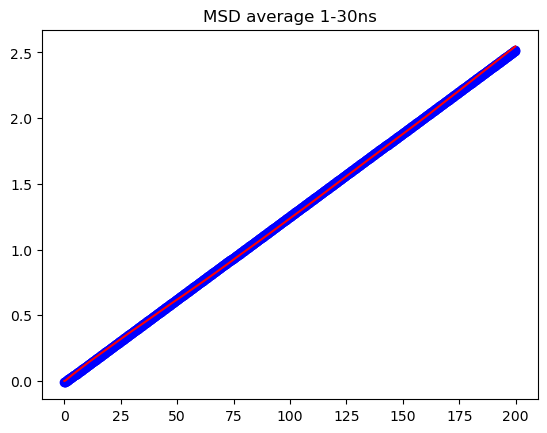

In [16]:
#############################################################
from scipy.stats import linregress
linear_model = linregress(r2av[:,0],r2av[:,1])
slope = linear_model.slope
error = linear_model.stderr
# dim_fac is 3 as we computed a 3D msd with 'xyz'
D = slope * 1/(2*3)
print("D::",D)
plt.title('MSD average 1-30ns')
plt.plot(r2av[:,0],linF(linear_model.intercept,slope,r2av[:,0]),'ob')
plt.plot(r2av[:,0],r2av[:,1],'r')
plt.show()
################################################
#ns= np.arange(1,10000,4)/1000

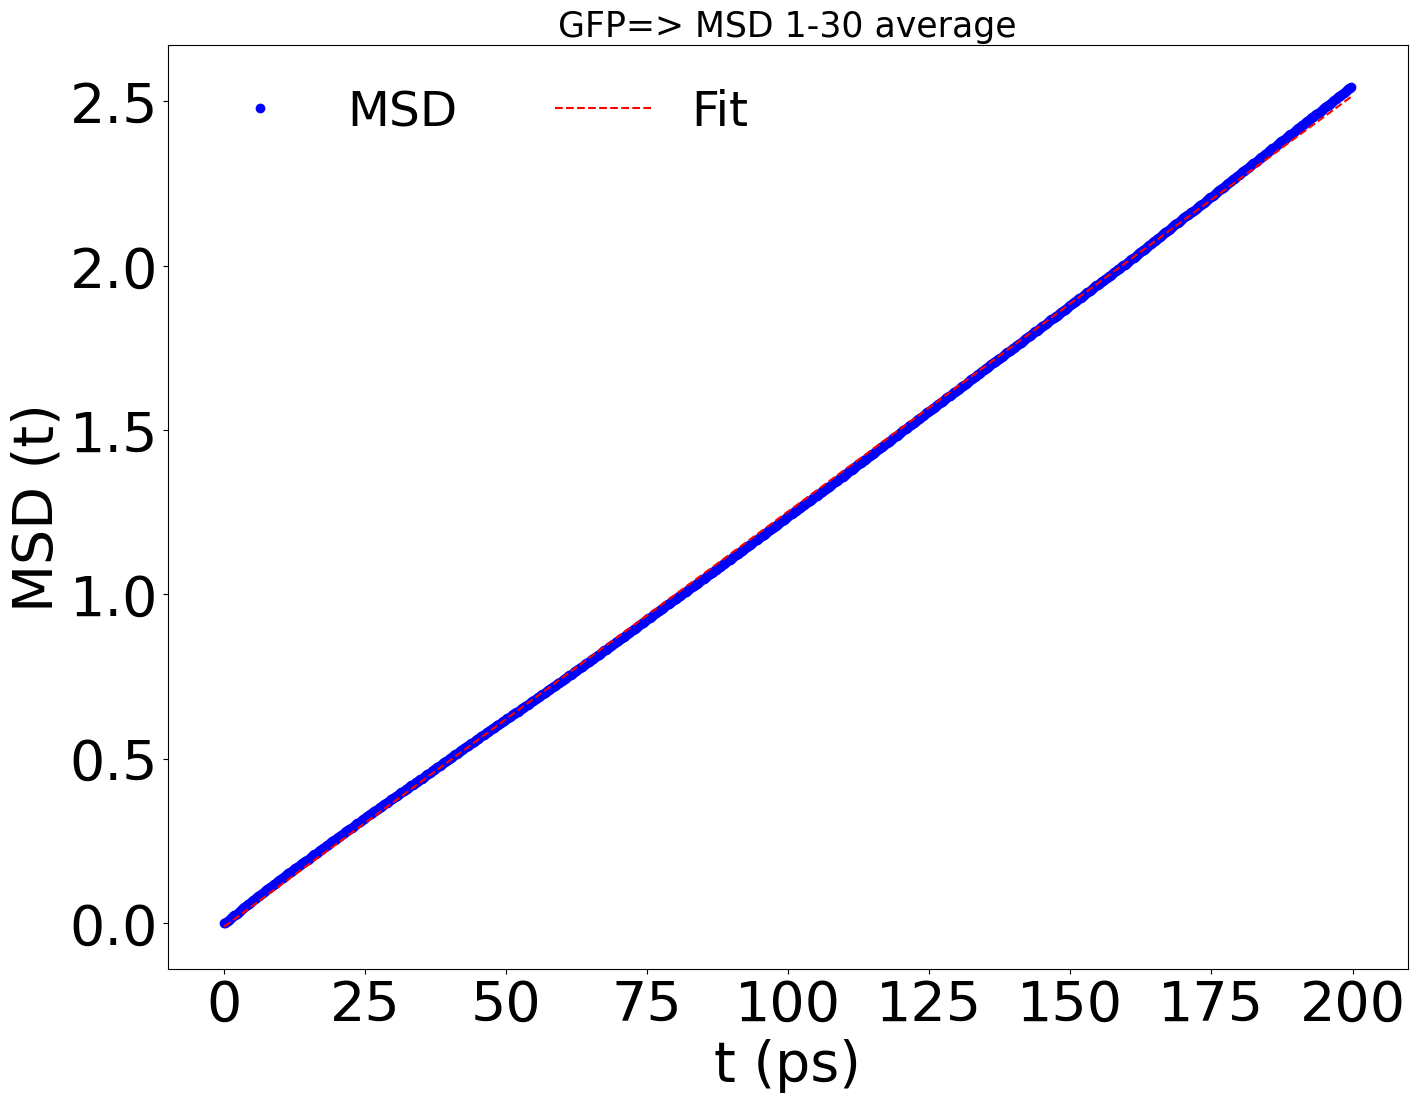

In [17]:
plt.figure(figsize=(16,12))
plt.plot(r2av[:,0],r2av[:,1],'ob',label='MSD')
plt.plot(r2av[:,0],linF(linear_model.intercept,slope,r2av[:,0]),'--r',label='Fit')
#########################################################################
plt.xlabel("t (ps)",fontsize=40)
plt.ylabel(r"MSD (t)",fontsize=40)
plt.title("GFP=> MSD 1-30 average",fontsize=25)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
#plt.title('MSD 1-20 average',fontsize=30)
plt.legend(loc=0,fontsize=35,ncol=2, frameon=False)
plt.savefig("/Users/smostaj1/Documents/GFP/Latex-file/plot/MSD_GFP1-30qp35.pdf", dpi=1000 )
plt.savefig("/Users/smostaj1/Documents/GFP/Latex-file/plot/MSD_GFP1-30qp35.eps", dpi=1000 ,format='eps') 

# GFP q=10

In [235]:
path=os.path.dirname('/Users/smostaj1/Documents/GFP/msd-gfp/msd-10/')

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-10/coor_gfp/coor_1ns_1000ps.dat
number of lines ns =  5000
    beginning of file 
[ 7.23128   1.959019 -4.364275]
   length of MSD         1000
   saving time           0.2
   number of averagings  4000
   skip                  10
 number of averagings  400


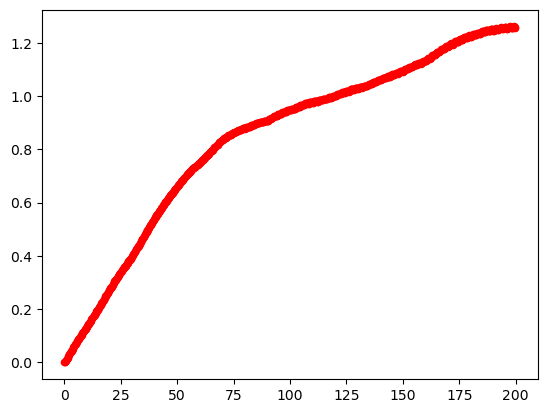

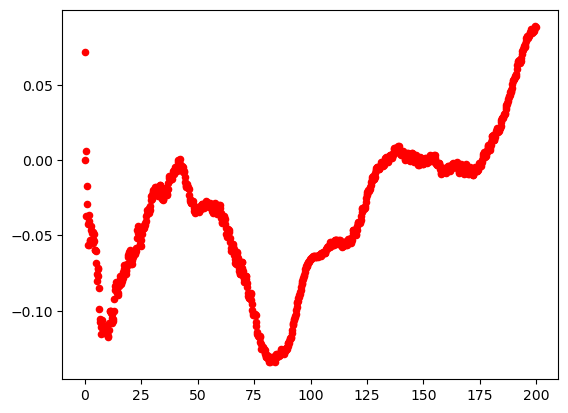

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-10/coor_gfp/coor_2ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


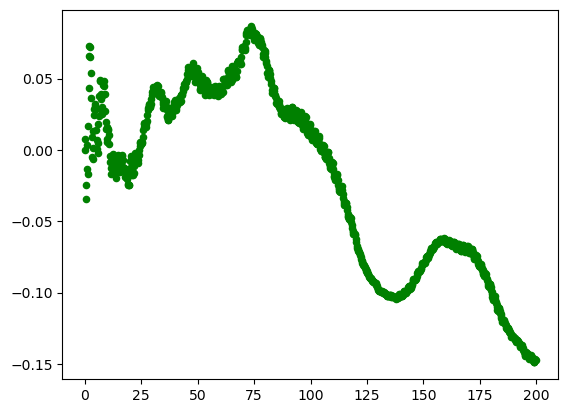

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-10/coor_gfp/coor_3ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


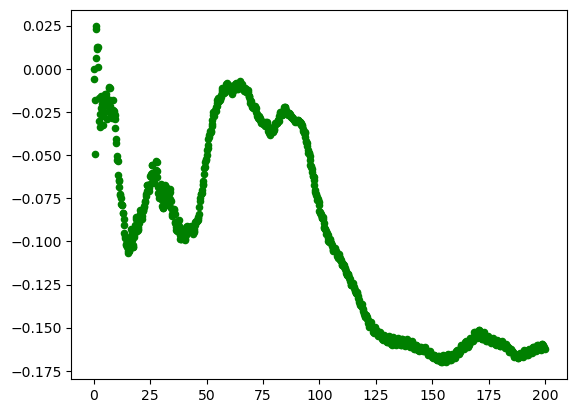

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-10/coor_gfp/coor_4ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


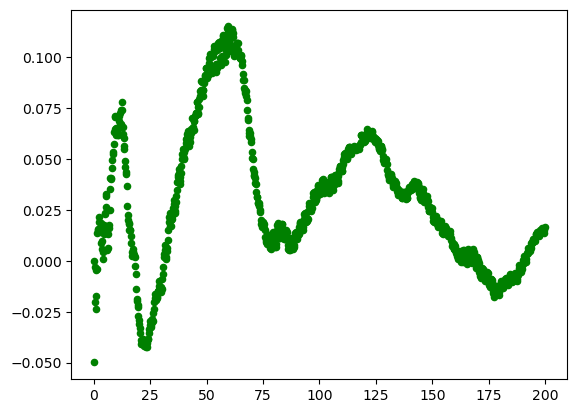

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-10/coor_gfp/coor_5ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


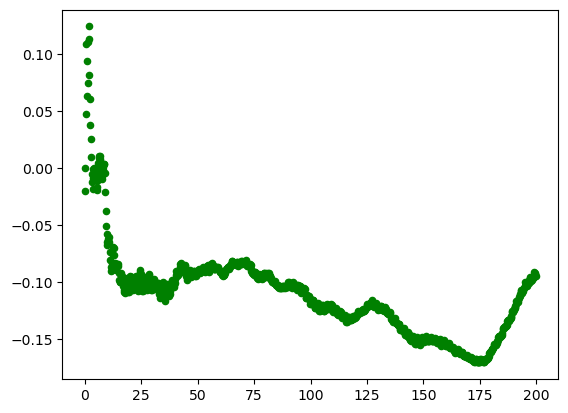

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-10/coor_gfp/coor_6ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


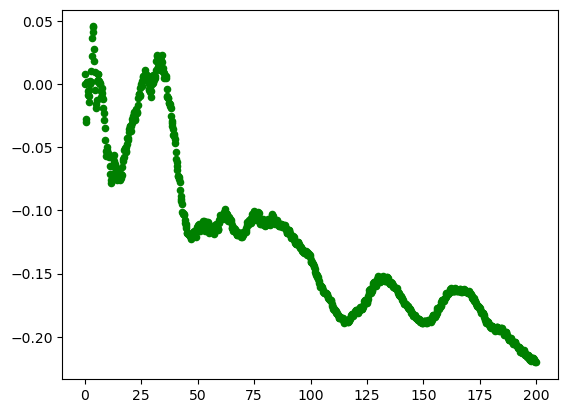

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-10/coor_gfp/coor_7ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


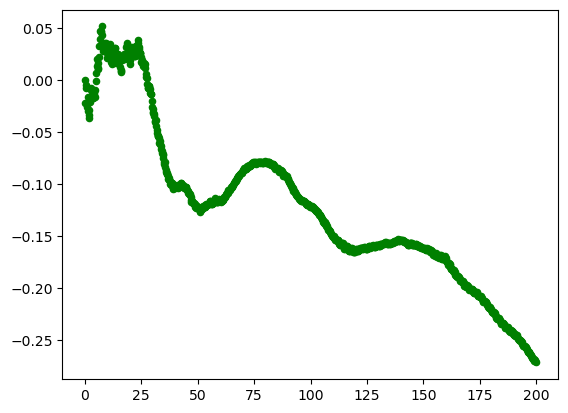

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-10/coor_gfp/coor_8ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


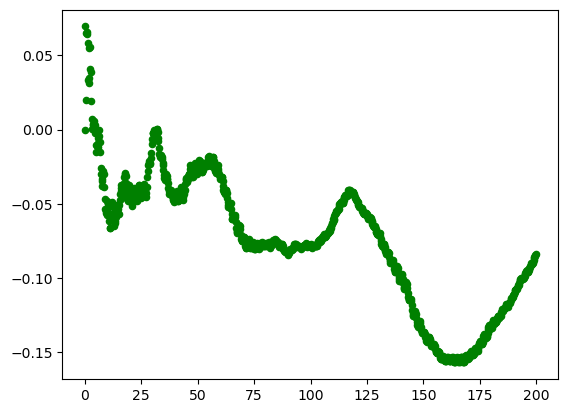

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-10/coor_gfp/coor_9ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


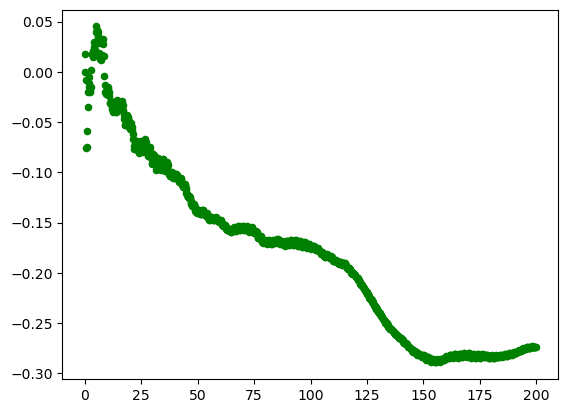

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-10/coor_gfp/coor_10ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


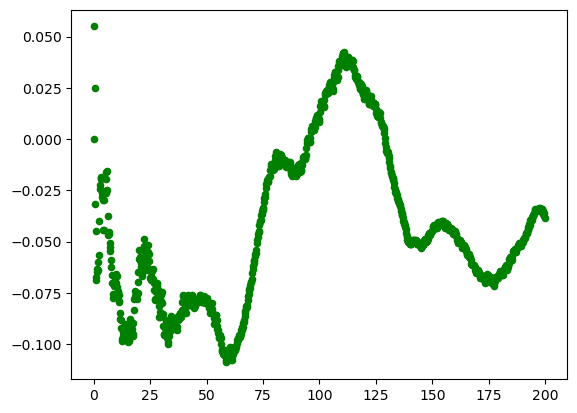

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-10/coor_gfp/coor_11ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


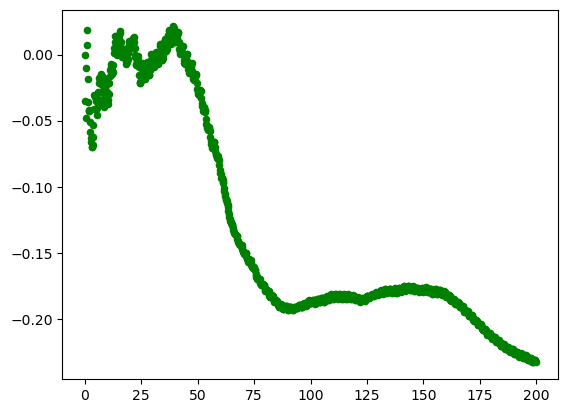

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-10/coor_gfp/coor_12ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


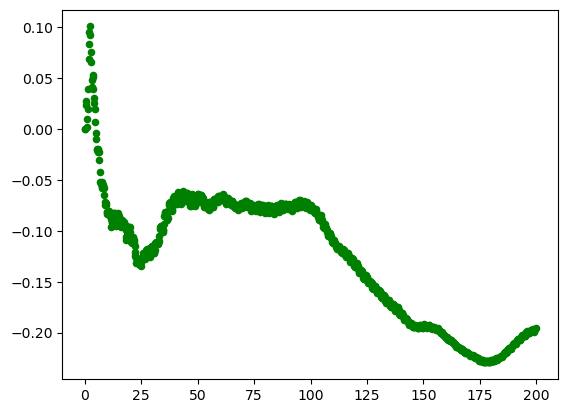

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-10/coor_gfp/coor_13ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


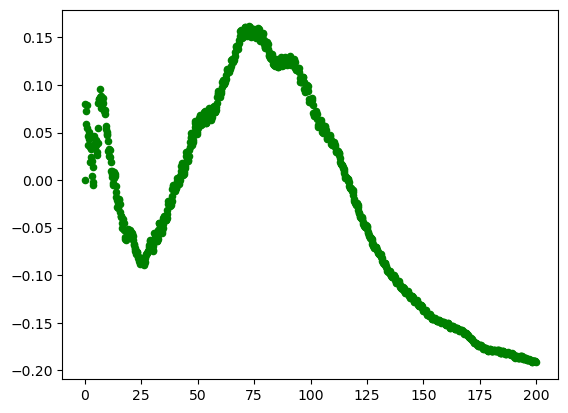

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-10/coor_gfp/coor_14ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


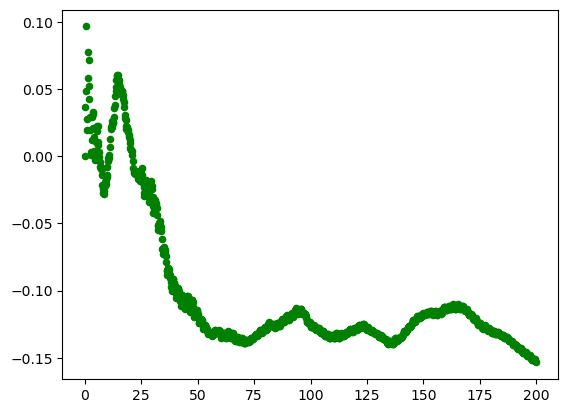

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-10/coor_gfp/coor_15ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


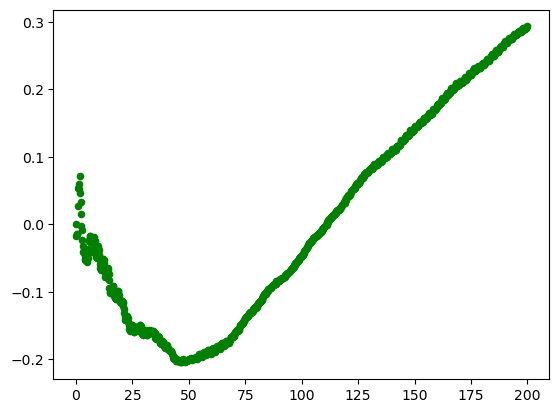

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-10/coor_gfp/coor_16ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


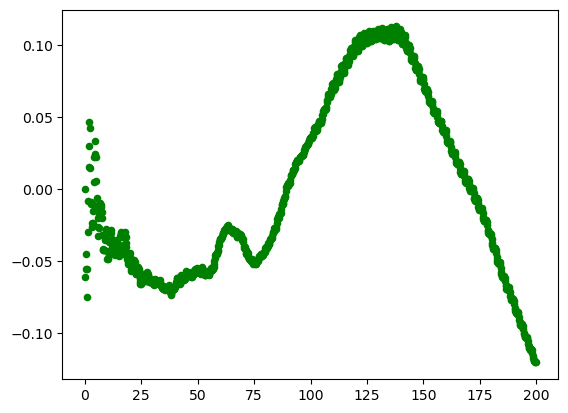

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-10/coor_gfp/coor_17ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


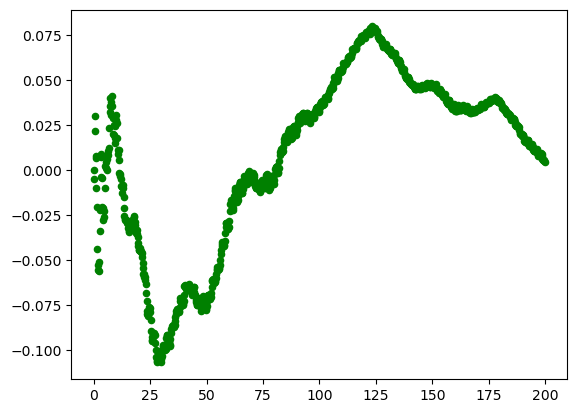

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-10/coor_gfp/coor_18ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


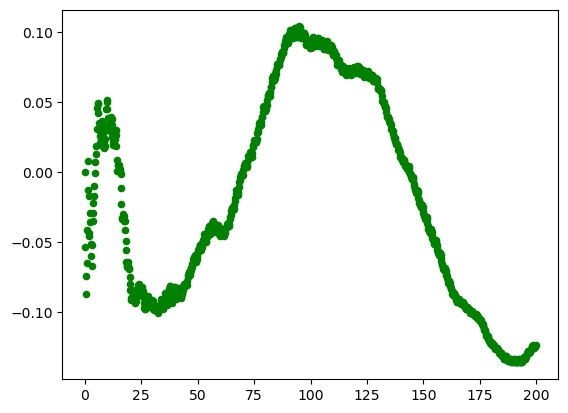

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-10/coor_gfp/coor_19ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


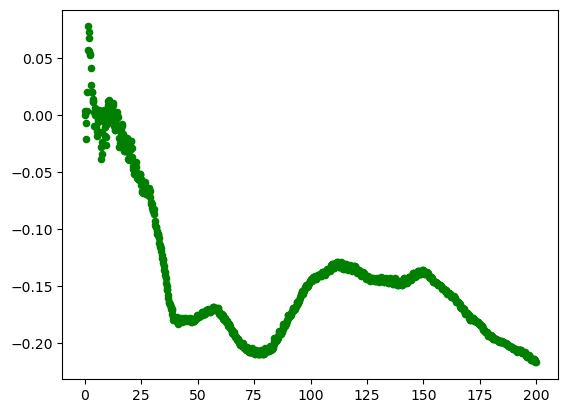

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-10/coor_gfp/coor_20ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


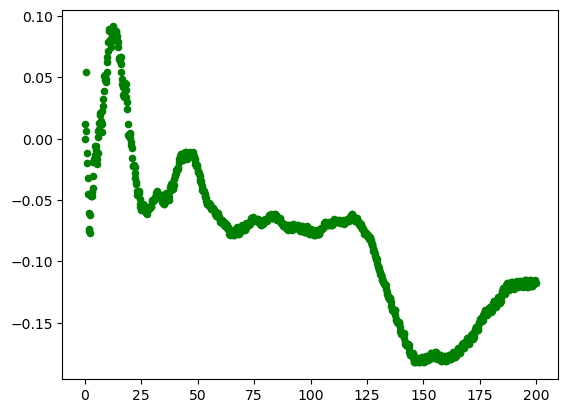

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-10/coor_gfp/coor_21ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


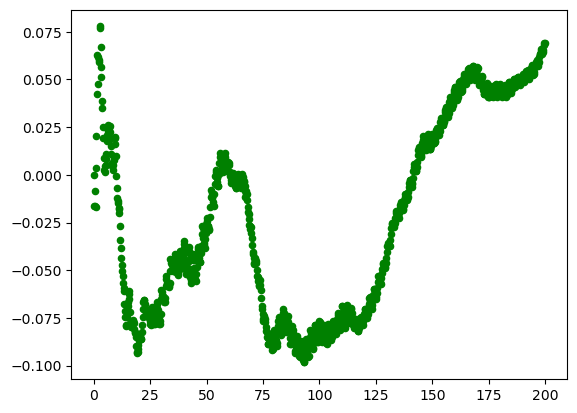

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-10/coor_gfp/coor_22ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


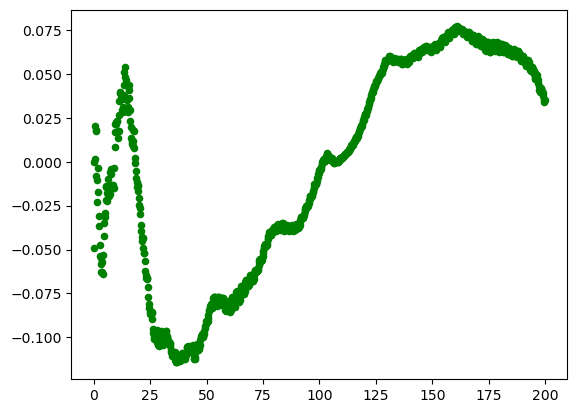

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-10/coor_gfp/coor_23ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


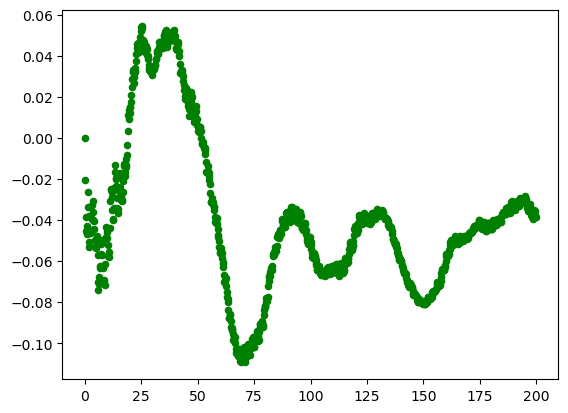

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-10/coor_gfp/coor_24ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


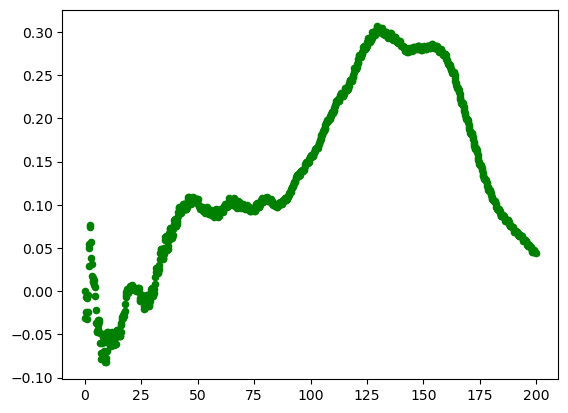

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-10/coor_gfp/coor_25ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


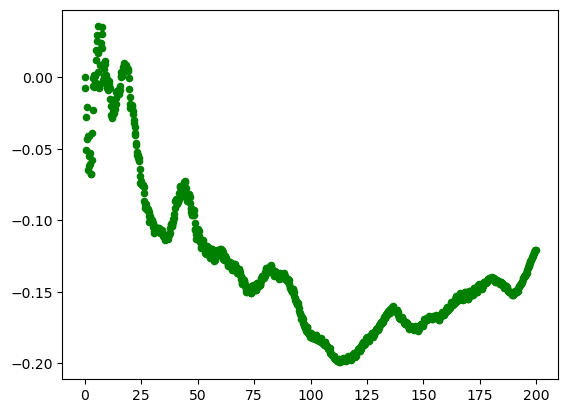

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-10/coor_gfp/coor_26ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


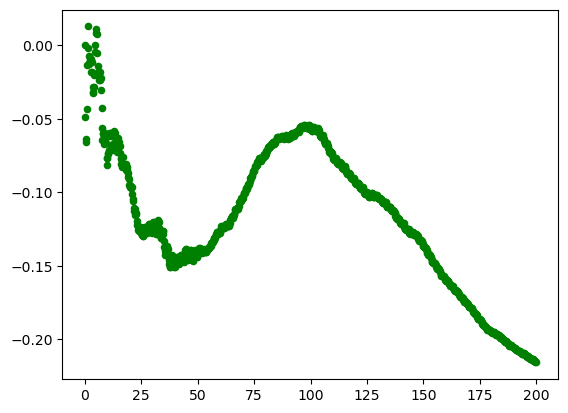

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-10/coor_gfp/coor_27ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


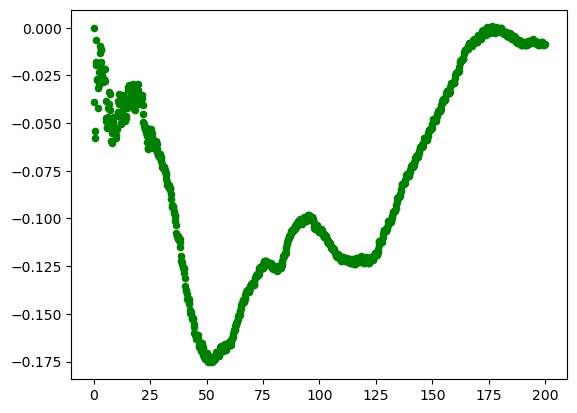

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-10/coor_gfp/coor_28ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


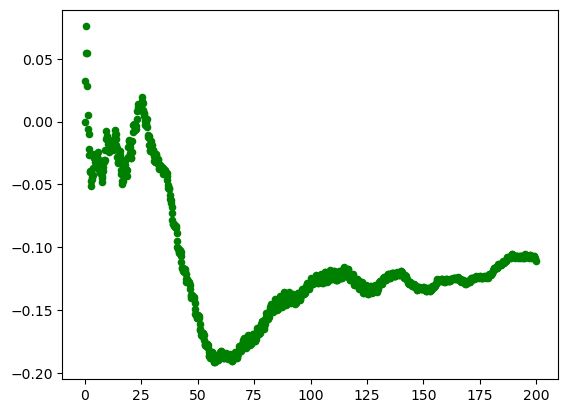

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-10/coor_gfp/coor_29ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


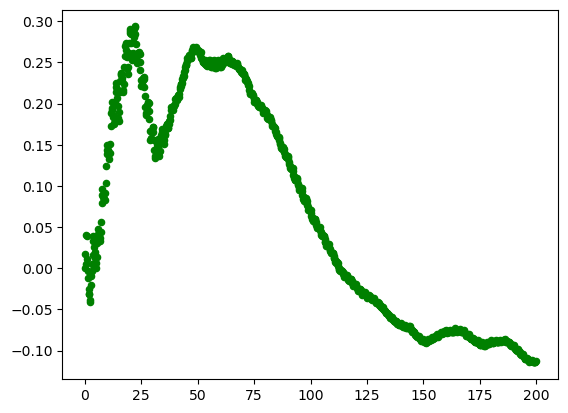

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-10/coor_gfp/coor_30ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


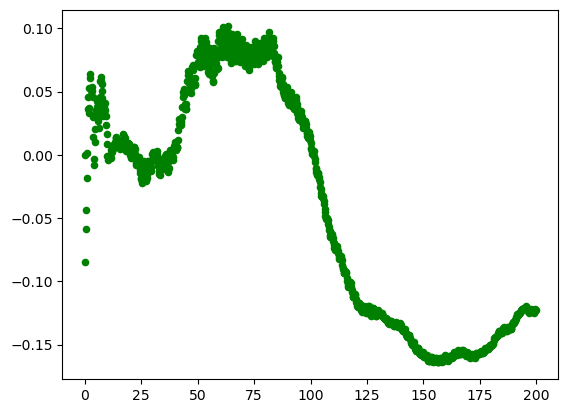

 number of trajectories  30


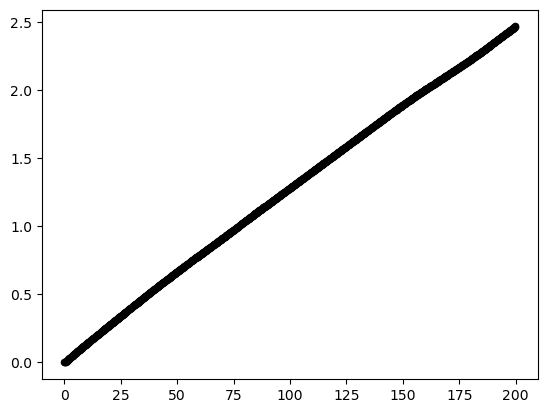

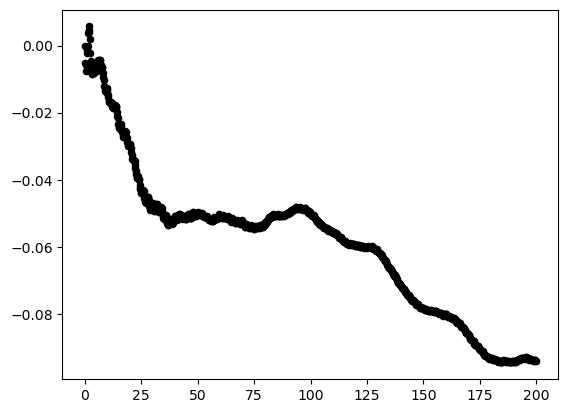

In [236]:
nstart=1
nsend=30
ps=1000
file=readfile(nstart,ps)
print(' opened file ',file)
traj=np.loadtxt(file)
ns=len(traj)

print('number of lines ns = ',ns)
print('    beginning of file ')

print(traj[1])

# parameters for MSD calculations
# length is the number of steps in MSD
# steps is the number of averagings
# skip is the number of steps skipped in averaging

timestep=0.2
length=1000
steps=ns-length
skip=10

print('   length of MSD        ',length)
print('   saving time          ',timestep)
print('   number of averagings ',steps)
print('   skip                 ',skip)

# MSD calculates the array of displacements from the position specified by j

def msd(array,j,length):
    c1=np.zeros((length,3))
    i=0
    while i< length:
            c1[i]=np.array([[i*timestep,np.dot(array[j+i]-array[j],array[j+i]-array[j]),np.dot(array[j+i]-array[j],array[j+i]-array[j])**2]])
            i+=1
    return c1  

# Repeated calculations of the MSD with the step=skip and average over the 
#  steps/skip steps


def average(array,length,steps,skip):
    c2=np.zeros((length,3))
    j=0
    num=0
    while j < steps:
        c2+=msd(array,j,length)
        j+=skip
        num+=1
    print(' number of averagings ',num)
    return c2/num



r2=np.zeros((length,3))
r2=average(traj,length,steps,skip)


plt.scatter(r2[:,0],r2[:,1],s=20,c='r') 
plt.show()

alpha=np.zeros((length,2))
i=1
while i < length:
    alpha[i]=np.array([r2[i,0],3*r2[i,2]/5/r2[i,1]**2-1])
    i+=1

plt.scatter(alpha[:,0],alpha[:,1],s=20,c='r') 
plt.show()


r2av=r2
alphaav=alpha
i=nstart+1
nav=1
while i <= nsend:
    file=readfile(i,ps)
    print(' opened file ',file)
    traj=np.loadtxt(file)
    ns=len(traj)
    print('number of lines ns = ',ns)
    r2=average(traj,length,steps,skip)
    r2av+=r2
    nav+=1
    alpha=np.zeros((length,2))
    j=1
    while j < length:
        alpha[j]=np.array([r2[j,0],3*r2[j,2]/5/r2[j,1]**2-1])
        j+=1
        
    alphaav+=alpha
    plt.scatter(alpha[:,0],alpha[:,1],s=20,c='green') 
    plt.show()
    i+=1
    
print(' number of trajectories ',nav)    
r2av=r2av/nav
alphaav=alphaav/nav

datafile='r2GFPqp10.dat'
cfile=os.path.join(path, datafile)
np.savetxt(cfile,r2av) 

datafile='alphaGFPqp10.dat'
cfile=os.path.join(path, datafile)
np.savetxt(cfile,alphaav) 

outfile='r2GFPqp10.pdf'
plotfile=os.path.join(path, outfile) 
plt.scatter(r2av[:,0],r2av[:,1],s=20,c='black') 
plt.savefig(plotfile,dpi=150,format='pdf') 
plt.show()

outfile='alphaGFPqp10.pdf'
plotfile=os.path.join(path, outfile) 
plt.scatter(alphaav[:,0],alphaav[:,1],s=20,c='black') 
plt.savefig(plotfile,dpi=150,format='pdf') 
plt.show()

D:: 0.0020422942579879652


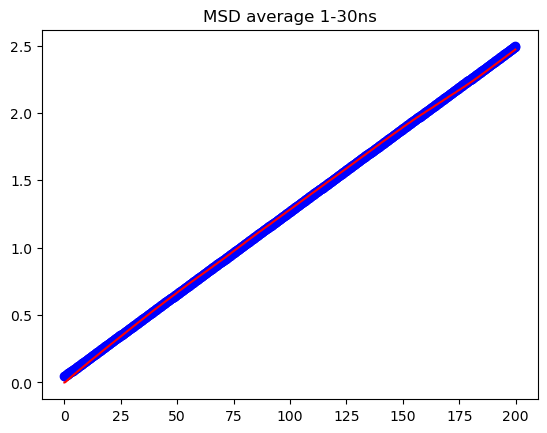

In [237]:
#############################################################
from scipy.stats import linregress
linear_model = linregress(r2av[:,0],r2av[:,1])
slope = linear_model.slope
error = linear_model.stderr
# dim_fac is 3 as we computed a 3D msd with 'xyz'
D = slope * 1/(2*3)
print("D::",D)
plt.title('MSD average 1-30ns')
plt.plot(r2av[:,0],linF(linear_model.intercept,slope,r2av[:,0]),'ob')
plt.plot(r2av[:,0],r2av[:,1],'r')
plt.show()
################################################
#ns= np.arange(1,10000,4)/1000

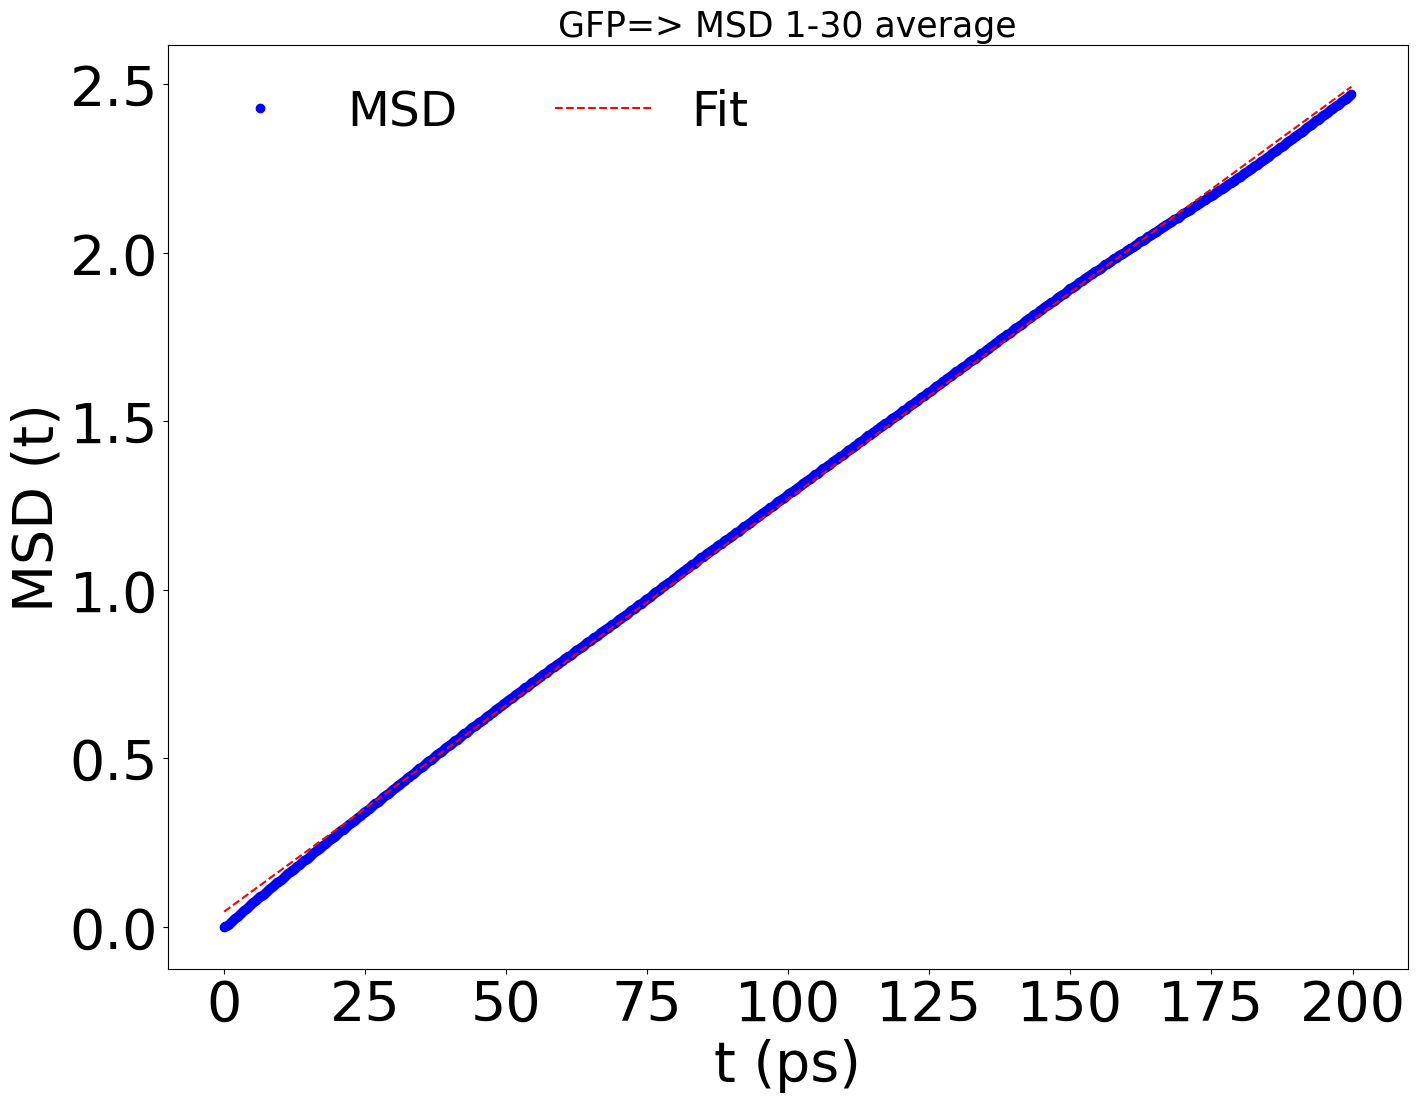

In [238]:
plt.figure(figsize=(16,12))
plt.plot(r2av[:,0],r2av[:,1],'ob',label='MSD')
plt.plot(r2av[:,0],linF(linear_model.intercept,slope,r2av[:,0]),'--r',label='Fit')
#########################################################################
plt.xlabel("t (ps)",fontsize=40)
plt.ylabel(r"MSD (t)",fontsize=40)
plt.title("GFP=> MSD 1-30 average",fontsize=25)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
#plt.title('MSD 1-20 average',fontsize=30)
plt.legend(loc=0,fontsize=35,ncol=2, frameon=False)
plt.savefig("/Users/smostaj1/Documents/GFP/Latex-setare/plot/MSD_GFP1-30qp10.pdf", dpi=1000 )
plt.savefig("/Users/smostaj1/Documents/GFP/Latex-setare/plot/MSD_GFP1-30qp10.eps", dpi=1000 ,format='eps') 

# GFP q=15

In [239]:
path=os.path.dirname('/Users/smostaj1/Documents/GFP/msd-gfp/msd-15/')

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-15/coor_gfp/coor_1ns_1000ps.dat
number of lines ns =  5000
    beginning of file 
[-0.13504  -8.387776  7.039043]
   length of MSD         1000
   saving time           0.2
   number of averagings  4000
   skip                  10
 number of averagings  400


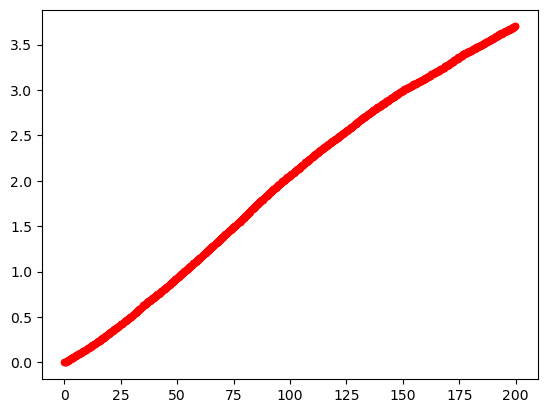

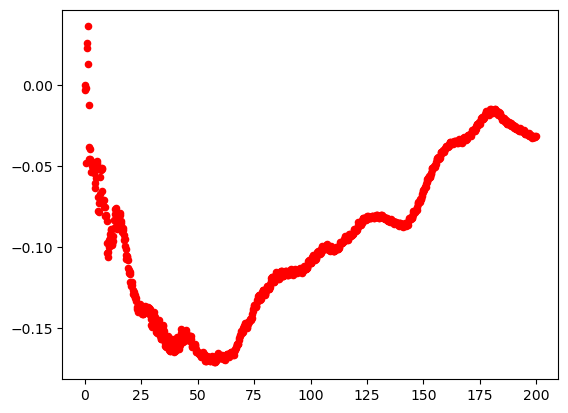

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-15/coor_gfp/coor_2ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


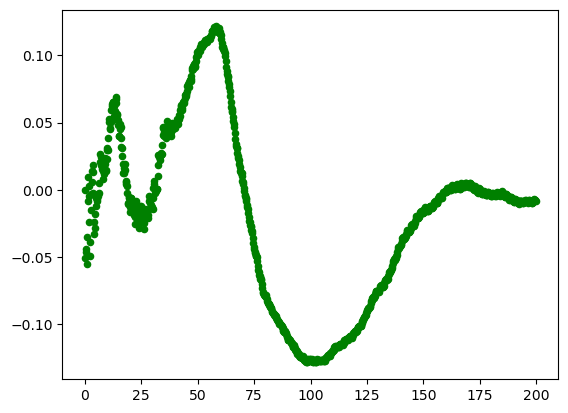

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-15/coor_gfp/coor_3ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


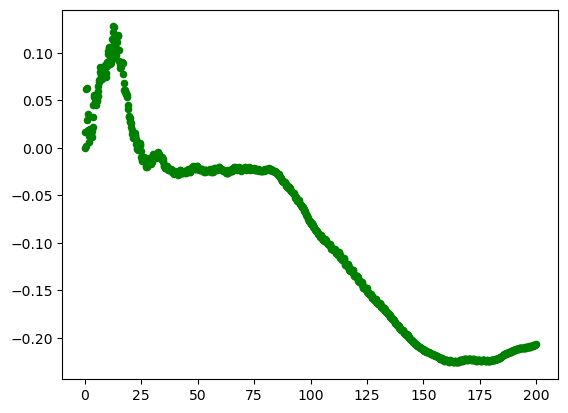

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-15/coor_gfp/coor_4ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


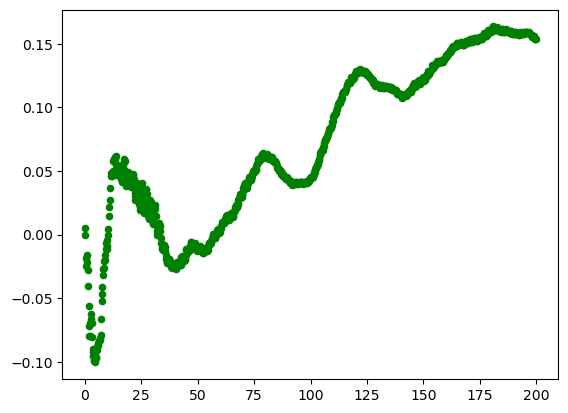

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-15/coor_gfp/coor_5ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


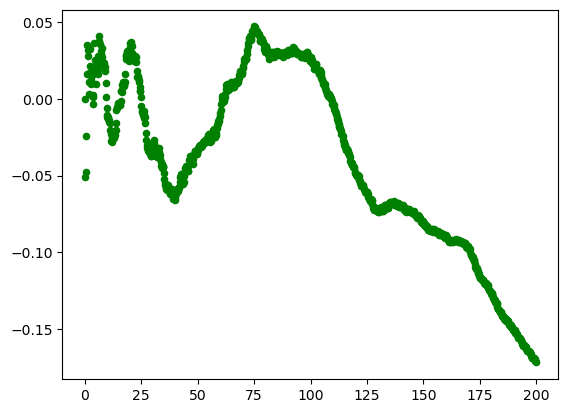

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-15/coor_gfp/coor_6ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


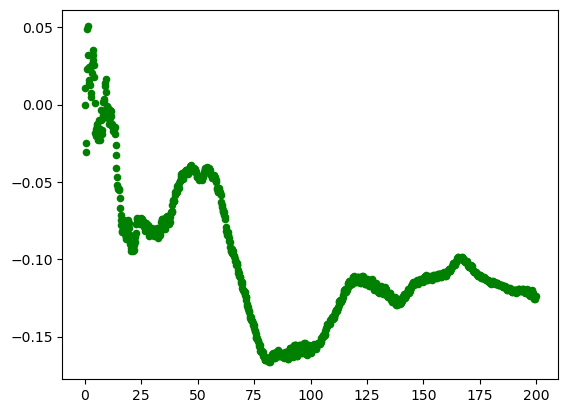

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-15/coor_gfp/coor_7ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


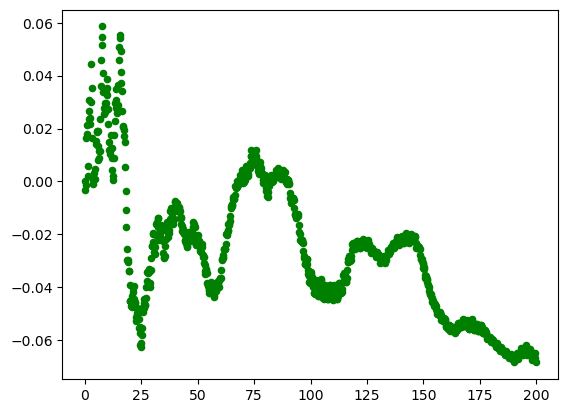

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-15/coor_gfp/coor_8ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


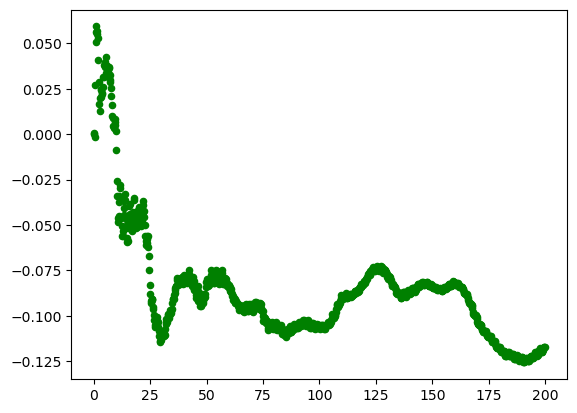

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-15/coor_gfp/coor_9ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


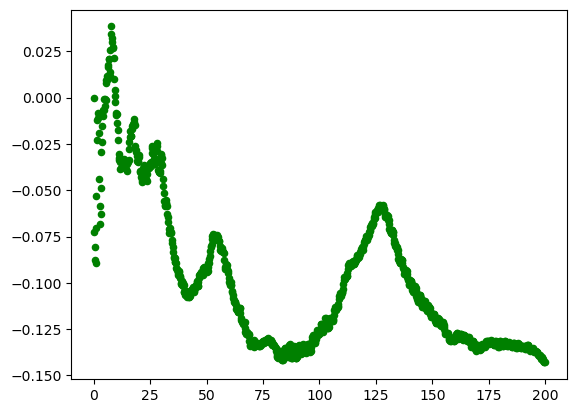

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-15/coor_gfp/coor_10ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


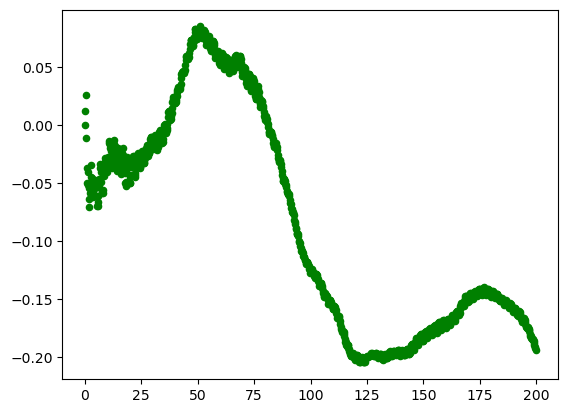

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-15/coor_gfp/coor_11ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


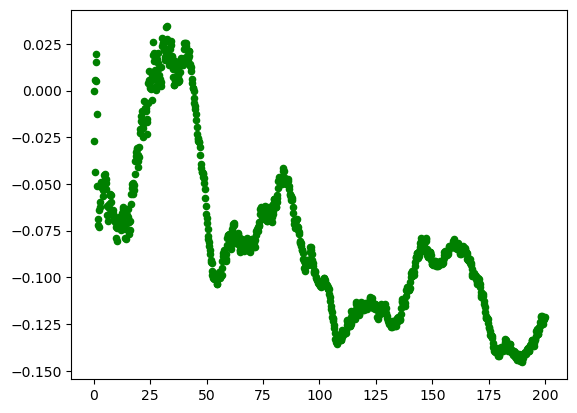

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-15/coor_gfp/coor_12ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


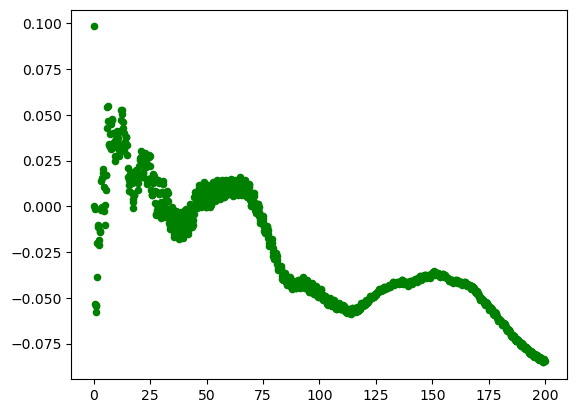

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-15/coor_gfp/coor_13ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


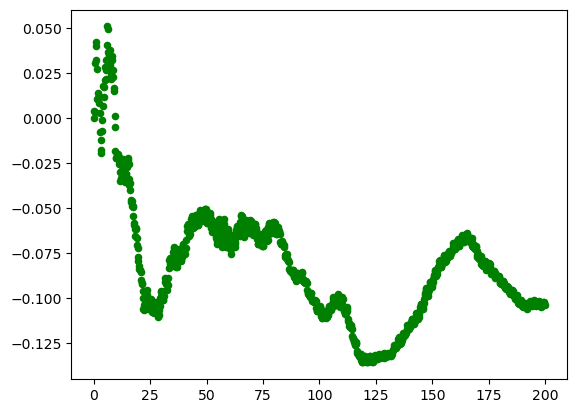

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-15/coor_gfp/coor_14ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


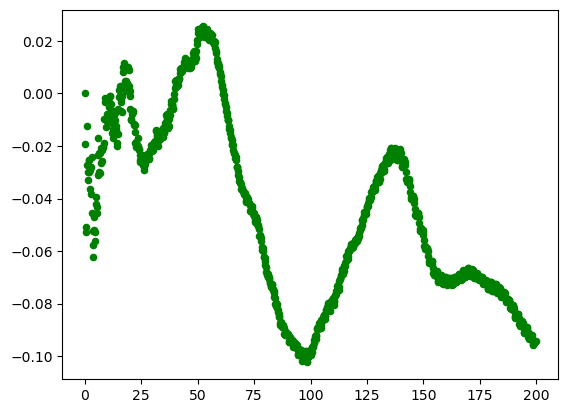

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-15/coor_gfp/coor_15ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


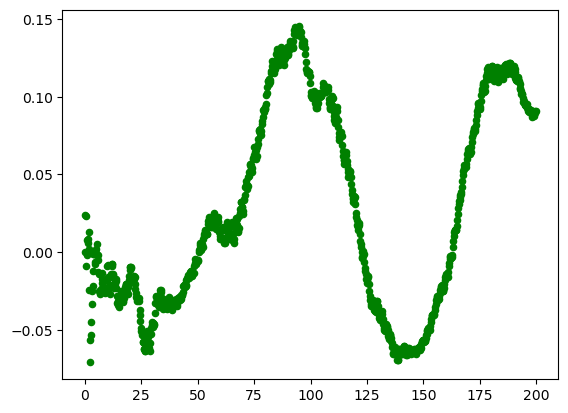

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-15/coor_gfp/coor_16ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


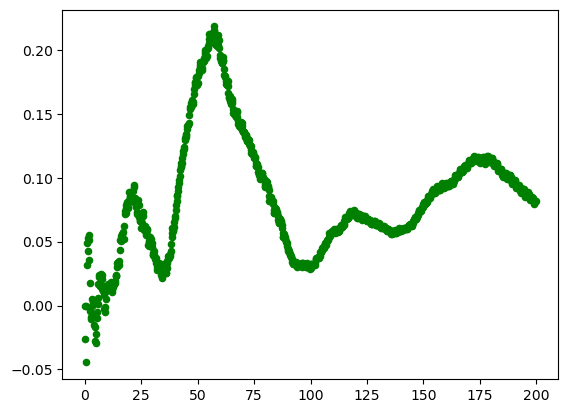

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-15/coor_gfp/coor_17ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


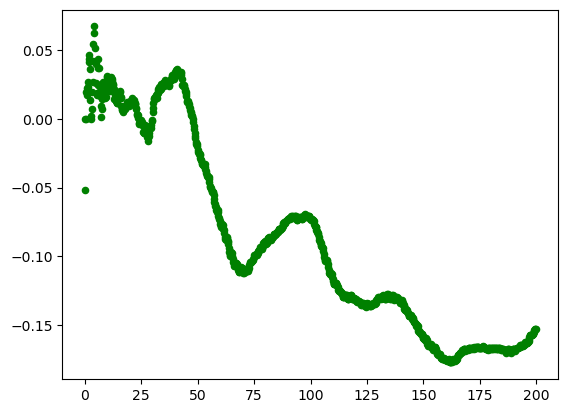

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-15/coor_gfp/coor_18ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


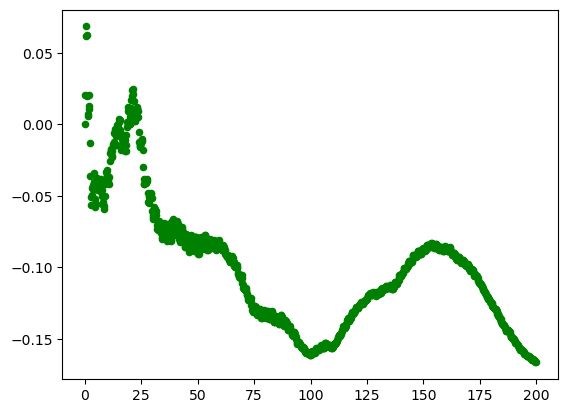

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-15/coor_gfp/coor_19ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


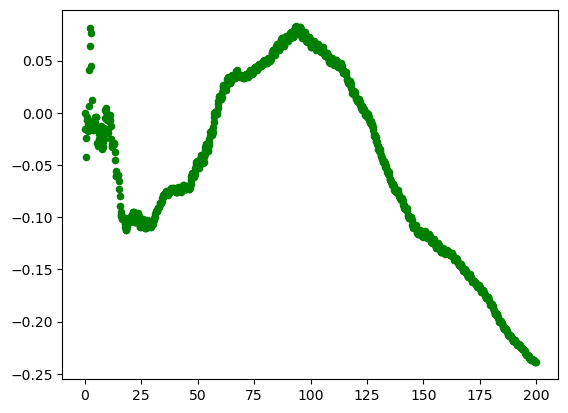

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-15/coor_gfp/coor_20ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


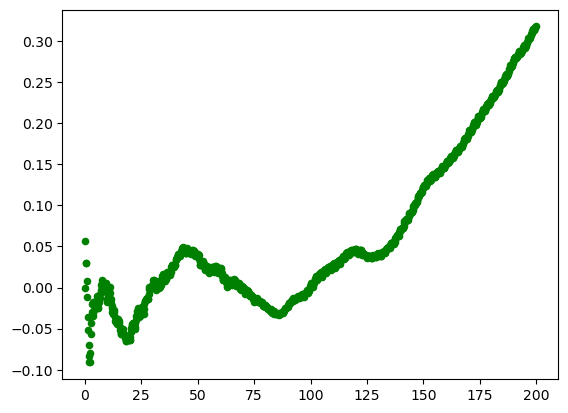

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-15/coor_gfp/coor_21ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


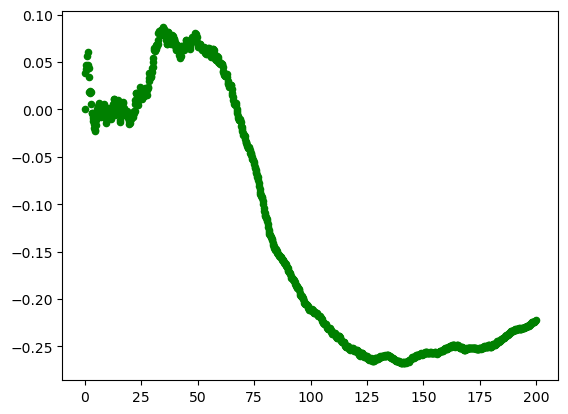

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-15/coor_gfp/coor_22ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


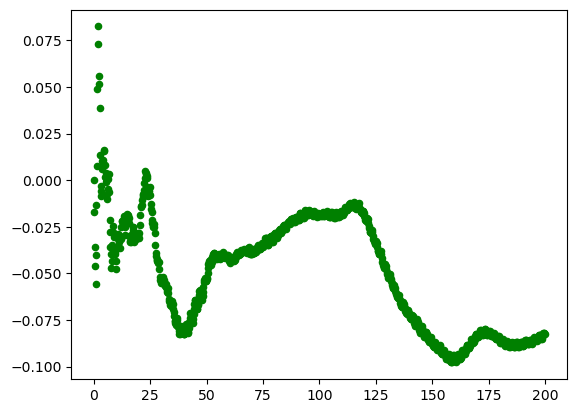

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-15/coor_gfp/coor_23ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


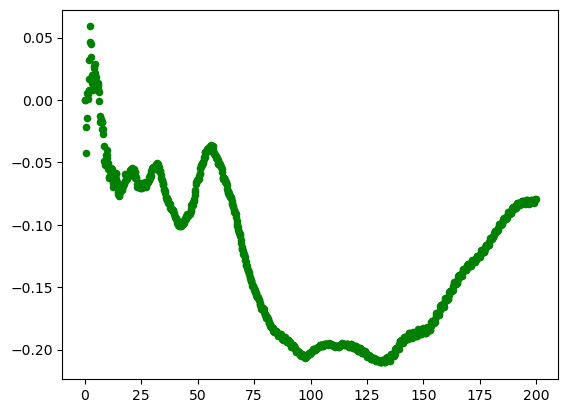

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-15/coor_gfp/coor_24ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


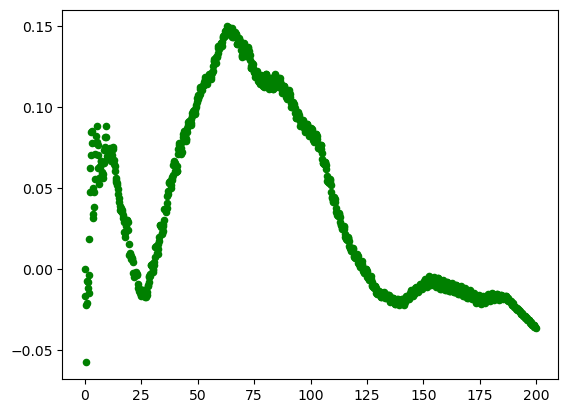

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-15/coor_gfp/coor_25ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


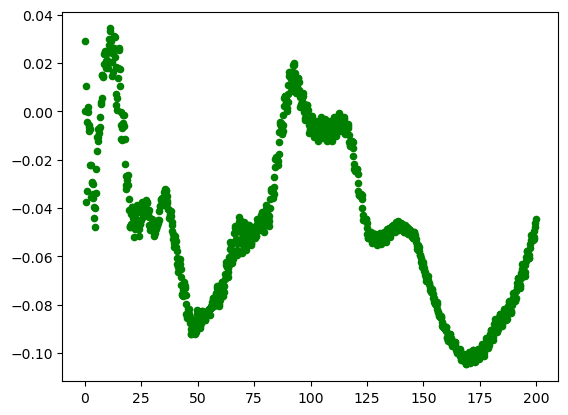

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-15/coor_gfp/coor_26ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


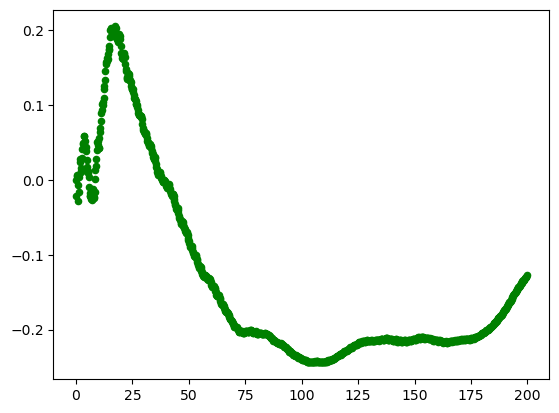

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-15/coor_gfp/coor_27ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


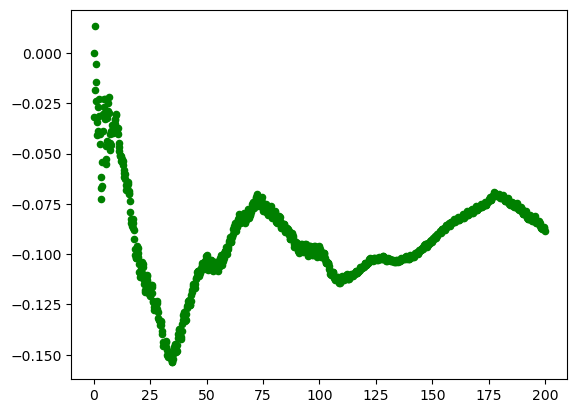

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-15/coor_gfp/coor_28ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


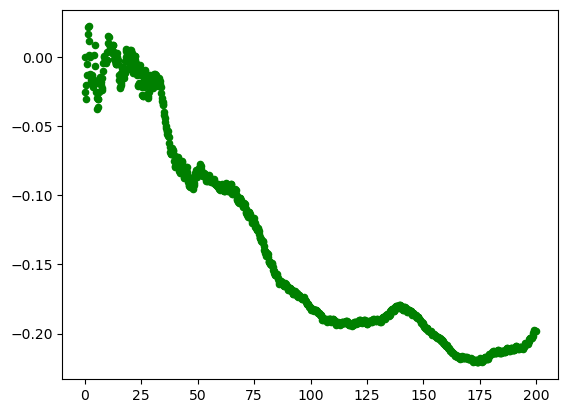

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-15/coor_gfp/coor_29ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


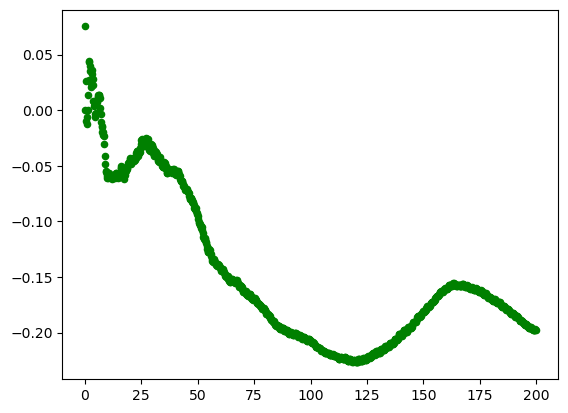

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-15/coor_gfp/coor_30ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


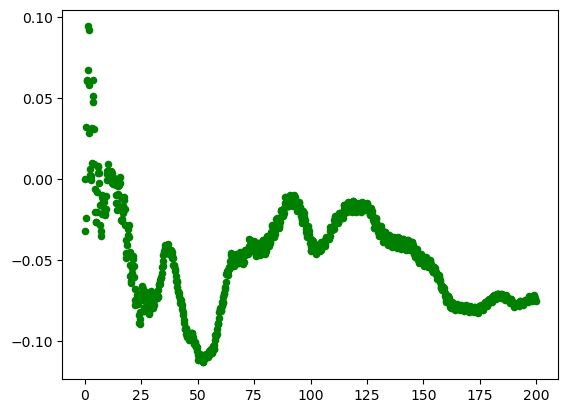

 number of trajectories  30


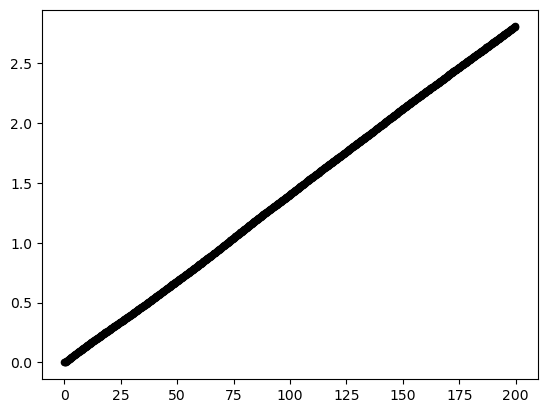

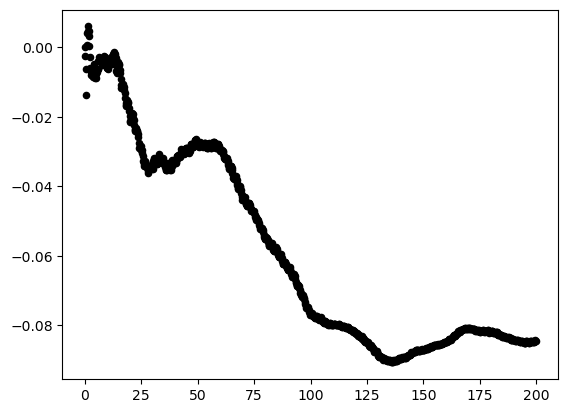

In [240]:
nstart=1
nsend=30
ps=1000
file=readfile(nstart,ps)
print(' opened file ',file)
traj=np.loadtxt(file)
ns=len(traj)

print('number of lines ns = ',ns)
print('    beginning of file ')

print(traj[1])

# parameters for MSD calculations
# length is the number of steps in MSD
# steps is the number of averagings
# skip is the number of steps skipped in averaging

timestep=0.2
length=1000
steps=ns-length
skip=10

print('   length of MSD        ',length)
print('   saving time          ',timestep)
print('   number of averagings ',steps)
print('   skip                 ',skip)

# MSD calculates the array of displacements from the position specified by j

def msd(array,j,length):
    c1=np.zeros((length,3))
    i=0
    while i< length:
            c1[i]=np.array([[i*timestep,np.dot(array[j+i]-array[j],array[j+i]-array[j]),np.dot(array[j+i]-array[j],array[j+i]-array[j])**2]])
            i+=1
    return c1  

# Repeated calculations of the MSD with the step=skip and average over the 
#  steps/skip steps


def average(array,length,steps,skip):
    c2=np.zeros((length,3))
    j=0
    num=0
    while j < steps:
        c2+=msd(array,j,length)
        j+=skip
        num+=1
    print(' number of averagings ',num)
    return c2/num



r2=np.zeros((length,3))
r2=average(traj,length,steps,skip)


plt.scatter(r2[:,0],r2[:,1],s=20,c='r') 
plt.show()

alpha=np.zeros((length,2))
i=1
while i < length:
    alpha[i]=np.array([r2[i,0],3*r2[i,2]/5/r2[i,1]**2-1])
    i+=1

plt.scatter(alpha[:,0],alpha[:,1],s=20,c='r') 
plt.show()


r2av=r2
alphaav=alpha
i=nstart+1
nav=1
while i <= nsend:
    file=readfile(i,ps)
    print(' opened file ',file)
    traj=np.loadtxt(file)
    ns=len(traj)
    print('number of lines ns = ',ns)
    r2=average(traj,length,steps,skip)
    r2av+=r2
    nav+=1
    alpha=np.zeros((length,2))
    j=1
    while j < length:
        alpha[j]=np.array([r2[j,0],3*r2[j,2]/5/r2[j,1]**2-1])
        j+=1
        
    alphaav+=alpha
    plt.scatter(alpha[:,0],alpha[:,1],s=20,c='green') 
    plt.show()
    i+=1
    
print(' number of trajectories ',nav)    
r2av=r2av/nav
alphaav=alphaav/nav

datafile='r2GFPqp15.dat'
cfile=os.path.join(path, datafile)
np.savetxt(cfile,r2av) 

datafile='alphaGFPqp15.dat'
cfile=os.path.join(path, datafile)
np.savetxt(cfile,alphaav) 

outfile='r2GFPqp15.pdf'
plotfile=os.path.join(path, outfile) 
plt.scatter(r2av[:,0],r2av[:,1],s=20,c='black') 
plt.savefig(plotfile,dpi=150,format='pdf') 
plt.show()

outfile='alphaGFPqp15.pdf'
plotfile=os.path.join(path, outfile) 
plt.scatter(alphaav[:,0],alphaav[:,1],s=20,c='black') 
plt.savefig(plotfile,dpi=150,format='pdf') 
plt.show()

D:: 0.0023649562261744443


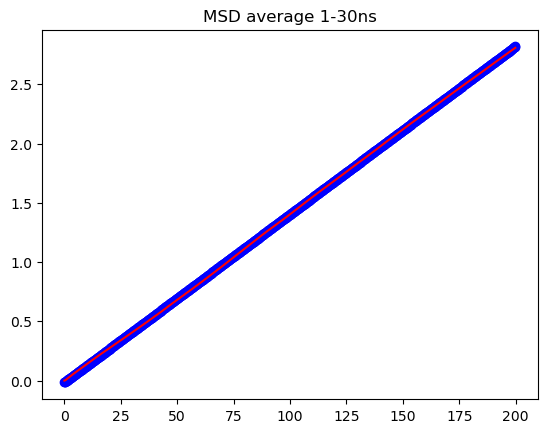

In [241]:
#############################################################
from scipy.stats import linregress
linear_model = linregress(r2av[:,0],r2av[:,1])
slope = linear_model.slope
error = linear_model.stderr
# dim_fac is 3 as we computed a 3D msd with 'xyz'
D = slope * 1/(2*3)
print("D::",D)
plt.title('MSD average 1-30ns')
plt.plot(r2av[:,0],linF(linear_model.intercept,slope,r2av[:,0]),'ob')
plt.plot(r2av[:,0],r2av[:,1],'r')
plt.show()
################################################
#ns= np.arange(1,10000,4)/1000

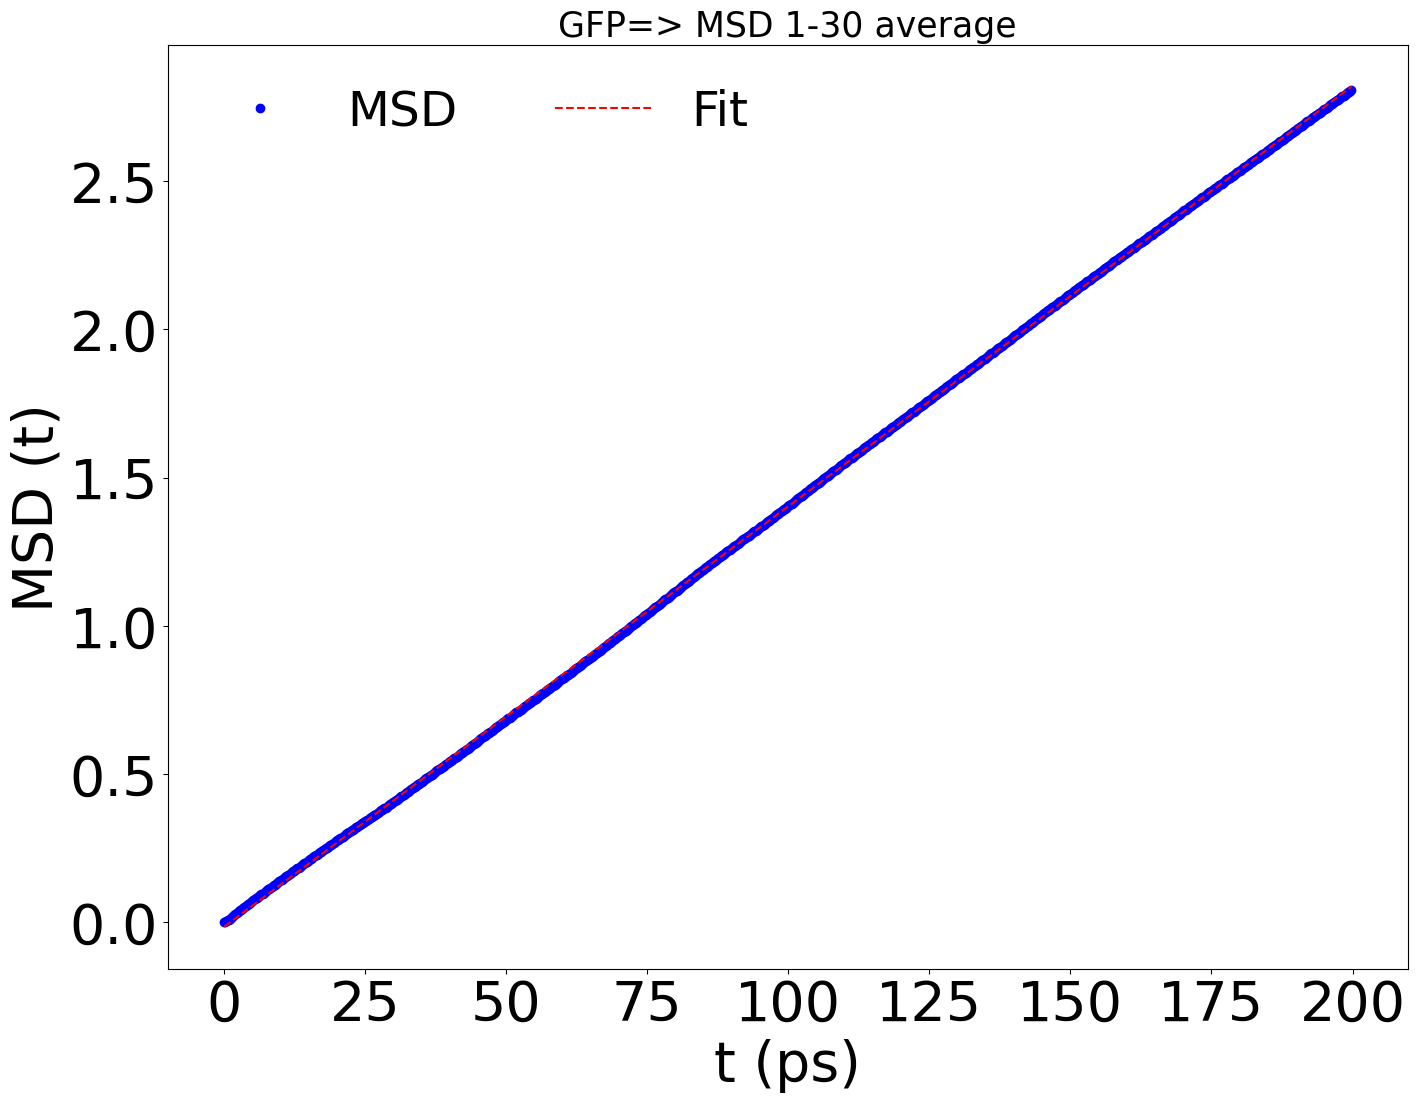

In [242]:
plt.figure(figsize=(16,12))
plt.plot(r2av[:,0],r2av[:,1],'ob',label='MSD')
plt.plot(r2av[:,0],linF(linear_model.intercept,slope,r2av[:,0]),'--r',label='Fit')
#########################################################################
plt.xlabel("t (ps)",fontsize=40)
plt.ylabel(r"MSD (t)",fontsize=40)
plt.title("GFP=> MSD 1-30 average",fontsize=25)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
#plt.title('MSD 1-20 average',fontsize=30)
plt.legend(loc=0,fontsize=35,ncol=2, frameon=False)
plt.savefig("/Users/smostaj1/Documents/GFP/Latex-setare/plot/MSD_GFP1-30qp15.pdf", dpi=1000 )
plt.savefig("/Users/smostaj1/Documents/GFP/Latex-setare/plot/MSD_GFP1-30qp15.eps", dpi=1000 ,format='eps') 

# GFP q=25

In [245]:
path=os.path.dirname('/Users/smostaj1/Documents/GFP/msd-gfp/msd-25/')

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-25/coor_gfp/coor_1ns_1000ps.dat
number of lines ns =  5000
    beginning of file 
[0.642589 6.930193 4.386025]
   length of MSD         1000
   saving time           0.2
   number of averagings  4000
   skip                  10
 number of averagings  400


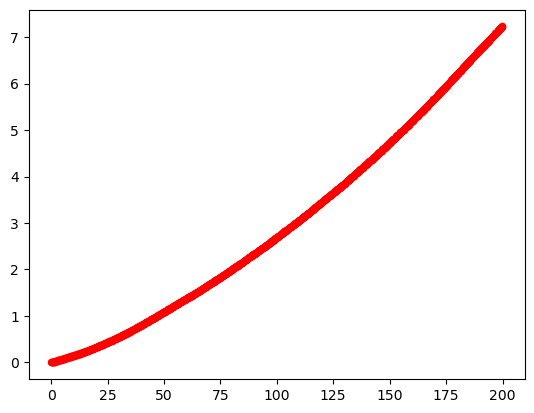

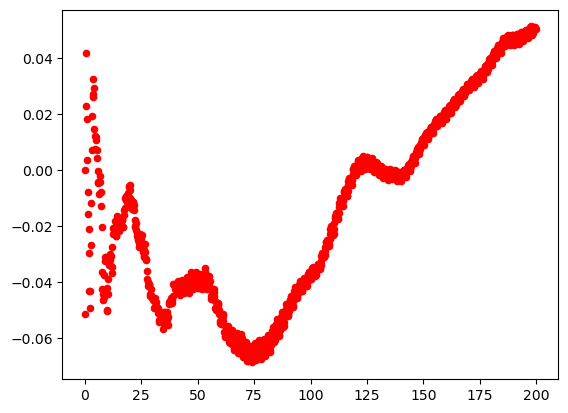

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-25/coor_gfp/coor_2ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


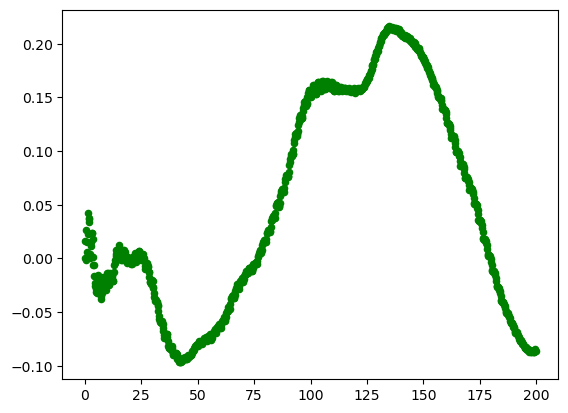

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-25/coor_gfp/coor_3ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


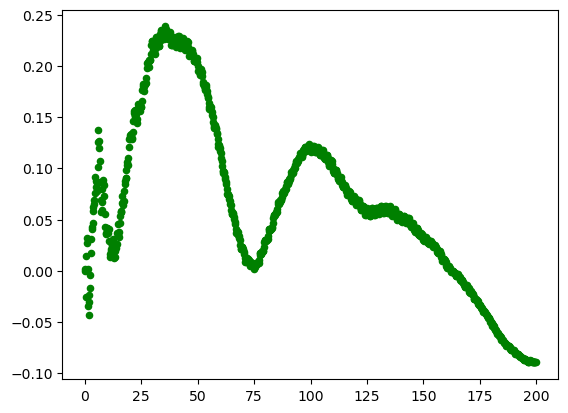

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-25/coor_gfp/coor_4ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


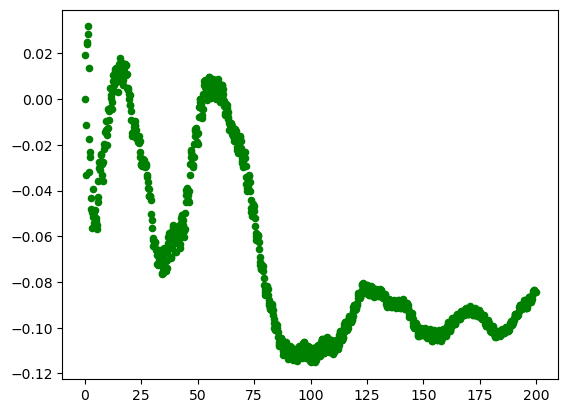

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-25/coor_gfp/coor_5ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


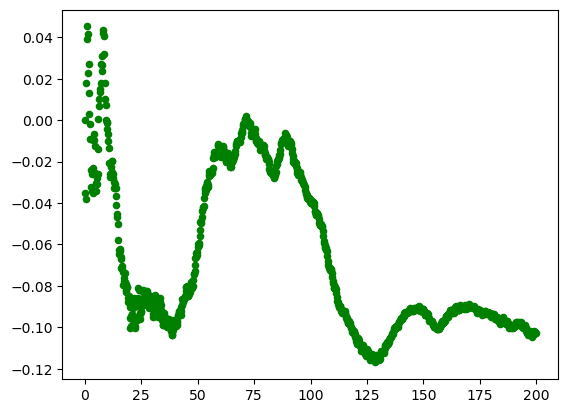

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-25/coor_gfp/coor_6ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


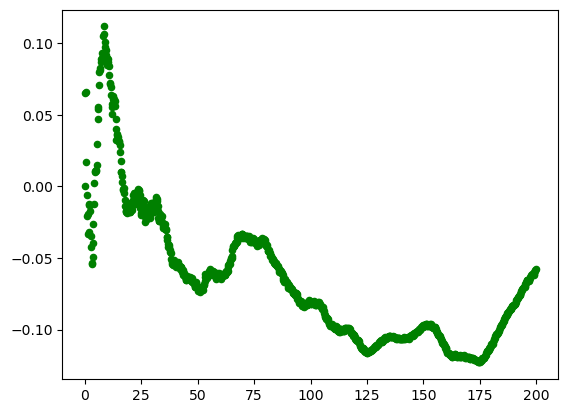

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-25/coor_gfp/coor_7ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


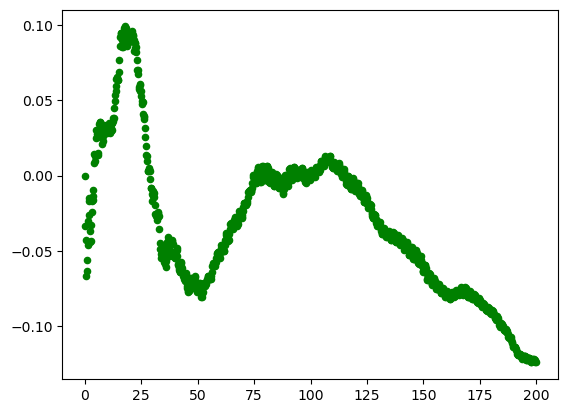

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-25/coor_gfp/coor_8ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


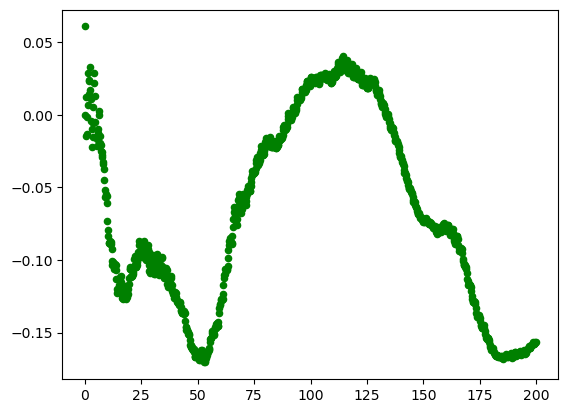

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-25/coor_gfp/coor_9ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


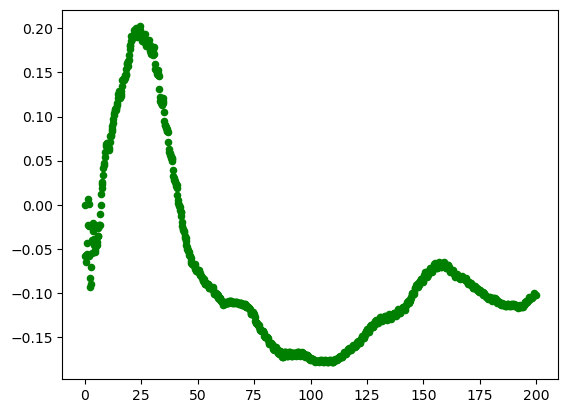

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-25/coor_gfp/coor_10ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


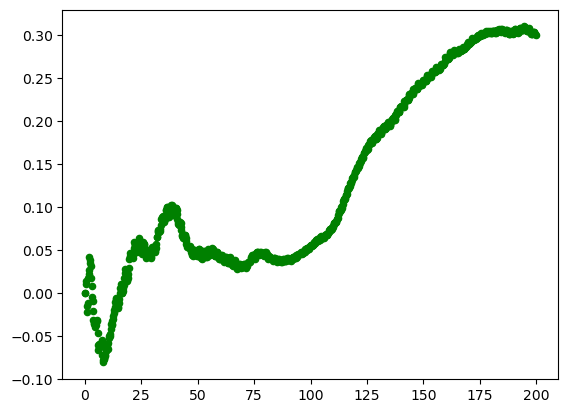

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-25/coor_gfp/coor_11ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


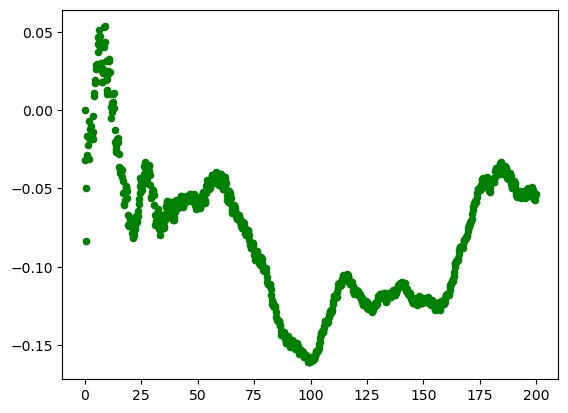

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-25/coor_gfp/coor_12ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


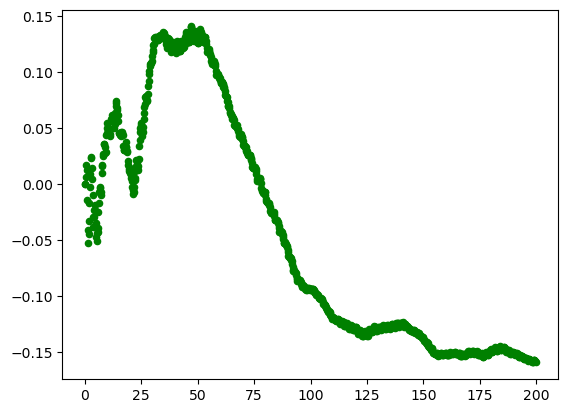

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-25/coor_gfp/coor_13ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


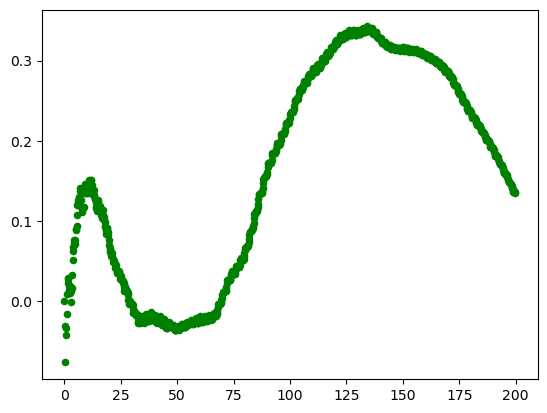

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-25/coor_gfp/coor_14ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


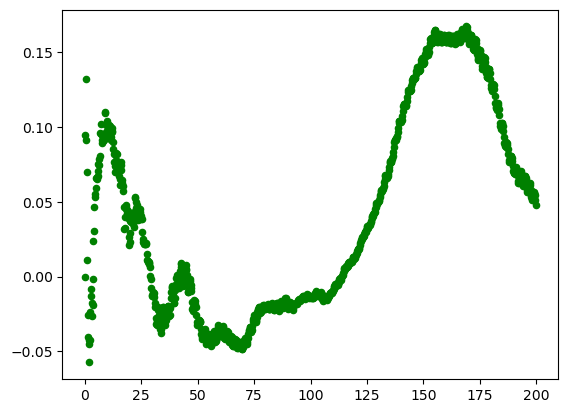

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-25/coor_gfp/coor_15ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


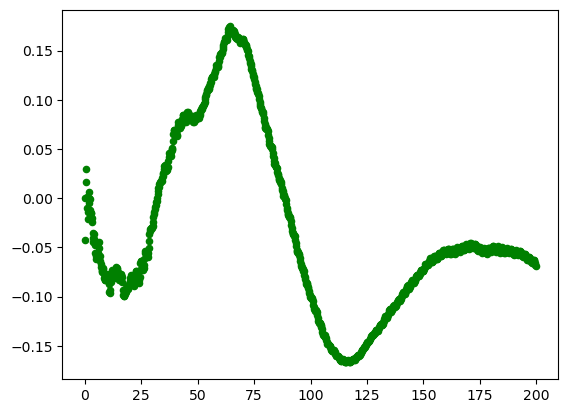

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-25/coor_gfp/coor_16ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


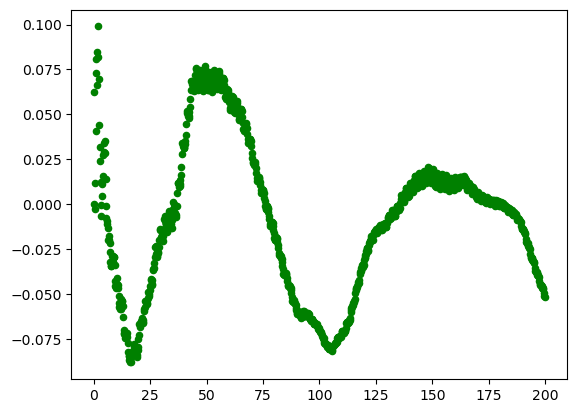

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-25/coor_gfp/coor_17ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


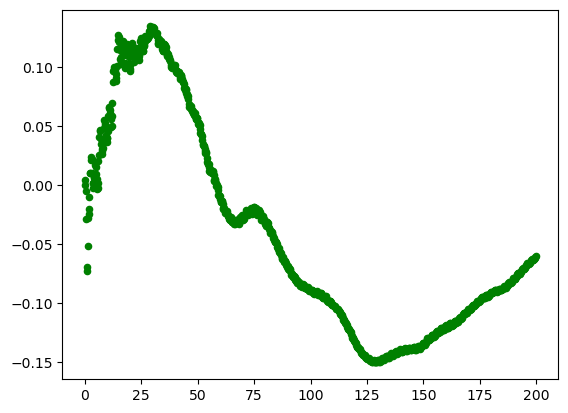

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-25/coor_gfp/coor_18ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


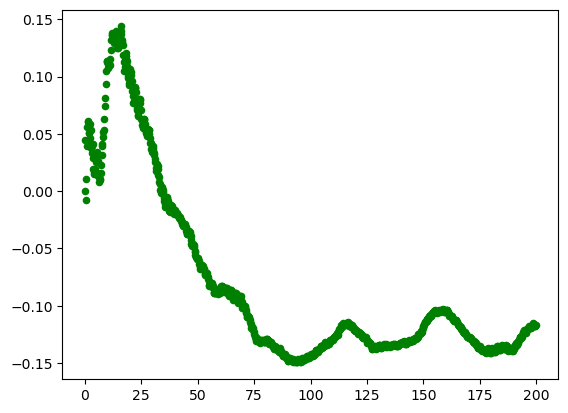

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-25/coor_gfp/coor_19ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


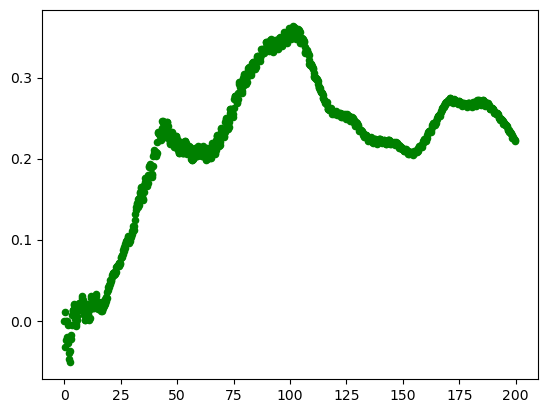

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-25/coor_gfp/coor_20ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


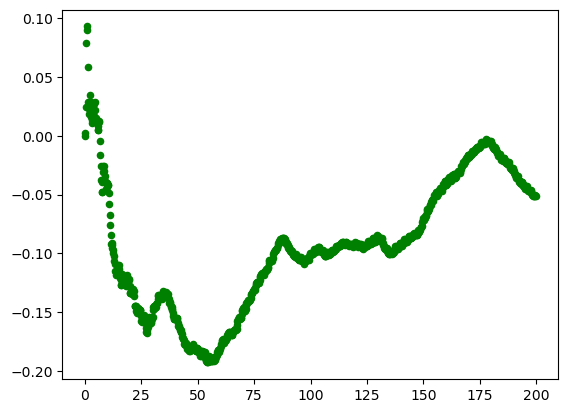

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-25/coor_gfp/coor_21ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


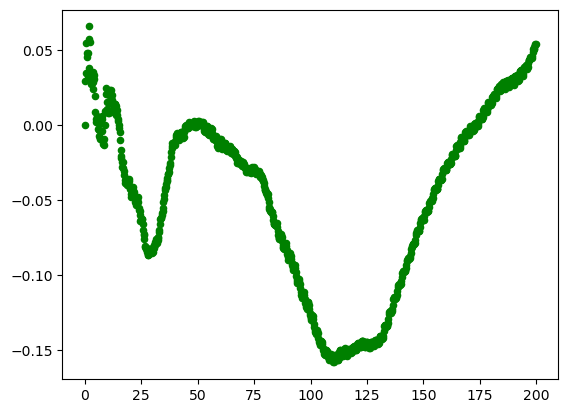

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-25/coor_gfp/coor_22ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


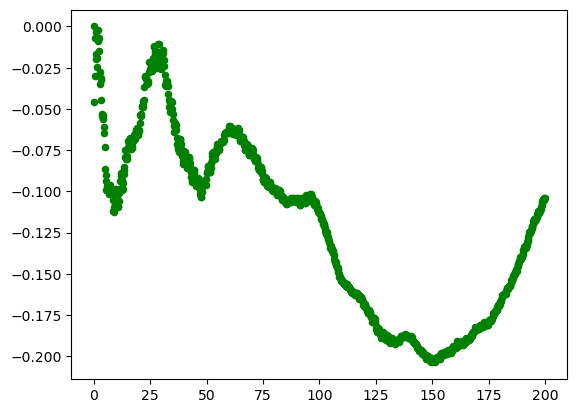

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-25/coor_gfp/coor_23ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


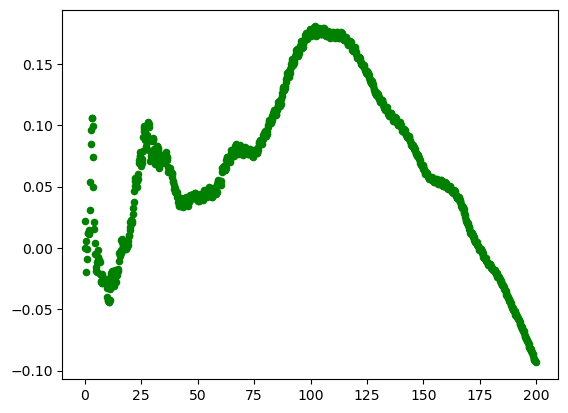

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-25/coor_gfp/coor_24ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


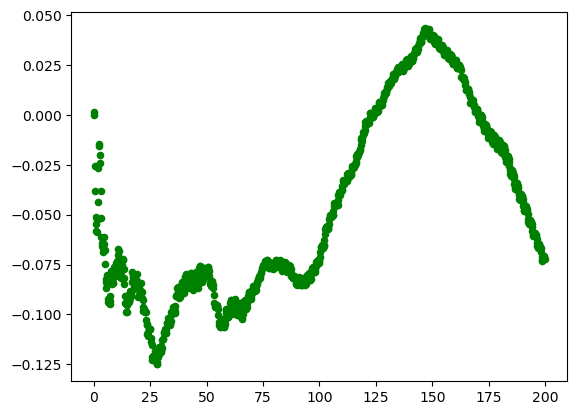

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-25/coor_gfp/coor_25ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


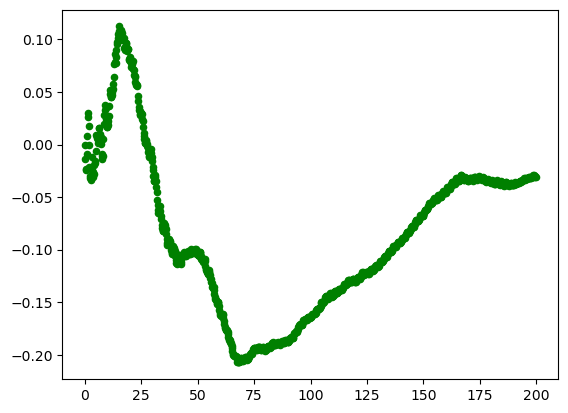

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-25/coor_gfp/coor_26ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


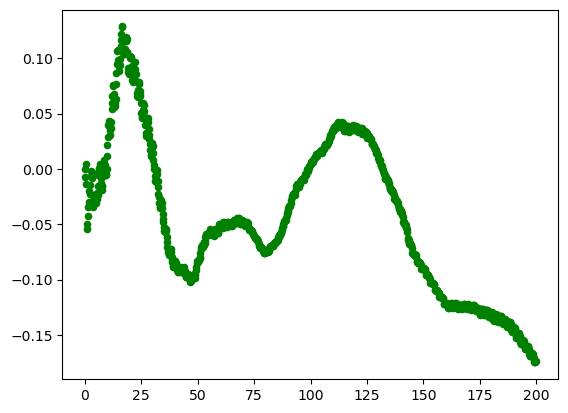

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-25/coor_gfp/coor_27ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


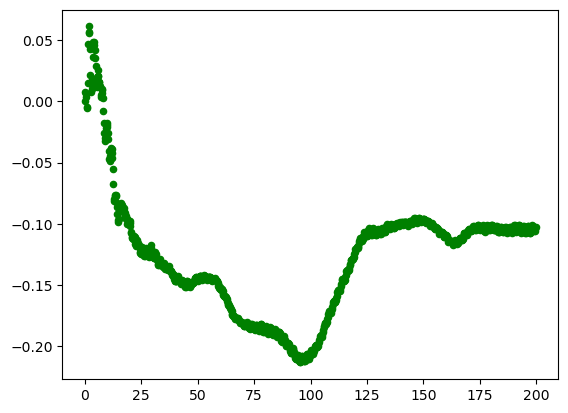

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-25/coor_gfp/coor_28ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


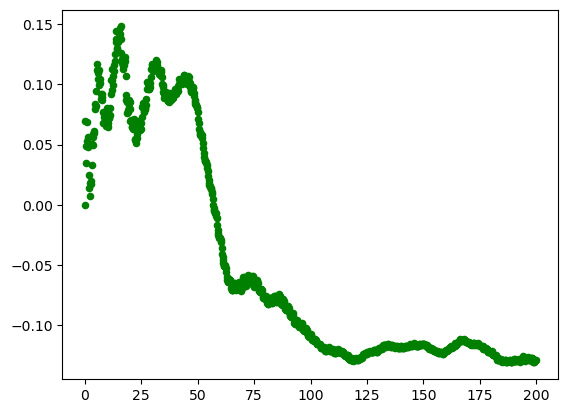

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-25/coor_gfp/coor_29ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


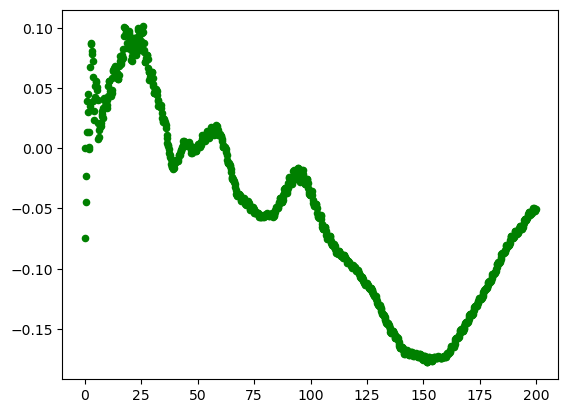

 opened file  /Users/smostaj1/Documents/GFP/msd-gfp/msd-25/coor_gfp/coor_30ns_1000ps.dat
number of lines ns =  5000
 number of averagings  400


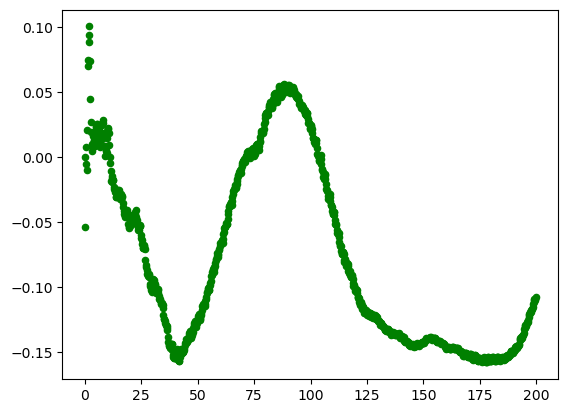

 number of trajectories  30


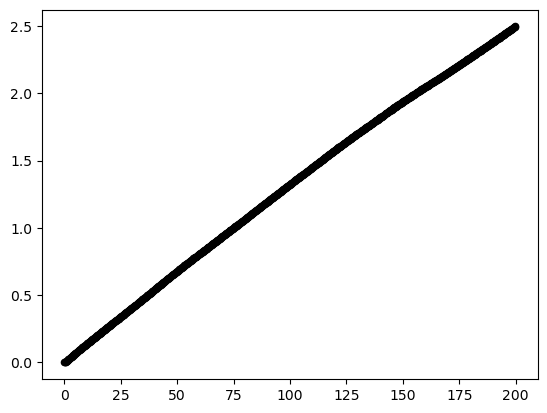

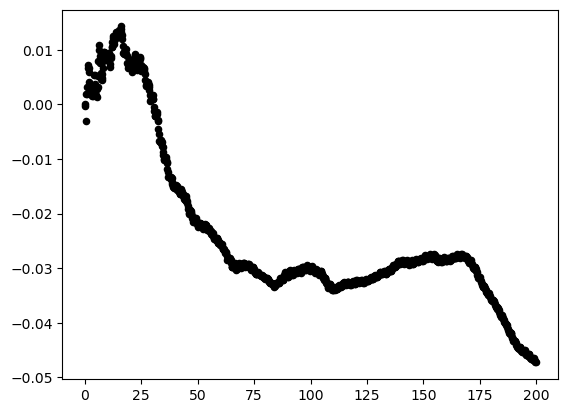

In [246]:
nstart=1
nsend=30
ps=1000
file=readfile(nstart,ps)
print(' opened file ',file)
traj=np.loadtxt(file)
ns=len(traj)

print('number of lines ns = ',ns)
print('    beginning of file ')

print(traj[1])

# parameters for MSD calculations
# length is the number of steps in MSD
# steps is the number of averagings
# skip is the number of steps skipped in averaging

timestep=0.2
length=1000
steps=ns-length
skip=10

print('   length of MSD        ',length)
print('   saving time          ',timestep)
print('   number of averagings ',steps)
print('   skip                 ',skip)

# MSD calculates the array of displacements from the position specified by j

def msd(array,j,length):
    c1=np.zeros((length,3))
    i=0
    while i< length:
            c1[i]=np.array([[i*timestep,np.dot(array[j+i]-array[j],array[j+i]-array[j]),np.dot(array[j+i]-array[j],array[j+i]-array[j])**2]])
            i+=1
    return c1  

# Repeated calculations of the MSD with the step=skip and average over the 
#  steps/skip steps


def average(array,length,steps,skip):
    c2=np.zeros((length,3))
    j=0
    num=0
    while j < steps:
        c2+=msd(array,j,length)
        j+=skip
        num+=1
    print(' number of averagings ',num)
    return c2/num



r2=np.zeros((length,3))
r2=average(traj,length,steps,skip)


plt.scatter(r2[:,0],r2[:,1],s=20,c='r') 
plt.show()

alpha=np.zeros((length,2))
i=1
while i < length:
    alpha[i]=np.array([r2[i,0],3*r2[i,2]/5/r2[i,1]**2-1])
    i+=1

plt.scatter(alpha[:,0],alpha[:,1],s=20,c='r') 
plt.show()


r2av=r2
alphaav=alpha
i=nstart+1
nav=1
while i <= nsend:
    file=readfile(i,ps)
    print(' opened file ',file)
    traj=np.loadtxt(file)
    ns=len(traj)
    print('number of lines ns = ',ns)
    r2=average(traj,length,steps,skip)
    r2av+=r2
    nav+=1
    alpha=np.zeros((length,2))
    j=1
    while j < length:
        alpha[j]=np.array([r2[j,0],3*r2[j,2]/5/r2[j,1]**2-1])
        j+=1
        
    alphaav+=alpha
    plt.scatter(alpha[:,0],alpha[:,1],s=20,c='green') 
    plt.show()
    i+=1
    
print(' number of trajectories ',nav)    
r2av=r2av/nav
alphaav=alphaav/nav

datafile='r2GFPqp25.dat'
cfile=os.path.join(path, datafile)
np.savetxt(cfile,r2av) 

datafile='alphaGFPqp25.dat'
cfile=os.path.join(path, datafile)
np.savetxt(cfile,alphaav) 

outfile='r2GFPqp25.pdf'
plotfile=os.path.join(path, outfile) 
plt.scatter(r2av[:,0],r2av[:,1],s=20,c='black') 
plt.savefig(plotfile,dpi=150,format='pdf') 
plt.show()

outfile='alphaGFPqp25.pdf'
plotfile=os.path.join(path, outfile) 
plt.scatter(alphaav[:,0],alphaav[:,1],s=20,c='black') 
plt.savefig(plotfile,dpi=150,format='pdf') 
plt.show()

D:: 0.0020848579916153452


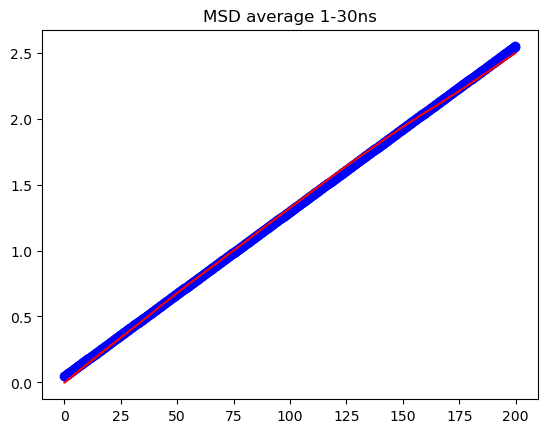

In [247]:
#############################################################
from scipy.stats import linregress
linear_model = linregress(r2av[:,0],r2av[:,1])
slope = linear_model.slope
error = linear_model.stderr
# dim_fac is 3 as we computed a 3D msd with 'xyz'
D = slope * 1/(2*3)
print("D::",D)
plt.title('MSD average 1-30ns')
plt.plot(r2av[:,0],linF(linear_model.intercept,slope,r2av[:,0]),'ob')
plt.plot(r2av[:,0],r2av[:,1],'r')
plt.show()
################################################
#ns= np.arange(1,10000,4)/1000

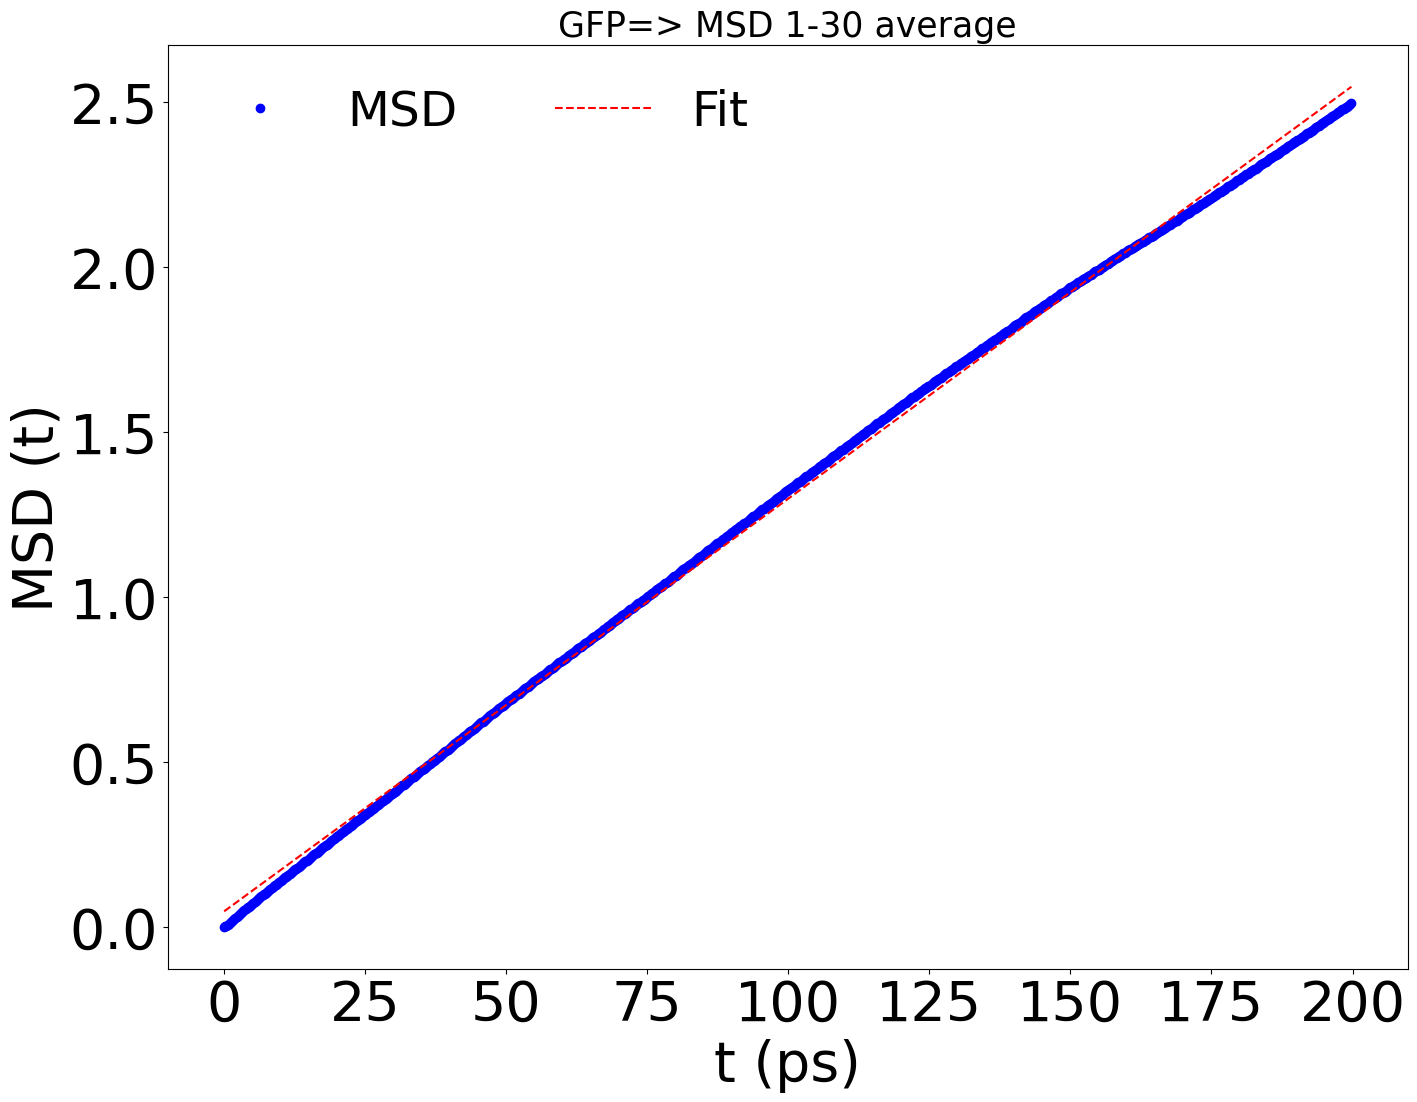

In [248]:
plt.figure(figsize=(16,12))
plt.plot(r2av[:,0],r2av[:,1],'ob',label='MSD')
plt.plot(r2av[:,0],linF(linear_model.intercept,slope,r2av[:,0]),'--r',label='Fit')
#########################################################################
plt.xlabel("t (ps)",fontsize=40)
plt.ylabel(r"MSD (t)",fontsize=40)
plt.title("GFP=> MSD 1-30 average",fontsize=25)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
#plt.title('MSD 1-20 average',fontsize=30)
plt.legend(loc=0,fontsize=35,ncol=2, frameon=False)
plt.savefig("/Users/smostaj1/Documents/GFP/Latex-setare/plot/MSD_GFP1-30qp25.pdf", dpi=1000 )
plt.savefig("/Users/smostaj1/Documents/GFP/Latex-setare/plot/MSD_GFP1-30qp25.eps", dpi=1000 ,format='eps') 

# Corrections

In [15]:
import math
import numpy as np

In [16]:
KBT=(1.38065*10**-23)*300 # J
print(KBT)

4.141949999999999e-21


In [17]:
# KBT in eV     1 eV=1.602×10^-19 J 
KBT*(10**19)/1.6

0.025887187499999992

In [18]:
((2.837297)*(4.14195*10**-21)*(10**18)/(6*(math.pi)*(0.000722)))

0.8635178713905839

In [19]:
eta=0.306

In [20]:
kb=1.38065*10**-23
temp=300
(1.38065*10**-23*300)

4.141949999999999e-21

In [21]:
def corr(eta,l):
    c=2.837297*(1.38065*10**-23*300)*(10**18)/(6*math.pi*eta*l)
    return c
  

In [22]:
corr(0.000722,1)

0.8635178713905839

In [23]:
l=54.17*54.62*51.21* 52.55
eta=0.306
corr(eta,l)

2.5588750139579414e-10

In [24]:
# q=-6
eta=0.306 # Pa.S
l=np.mean([86.30,86.46,86.35])
print(l)
print("correction q=-6=",corr(eta,l))
print("For q=-6 D=",corr(eta,l)+20.83)

86.37
correction q=-6= 2.3589795807216465e-05
For q=-6 D= 20.830023589795804


In [25]:
# q=-29
eta=0.306 # Pa.S
l=np.mean([86.36,86.33,86.38])
print(l)
print("correction q=-29=",corr(eta,l))
print("For q=-29 D=",corr(eta,l)+22.01)

86.35666666666667
correction q=-29= 2.3593438034538382e-05
For q=-29 D= 22.010023593438035


In [26]:
# q=35
eta=0.306 # Pa.S
l=np.mean([86.36,86.49,86.25])
print("correction q=35=",corr(eta,l))
print("For q=35 D=",corr(eta,l)+21.08)

correction q=35= 2.3590706258617747e-05
For q=35 D= 21.080023590706258


In [27]:
eta=0.722/1000
l=1
2.837297*(1.38065*10**-23)*(300)*(10**18)/6*math.pi*eta*l

4.44268448006835e-06

# Correction For GFP

In [59]:
def corr(eta,l):
    c=2.837297*(1.38065*10**-23*300)*(10**18)/(6*math.pi*eta*l)
    return c

In [60]:
import math
# q=-29
eta=0.000306 # Pa.S
l=np.mean([86.36,86.33,86.38])
print("correction 29=",corr(eta,l))
print("D_MD for q=29", 22.01)
print("For Li D_MD+correction ---> D=",corr(eta,l)+22.01)

correction 29= 0.02359343803453838
D_MD for q=29 22.01
For Li D_MD+correction ---> D= 22.03359343803454


In [65]:
import math
# q=-15
eta=0.000306 # Pa.S
l=np.mean([86.27,86.41,86.40])
print("correction 15=",corr(eta,l))
print("D_MD for q=15", 23.65)
print("For Li D_MD+correction ---> D=",corr(eta,l)+23.65)

correction 15= 0.023592527372270564
D_MD for q=15 23.65
For Li D_MD+correction ---> D= 23.673592527372268


In [66]:
import math
# q=-6
eta=0.000306 # Pa.S
l=np.mean([86.30,86.46,86.35])
print("correction 6=",corr(eta,l))
print("D_MD for q=6", 20.83)
print("For Li D_MD+correction ---> D=",corr(eta,l)+20.83)

correction 6= 0.023589795807216467
D_MD for q=6 20.83
For Li D_MD+correction ---> D= 20.853589795807213


In [67]:
import math
# q=10
eta=0.000306 # Pa.S
l=np.mean([86.25,86.43,86.27])
print("correction 10=",corr(eta,l))
print("D_MD for q=10", 20.42)
print("For Li D_MD+correction ---> D=",corr(eta,l)+20.42)

correction 10= 0.023604371467881288
D_MD for q=10 20.42
For Li D_MD+correction ---> D= 20.443604371467885


In [68]:
import math
# q=25
eta=0.000306 # Pa.S
l=np.mean([86.31,86.36,86.32])
print("correction 25=",corr(eta,l))
print("D_MD for q=25", 20.84)
print("For Li D_MD+correction ---> D=",corr(eta,l)+20.84)

correction 25= 0.02360072586434943
D_MD for q=25 20.84
For Li D_MD+correction ---> D= 20.863600725864348


In [69]:
import math
# q=35
eta=0.000306 # Pa.S
l=np.mean([86.36,86.49,86.25])
print("correction 35=",corr(eta,l))
print("D_MD for q=35", 21.08)
print("For Li D_MD+correction ---> D=",corr(eta,l)+21.08)

correction 35= 0.023590706258617748
D_MD for q=35 21.08
For Li D_MD+correction ---> D= 21.103590706258615


# Plot Tau_r v Dipole For Azurin

In [214]:
Tau=np.array([32834,113909,98687,34940,43958,56762])

In [215]:
d_glu104=np.loadtxt("/Users/smostaj1/Dropbox (ASU)/GFP/Results/Azurin_dipole/dipole_glu104.dat")
d_hsp83=np.loadtxt("/Users/smostaj1/Dropbox (ASU)/GFP/Results/Azurin_dipole/dipole_hsp83.dat")                
d_lys24=np.loadtxt("/Users/smostaj1/Dropbox (ASU)/GFP/Results/Azurin_dipole/dipole_lys24.dat") 
d_lys27=np.loadtxt("/Users/smostaj1/Dropbox (ASU)/GFP/Results/Azurin_dipole/dipole_lys27.dat") 
d_ox=np.loadtxt("/Users/smostaj1/Dropbox (ASU)/GFP/Results/Azurin_dipole/dipole_ox.dat") 
d_red=np.loadtxt("/Users/smostaj1/Dropbox (ASU)/GFP/Results/Azurin_dipole/dipole_red.dat")                    

In [216]:
print(d_glu104.shape)
print(d_hsp83.shape)
print(d_lys24.shape)
print(d_lys27.shape)
print(d_ox.shape)
print(d_red.shape)

(495000, 3)
(995000, 3)
(995000, 3)
(995000, 3)
(1500000, 3)
(1500000, 3)


In [217]:
dmag_glu104 = np.mean(np.linalg.norm(d_glu104, axis=1))
dmag_hsp83 = np.mean(np.linalg.norm(d_hsp83, axis=1))
dmag_lys24 = np.mean(np.linalg.norm(d_lys24, axis=1))
dmag_lys27 = np.mean(np.linalg.norm(d_lys27, axis=1))
dmag_ox = np.mean(np.linalg.norm(d_ox, axis=1))
dmag_red = np.mean(np.linalg.norm(d_red, axis=1))

In [218]:
print(dmag_glu104**2)
print(dmag_hsp83**2)
print(dmag_lys24**2)
print(dmag_lys27**2)
print(dmag_ox**2)
print(dmag_red **2)
D2=np.array([dmag_glu104**2,dmag_hsp83**2 ,dmag_ox**2,dmag_red **2,dmag_lys27**2,dmag_lys24**2])
D2

7659.881618043932
8345.256567754188
28682.667763164416
9593.986485825784
6739.091645237633
5470.62792175572


array([ 7659.88161804,  8345.25656775,  6739.09164524,  5470.62792176,
        9593.98648583, 28682.66776316])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


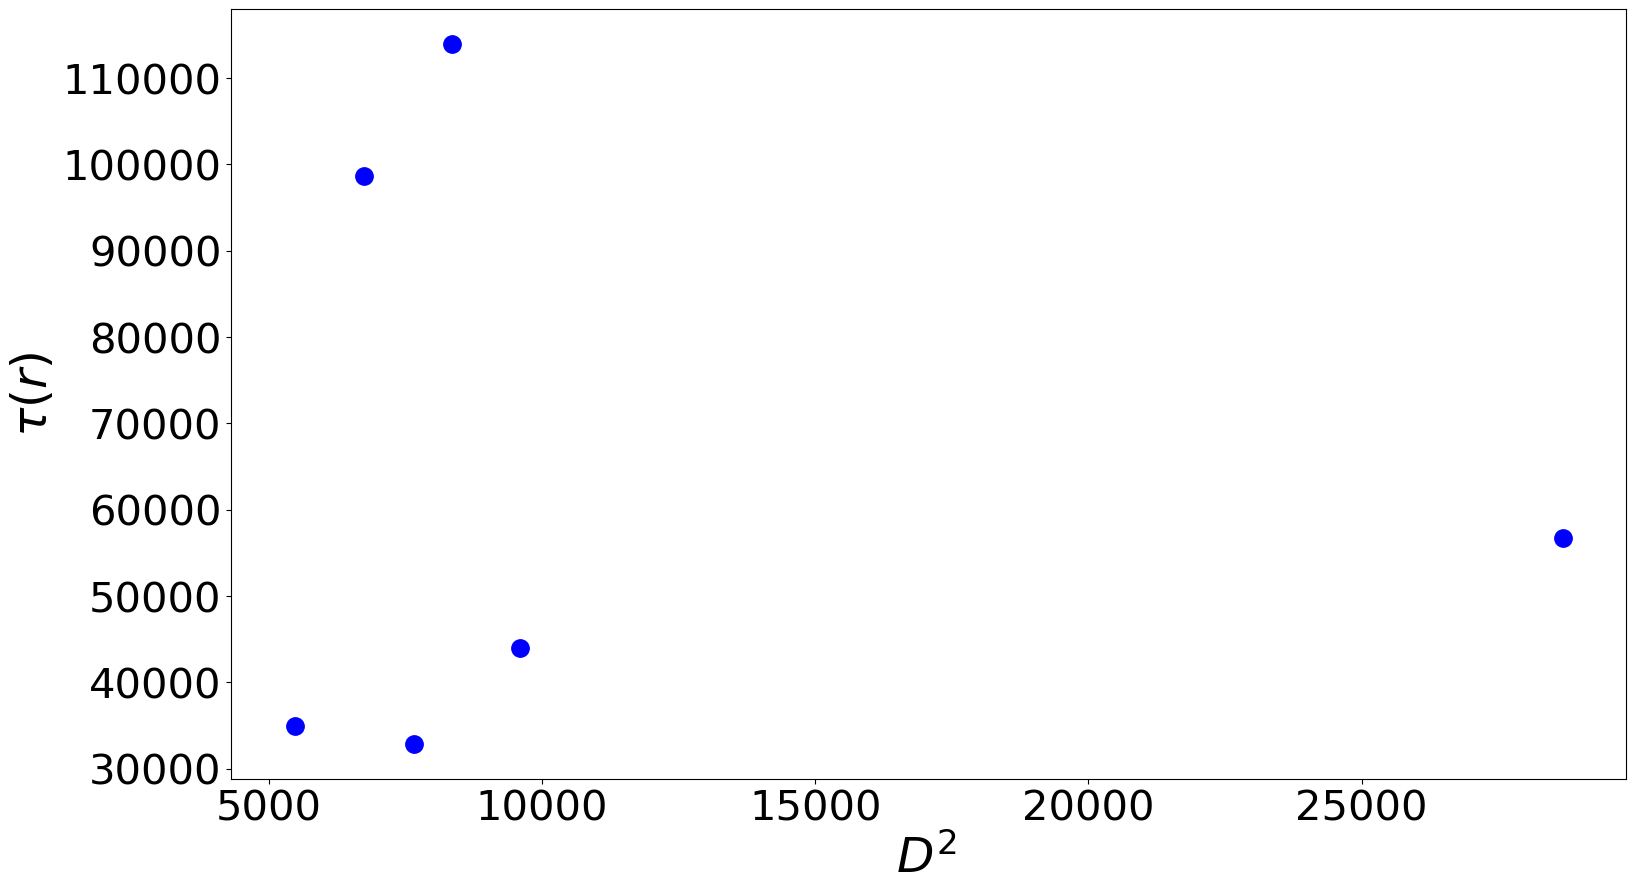

In [219]:
plt.figure(figsize=(18,10))
plt.plot(D2,Tau,'.b', markersize=25)
plt.xlabel("$D^{2}$ ",fontsize=35)
plt.ylabel(r"$\tau(r)$",fontsize=35)
#plt.title("T=300K",fontsize=35)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend(loc=0,fontsize=30,ncol=2,frameon=False)
plt.savefig("/Users/smostaj1/Dropbox (ASU)/GFP/Results/Azurin_dipole/Azurin_Tau-dipole.eps", dpi=1000) 
plt.savefig("/Users/smostaj1/Dropbox (ASU)/GFP/Results/Azurin_dipole/Azurin_Tau-dipole.pdf", dpi=1000) 

# Plot Tau_r v Dipole for GFP

In [220]:
d_g6=np.loadtxt("/Users/smostaj1/Dropbox (ASU)/GFP/Results/dipole/muProtein_gfp_6.dat")
d_g29=np.loadtxt("/Users/smostaj1/Dropbox (ASU)/GFP/Results/dipole/muProtein_gfp_29.dat")                
d_g35=np.loadtxt("/Users/smostaj1/Dropbox (ASU)/GFP/Results/dipole/muProtein_gfp_35.dat") 

In [221]:
dmag_g6 = np.mean(np.linalg.norm(d_g6, axis=1))
dmag_g29 = np.mean(np.linalg.norm(d_g29, axis=1))
dmag_g35 = np.mean(np.linalg.norm(d_g35, axis=1))


In [222]:
D2=np.array([dmag_g6**2,dmag_g29**2 ,dmag_g35**2])
D2

array([ 85854.91802162, 125640.2983499 , 260080.48454228])

In [223]:
Tu_r=np.array([1116.33,1837.26,3794.8])
Tau_z=np.array([1104.12,1870.51,3475.25])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


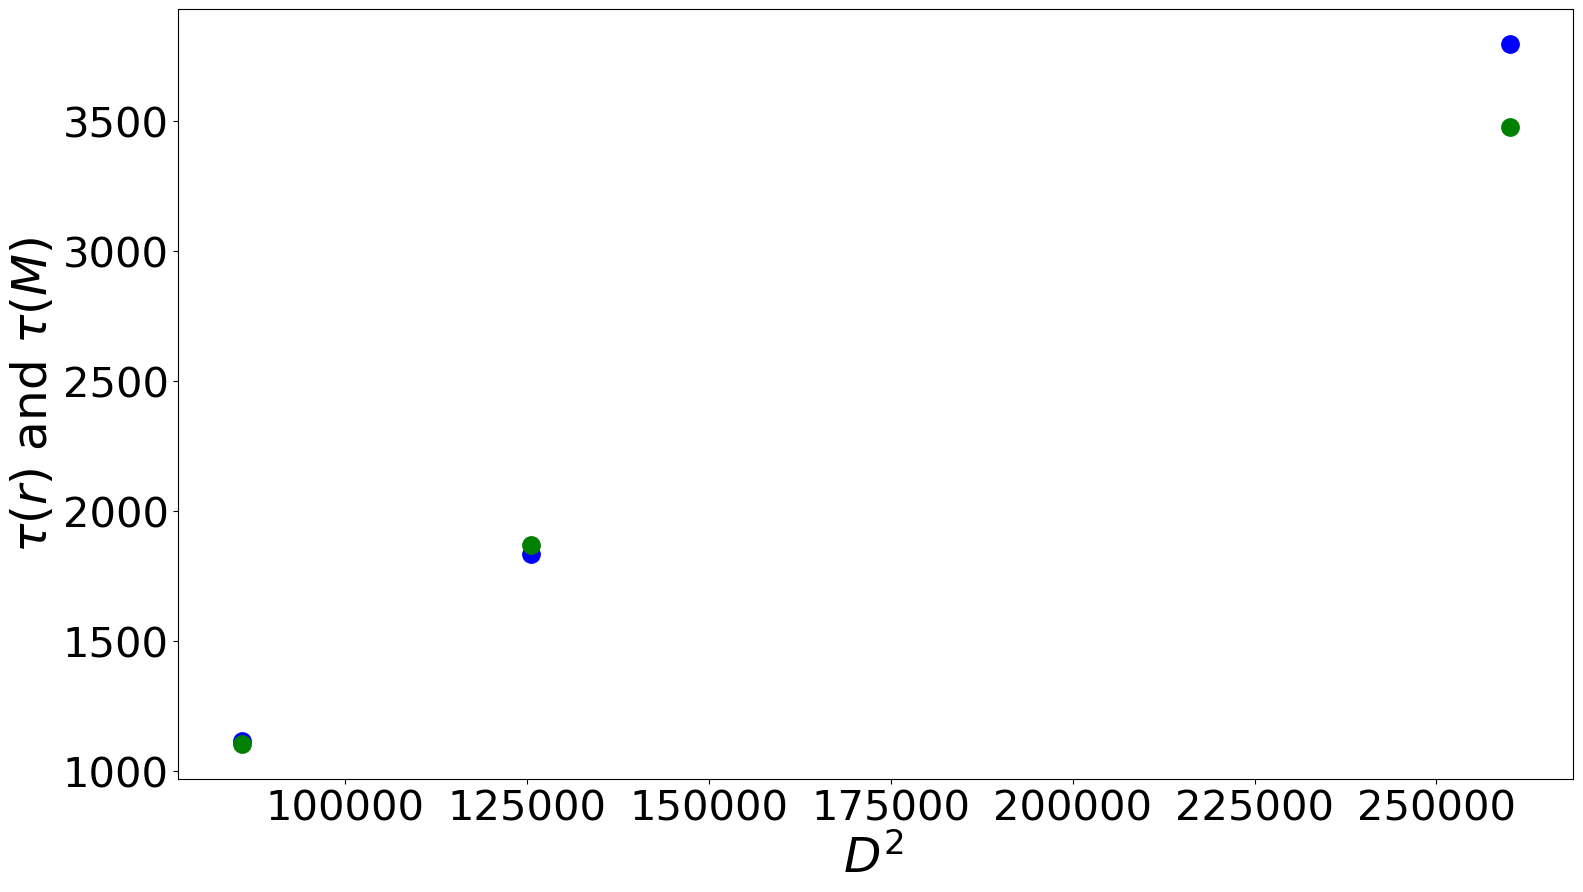

In [224]:
plt.figure(figsize=(18,10))
plt.plot(D2,Tu_r,'.b', markersize=25)
plt.plot(D2,Tau_z,'.g', markersize=25)
plt.xlabel("$D^{2}$ ",fontsize=35)
plt.ylabel(r"$\tau(r)$ and $\tau(M)$",fontsize=35)
#plt.title("T=300K",fontsize=35)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend(loc=0,fontsize=30,ncol=2,frameon=False)
plt.savefig("/Users/smostaj1/Dropbox (ASU)/GFP/Results/Azurin_dipole/GFP_Tau-dipole.eps", dpi=1000) 
plt.savefig("/Users/smostaj1/Dropbox (ASU)/GFP/Results/Azurin_dipole/GFP_Tau-dipole.pdf", dpi=1000) 